In [6]:
# importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [7]:
#lire la base de données d'entrainement
df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
DF=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')


In [8]:
# Modifier le paramètre 'display.max_rows' pour afficher toutes les lignes
#pd.set_option('display.max_rows', df.shape[0] + 1)

pd.set_option('display.max_rows',10)

# Afficher le DataFrame 
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### variables 

| Variable | Description |
| --- | --- |
| Loan_ID | Identifiant unique du prêt |
| Gender | Genre du demandeur (Homme ou Femme) |
| Married | État matrimonial du demandeur (Oui ou Non) |
| Dependents | Nombre de personnes à charge du demandeur |
| Education | Niveau d'éducation du demandeur (Diplômé ou Non diplômé) |
| Self_Employed | Indique si le demandeur est travailleur indépendant (Oui ou Non) |
| ApplicantIncome | Revenu du demandeur |
| CoapplicantIncome | Revenu du co-demandeur |
| LoanAmount | Montant du prêt demandé |
| Loan_Amount_Term | Durée du prêt en mois |
| Credit_History | Historique de crédit du demandeur (1 = bon, 0 = mauvais) |
| Property_Area | Zone géographique du bien immobilier (Urbain, Rural ou Semi-urbain) |
| Loan_Status | Indique si le prêt a été accordé (Oui(1) ou Non(0)) |

### Etape1: EXPLORATION DES DONNÉES


##### Examinons le types des données

In [9]:

data = df

# Afficher les types de données des variables
print(data.dtypes)




Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
                     ...   
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
Length: 13, dtype: object


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
# Identifier les variables numériques, catégorielles et booléennes
num_vars = data.select_dtypes(include=['int64', 'float64']).columns
cat_vars = data.select_dtypes(include=['object']).columns
bool_vars = data.select_dtypes(include=['bool']).columns

print("Variables numériques :", num_vars)
print("Variables catégorielles :", cat_vars)
print("Variables booléennes :", bool_vars)



Variables numériques : Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Variables catégorielles : Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
Variables booléennes : Index([], dtype='object')


In [12]:
# Vérifier s'il y a des variables avec des types de données incorrects
unexpected_types = []
for col in data.columns:
    try:
        data[col].astype(float)
    except ValueError:
        unexpected_types.append(col)

if len(unexpected_types) > 0:
    print("Variables avec des types de données inattendus :", unexpected_types)
else:
    print("Pas de variables avec des types de données inattendus")

Variables avec des types de données inattendus : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


##### Étude des valeurs manquantes


In [13]:
#Valeurs manquantes

data.isnull().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
                    ..
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Length: 13, dtype: int64

In [14]:
my_df=data
my_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:

# Repérer les variables avec des valeurs manquantes
missing_vars = data.columns[df.isnull().any()].tolist()
print("Variables avec des valeurs manquantes :", missing_vars)
print(f"------------------------------------------")

# Quantifier le nombre et la proportion de valeurs manquantes
for col in missing_vars:
    num_missing = df[col].isnull().sum()
    pct_missing = num_missing / len(df) * 100
    print(f"Variable : {col}")
    print(f"Nombre de valeurs manquantes : {num_missing}")
    print(f"Proportion de valeurs manquantes : {pct_missing:.2f}%")
    print(f"------------------------------------------")



Variables avec des valeurs manquantes : ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
------------------------------------------
Variable : Gender
Nombre de valeurs manquantes : 13
Proportion de valeurs manquantes : 2.12%
------------------------------------------
Variable : Married
Nombre de valeurs manquantes : 3
Proportion de valeurs manquantes : 0.49%
------------------------------------------
Variable : Dependents
Nombre de valeurs manquantes : 15
Proportion de valeurs manquantes : 2.44%
------------------------------------------
Variable : Self_Employed
Nombre de valeurs manquantes : 32
Proportion de valeurs manquantes : 5.21%
------------------------------------------
Variable : LoanAmount
Nombre de valeurs manquantes : 22
Proportion de valeurs manquantes : 3.58%
------------------------------------------
Variable : Loan_Amount_Term
Nombre de valeurs manquantes : 14
Proportion de valeurs manquantes : 2.28%
--------------

In [16]:
"""
# Déterminer si les valeurs manquantes sont aléatoires ou liées à des caractéristiques
import numpy as np
from scipy.stats import chi2

# Créer une variable binaire pour indiquer la présence ou l'absence de valeurs manquantes
data['has_missing'] = data[missing_vars].isnull().any(axis=1)

# Croiser la variable binaire avec d'autres variables pour détecter des patterns
for var in data.columns:
    if var != 'has_missing':
        contingency_table = pd.crosstab(data['has_missing'], data[var])
        chi2_stat, p_value, dof, expected = chi2_vect(contingency_table.values)
        
        if p_value < 0.05:
            print(f"La variable '{var}' est significativement liée aux valeurs manquantes (p-value = {p_value:.3f})")
        else:
            print(f"La variable '{var}' n'est pas significativement liée aux valeurs manquantes (p-value = {p_value:.3f})")
"""

"""
# Renseigner les valeurs manquantes
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()
"""


'\n# Renseigner les valeurs manquantes\ncat_data=[]\nnum_data=[]\nfor i,c in enumerate(df.dtypes):\n  if c==object:\n    cat_data.append(df.iloc[:,i])\n  else:\n    num_data.append(df.iloc[:,i])\ncat_data=pd.DataFrame(cat_data).transpose()\nnum_data=pd.DataFrame(num_data).transpose()\n'

#### TRaitement des valeurs manquantes




In [17]:
df_sans_NA = df
# Remplacer les valeurs manquantes dans les variables catégoriques par la valeur la plus fréquente
for col in df_sans_NA.select_dtypes("object").columns:
    df_sans_NA[col] = df_sans_NA[col].fillna(df_sans_NA[col].mode().iloc[0])

# Remplacer les valeurs manquantes dans les variables numériques par la valeur précédente de la même colonne 
for col in df_sans_NA.select_dtypes("float", "int").columns:
    df_sans_NA[col] = df_sans_NA[col].fillna(method='bfill')



df_sans_NA 



/tmp/ipykernel_5336/3301960325.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sans_NA[col] = df_sans_NA[col].fillna(method='bfill')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [18]:
df_sans_NA.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
                   ..
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Length: 13, dtype: int64

## Analyse descriptive sur la base globale

### Analyse univariée


In [19]:
# Générer un résumé statistique de l'ensemble de données
print("Résumé statistique des variables numériques:")
df_sans_NA.describe()


Résumé statistique des variables numériques:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.00000
mean,5403.459283,1621.245798,146.416938,342.410423,0.84202
std,6109.041673,2926.248369,84.917398,64.428629,0.36502
min,150.000000,0.000000,9.000000,12.000000,0.00000
25%,2877.500000,0.000000,100.000000,360.000000,1.00000
50%,3812.500000,1188.500000,128.000000,360.000000,1.00000
75%,5795.000000,2297.250000,166.750000,360.000000,1.00000
max,81000.000000,41667.000000,700.000000,480.000000,1.00000


In [20]:

# Générer un résumé statistique pour les variables catégorielles
print("Résumé statistique des variables catégorielles:")
df_sans_NA.describe(include='O')


Résumé statistique des variables catégorielles:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Analyse des variables numeriques

for col in num_vars:
    print(f"Variable numérique : {col}")
    
    # Mesures de tendance centrale
    mean = df_sans_NA[col].mean()
    median = df_sans_NA[col].median()
    mode = df_sans_NA[col].mode()[0]
    print(f"Moyenne : {mean:.2f}")
    print(f"Médiane : {median:.2f}")
    print(f"Mode : {mode:.2f}")
    
    # Mesures de dispersion
    std_dev = df_sans_NA[col].std()
    variance = df_sans_NA[col].var()
    min_val = df_sans_NA[col].min()
    max_val = df_sans_NA[col].max()
    print(f"Ecart-type : {std_dev:.2f}")
    print(f"Variance : {variance:.2f}")
    print(f"Étendue : {max_val - min_val:.2f}")
    
    # Détection des valeurs aberrantes
    q1 = df_sans_NA[col].quantile(0.25)
    q3 = df_sans_NA[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_sans_NA[(df_sans_NA[col] < lower_bound) | (df_sans_NA[col] > upper_bound)][col]
    print(f"Valeurs aberrantes : {list(outliers)}")
    print()



Variable numérique : ApplicantIncome
Moyenne : 5403.46
Médiane : 3812.50
Mode : 2500.00
Ecart-type : 6109.04
Variance : 37320390.17
Étendue : 80850.00
Valeurs aberrantes : [12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000]

Variable numérique : CoapplicantIncome
Moyenne : 1621.25
Médiane : 1188.50
Mode : 0.00
Ecart-type : 2926.25
Variance : 8562929.52
Étendue : 41667.00
Valeurs aberrantes : [10968.0, 8106.0, 7210.0, 8980.0, 7750.0, 11300.0, 7250.0, 7101.0, 6250.0, 7873.0, 20000.0, 20000.0, 8333.0, 6667.0, 6666.0, 7166.0, 33837.0, 41667.0]

Variable numérique : LoanAmount
Moyenne : 146.42
Médiane : 128.00
Mode : 120.00
Ecart-type : 84.92
Variance : 7210.96
Étendue : 691.00
Valeurs aberrantes 

In [22]:
# Analyse des variables catégorielles
cat_vars = df_sans_NA.select_dtypes(include=['object']).columns

for col in cat_vars:
    print(f"Variable catégorielle : {col}")
    
    # Fréquences et proportions des modalités
    freq = df_sans_NA[col].value_counts()
    prop = df_sans_NA[col].value_counts(normalize=True)
    print("Fréquences :")
    print(freq)
    print("Proportions :")
    print(prop)
    
    # Modalités les plus fréquentes et les plus rares
    most_common = freq.index[0]
    least_common = freq.index[-1]
    print(f"Modalité la plus fréquente : {most_common}")
    print(f"Modalité la plus rare : {least_common}")
    print()

Variable catégorielle : Loan_ID
Fréquences :
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64
Proportions :
Loan_ID
LP001002    0.001629
LP002328    0.001629
LP002305    0.001629
LP002308    0.001629
LP002314    0.001629
              ...   
LP001692    0.001629
LP001693    0.001629
LP001698    0.001629
LP001699    0.001629
LP002990    0.001629
Name: proportion, Length: 614, dtype: float64
Modalité la plus fréquente : LP001002
Modalité la plus rare : LP002990

Variable catégorielle : Gender
Fréquences :
Gender
Male      502
Female    112
Name: count, dtype: int64
Proportions :
Gender
Male      0.81759
Female    0.18241
Name: proportion, dtype: float64
Modalité la plus fréquente : Male
Modalité la plus rare : Female

Variable catégorielle : Married
Fréquences :
Married
Yes    401
No     213
Name: count, dtype: int64
Proportions :
Married

##### Analyser les distributions:

In [23]:
##### Etude des variables categorielle

# Supprimer la colonne 'Loan_ID' du DataFrame cat_vars
cat_vars_sans_ID = cat_vars.drop('Loan_ID')





In [24]:
cat_vars_sans_ID

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

Le but ici est de séparer les variables du dataframe df_sans_NA en deux listes distinctes : une pour les variables catégorielles (cat_data) et une pour les variables numériques (num_data).


##### Etude des variables categorielle

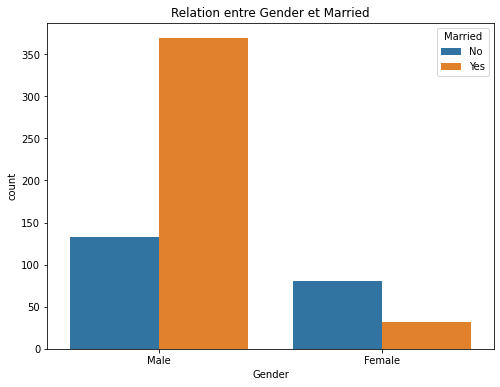

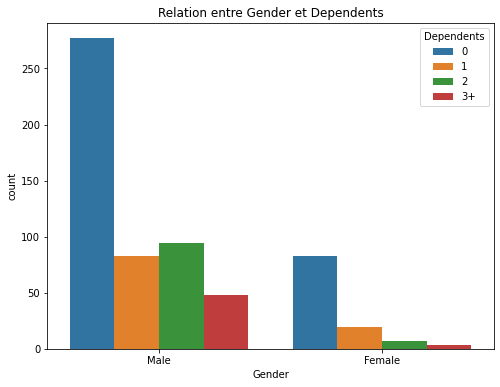

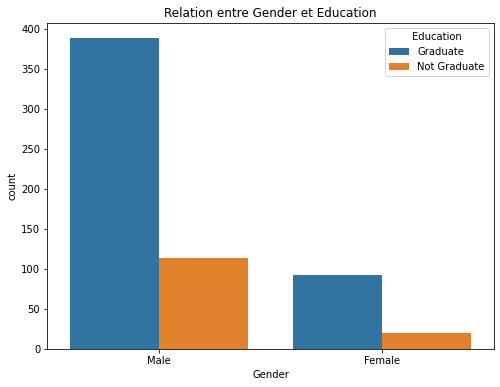

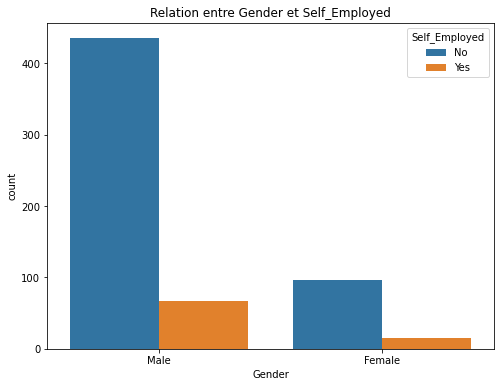

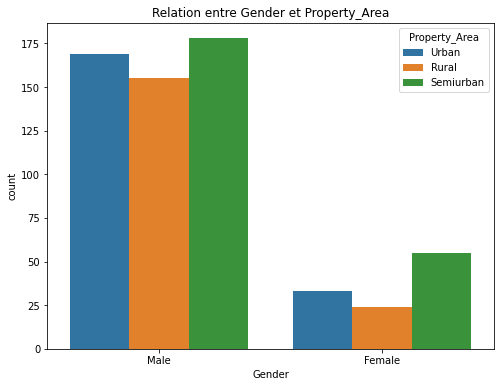

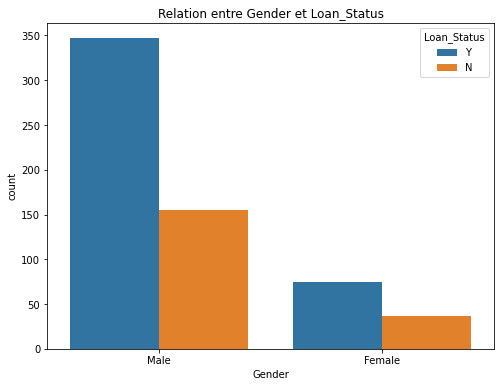

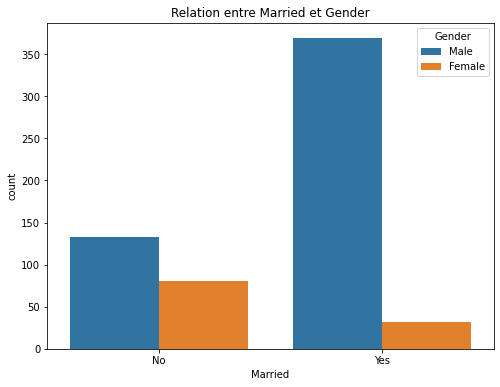

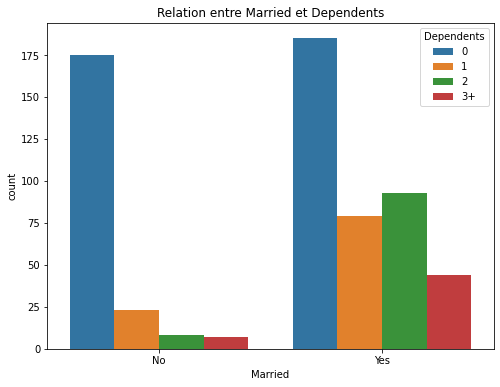

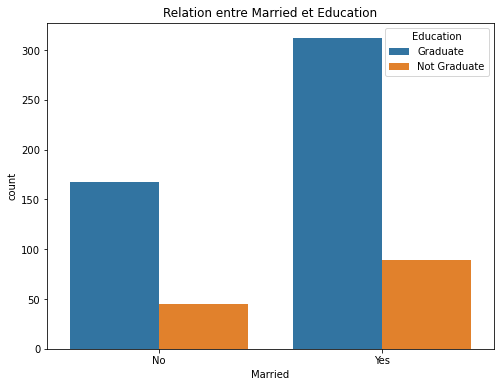

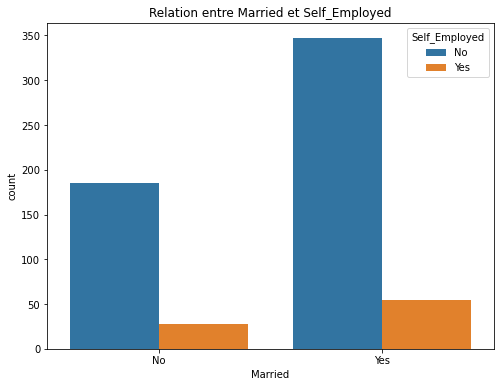

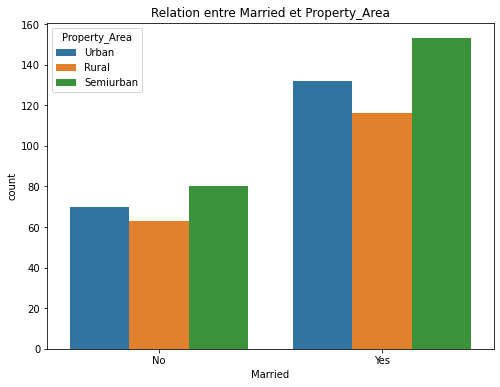

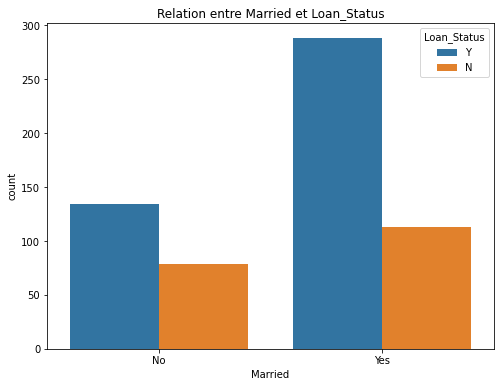

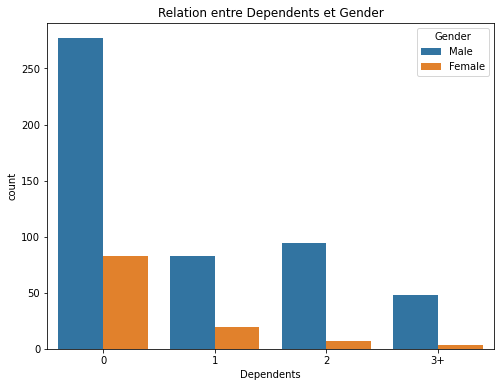

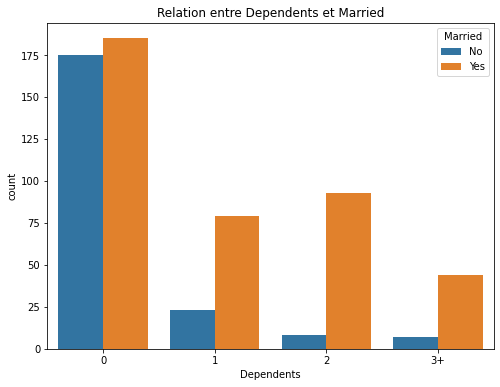

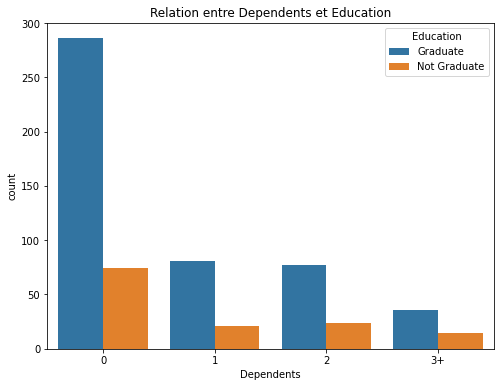

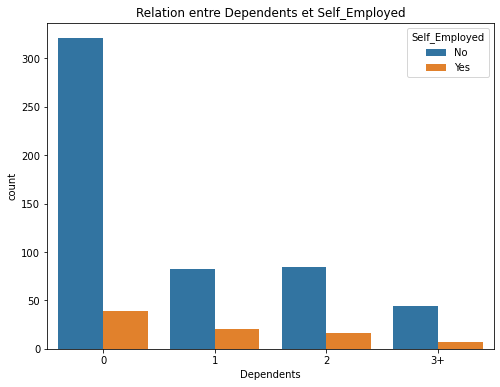

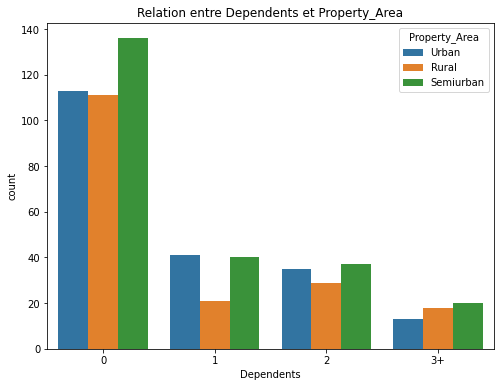

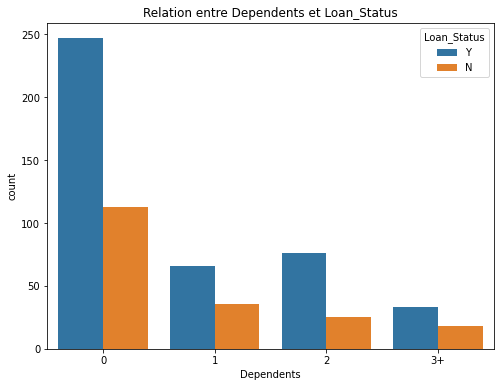

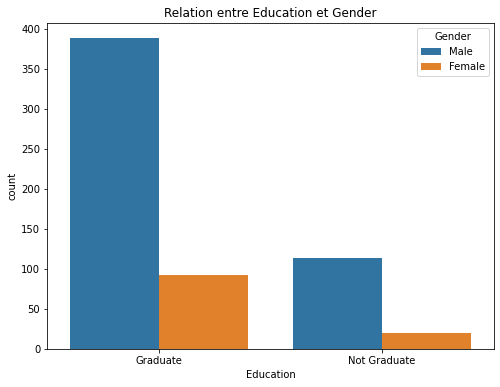

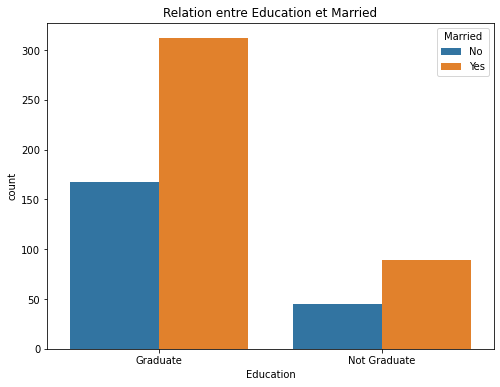

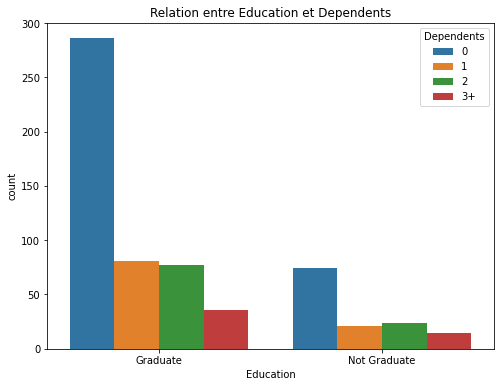

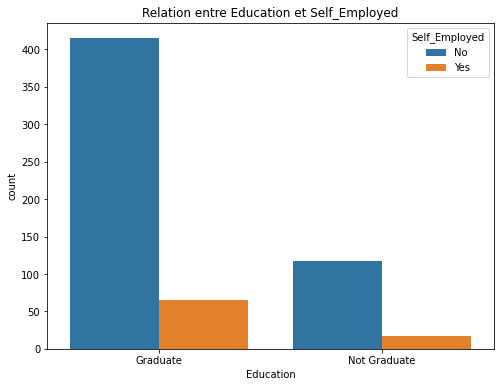

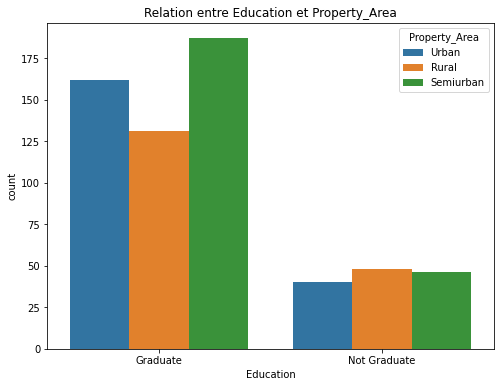

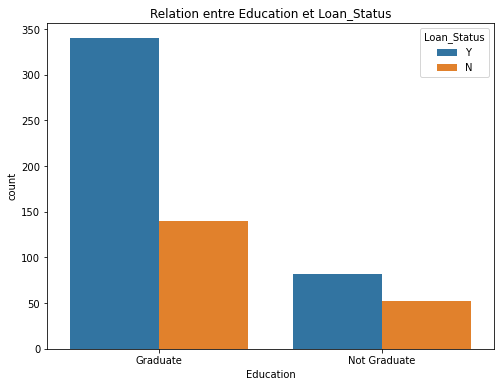

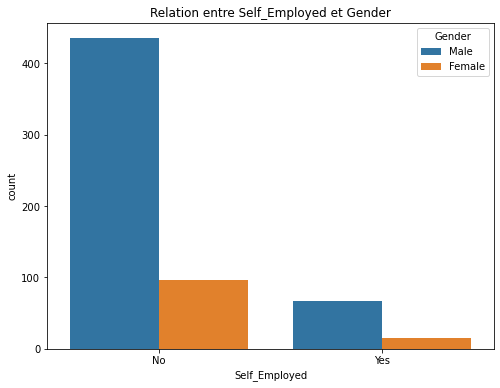

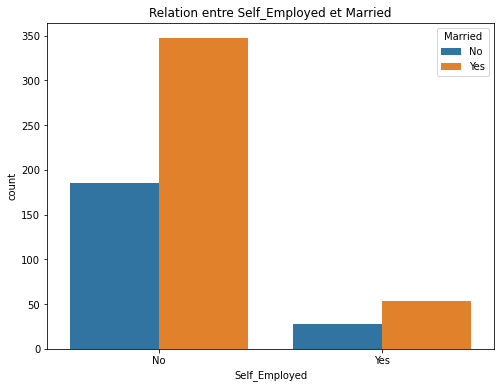

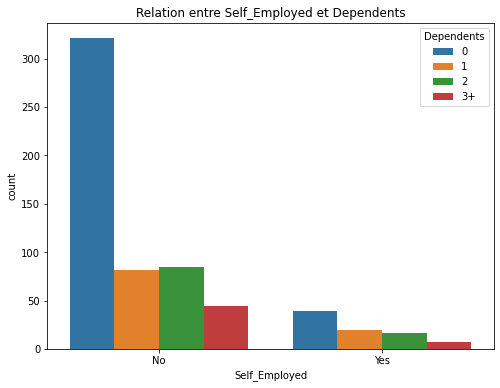

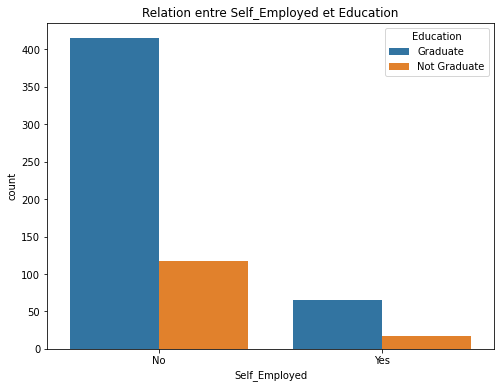

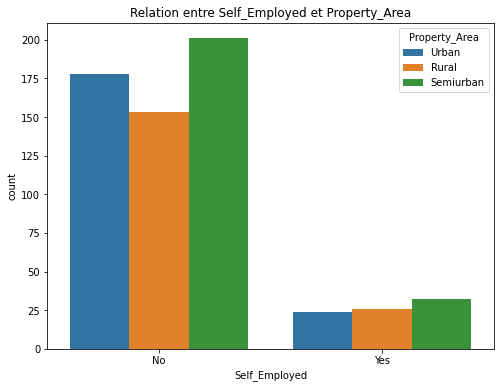

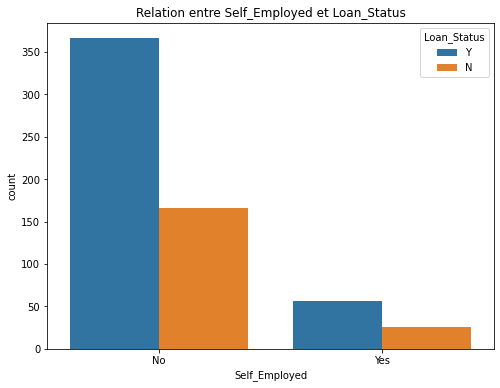

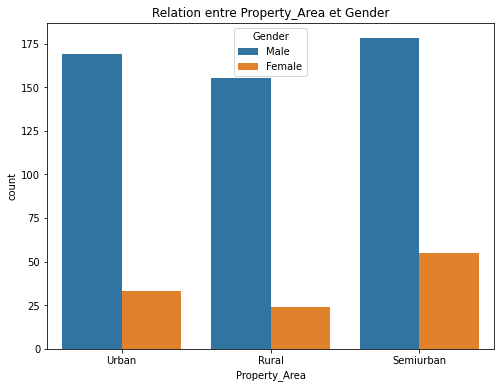

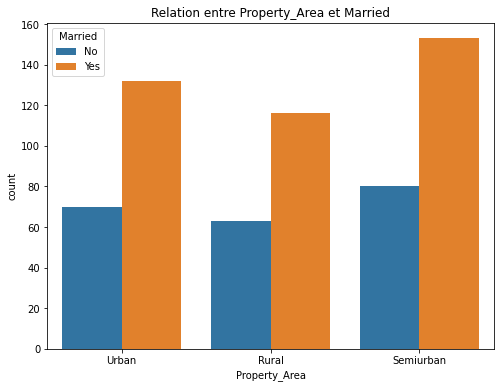

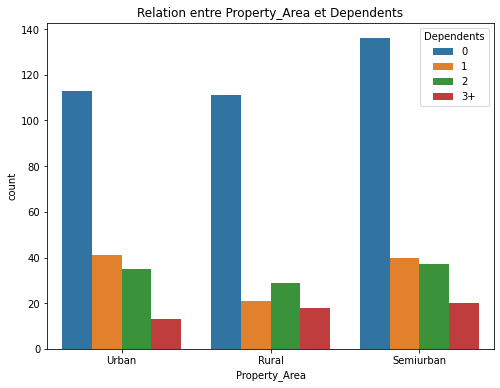

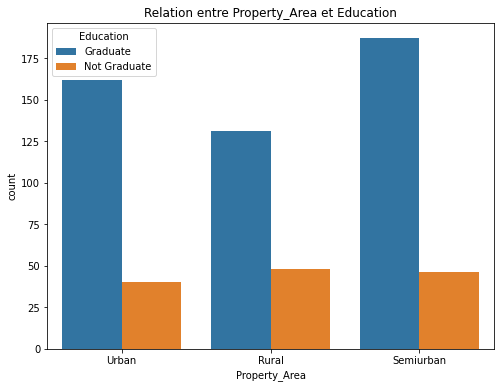

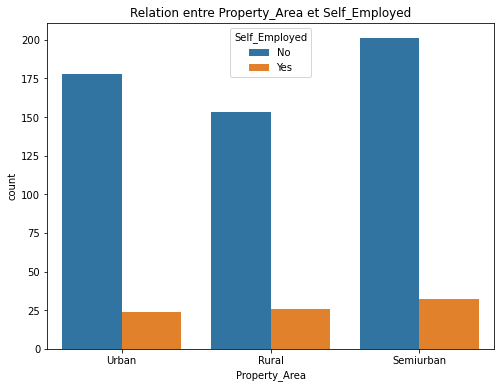

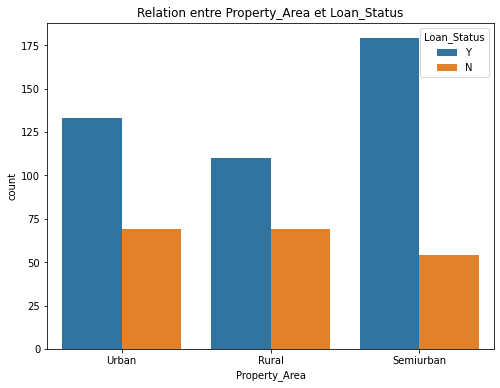

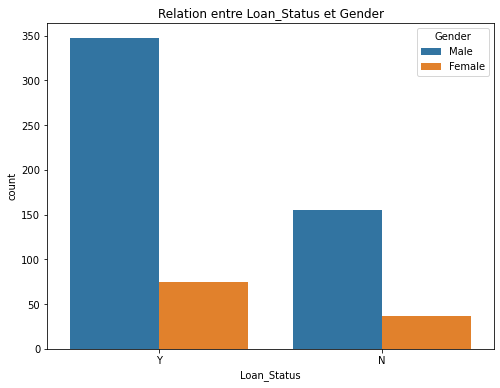

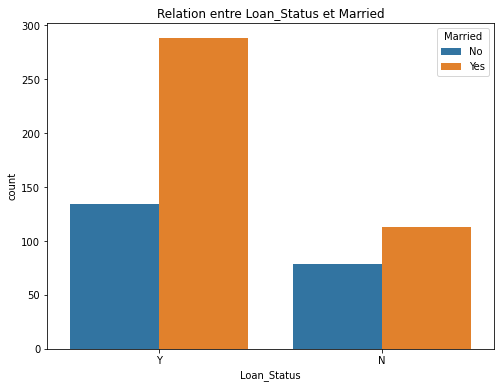

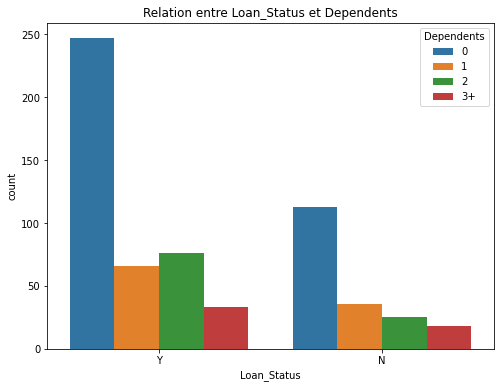

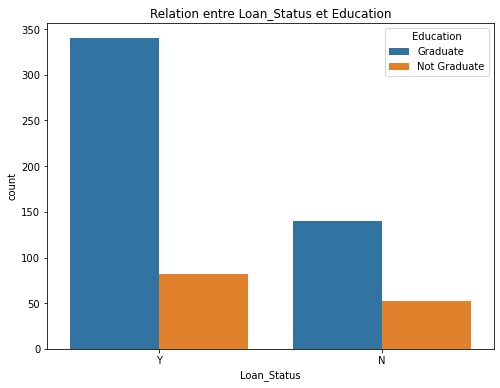

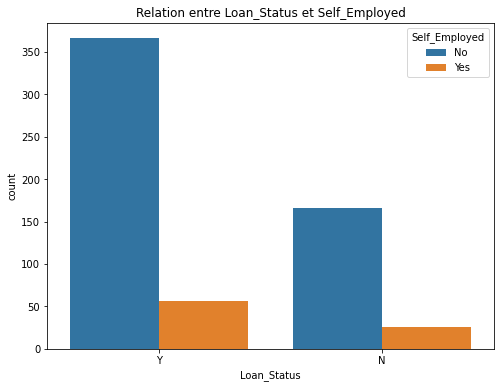

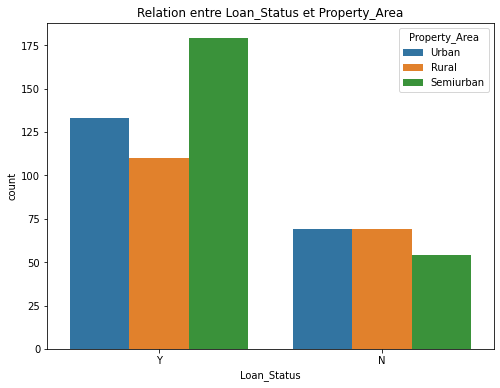

In [25]:

# Étudier les associations entre variables catégorielles


for var1 in cat_vars_sans_ID:
    for var2 in cat_vars_sans_ID:
        if var1 != var2:
            plt.figure(figsize=(8, 6))
            sns.countplot(x=var1, hue=var2, data=df_sans_NA)
            plt.title(f"Relation entre {var1} et {var2}")
            plt.show()




##### Remarque:

L'objectif de ce code est de visualiser les relations entre toutes les paires de variables catégorielles dans le DataFrame, à l'exception des comparaisons d'une variable avec elle-même.


Fréquences relatives : Les hauteurs des barres représentent le nombre d'observations pour chaque combinaison de modalités entre les deux variables catégorielles. Cela vous permet d'identifier les combinaisons les plus et les moins fréquentes.

Associations entre variables : Examinez attentivement les motifs qui se dégagent dans le graphique. Certaines modalités d'une variable peuvent être systématiquement associées à des modalités spécifiques de l'autre variable, ce qui indique une possible dépendance entre elles.

Déséquilibres : Repérez les différences importantes dans les hauteurs des barres. Si certaines combinaisons sont beaucoup plus fréquentes que d'autres, cela peut être un signe intéressant à explorer davantage.

Différences de proportions : Comparez les proportions de chaque modalité de var2 au sein de chaque modalité de var1. Cela peut révéler des différences de répartition qui peuvent être significatives et informatives.

Liens avec la variable cible : Si vous disposez d'une variable cible (par exemple, le statut d'un prêt), essayez de comprendre comment les variables catégorielles sont liées à cette variable. Cela peut vous aider à identifier des facteurs potentiellement prédictifs.

Significativité statistique : Bien que ce code ne calcule pas de tests statistiques, vous pouvez compléter votre analyse en vérifiant la significativité des associations observées à l'aide de tests du chi-carré ou d'autres méthodes appropriées.

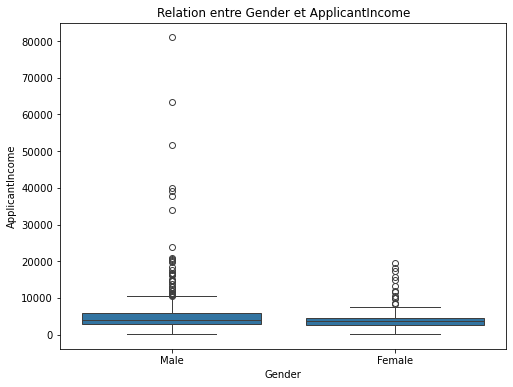

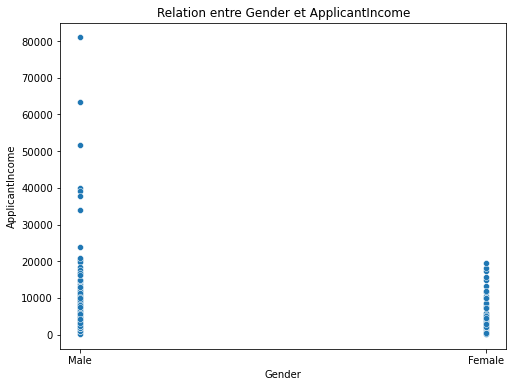

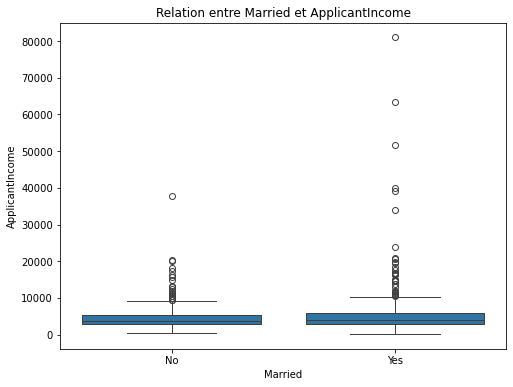

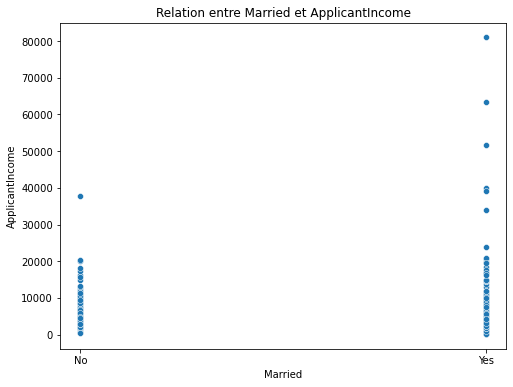

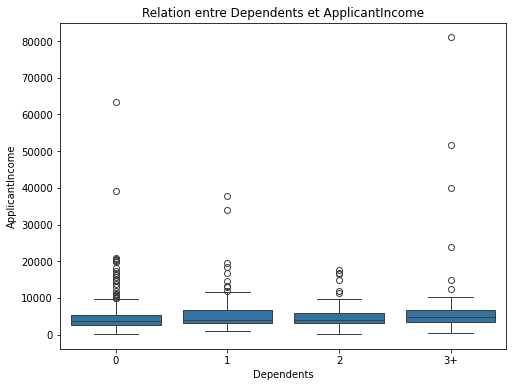

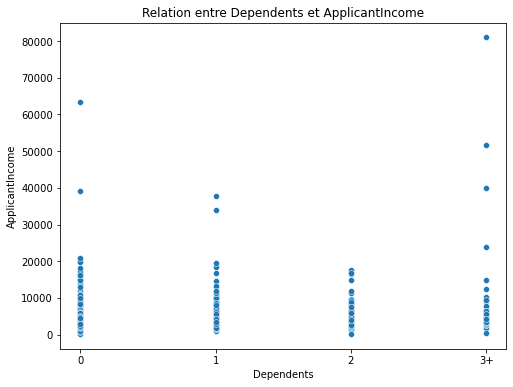

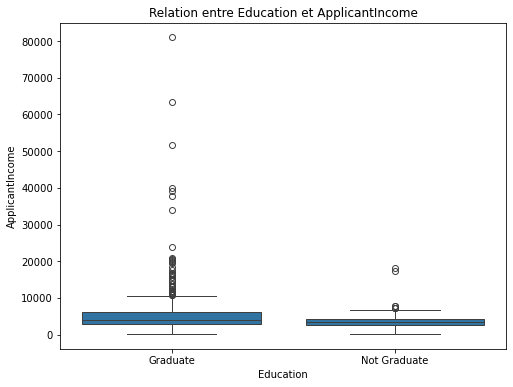

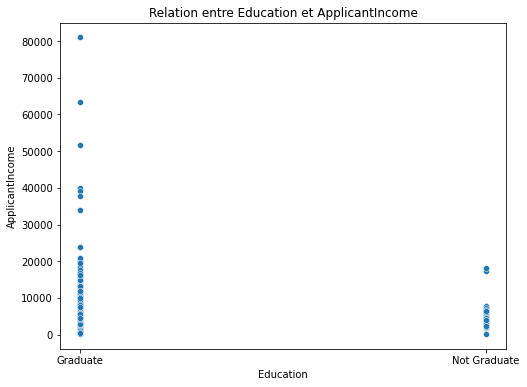

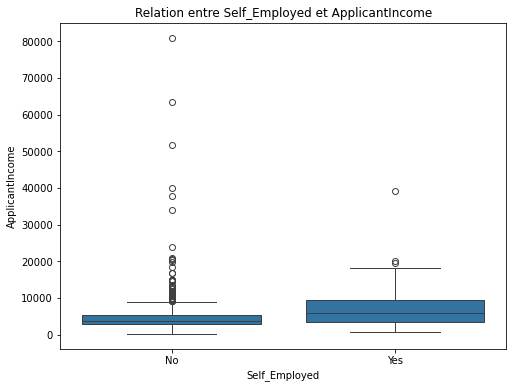

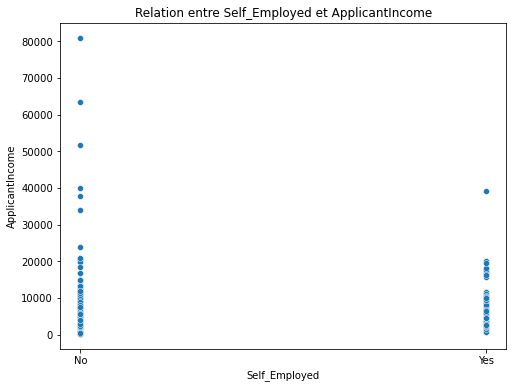

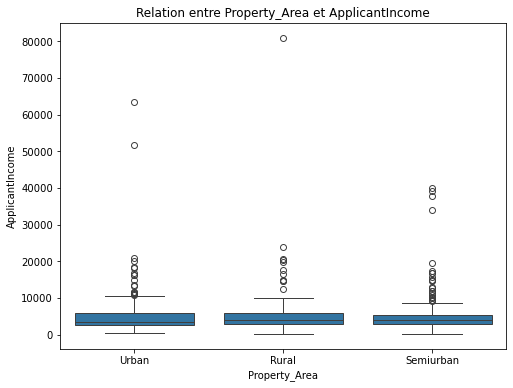

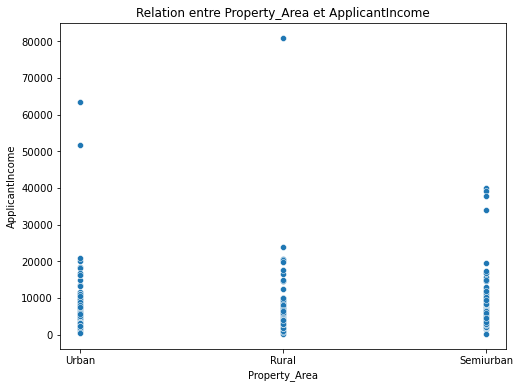

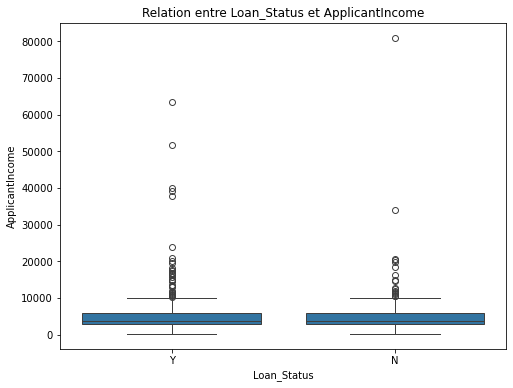

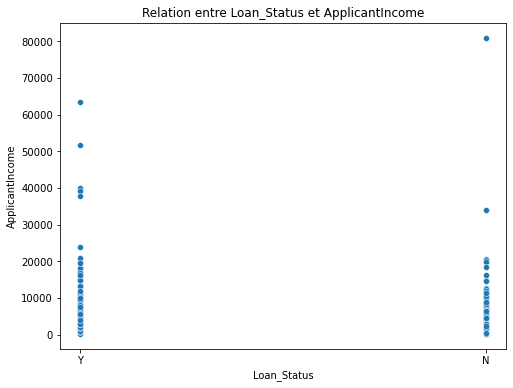

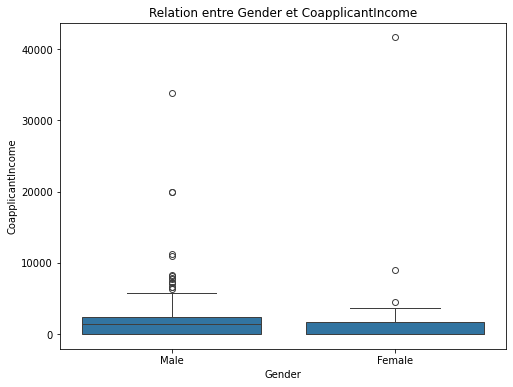

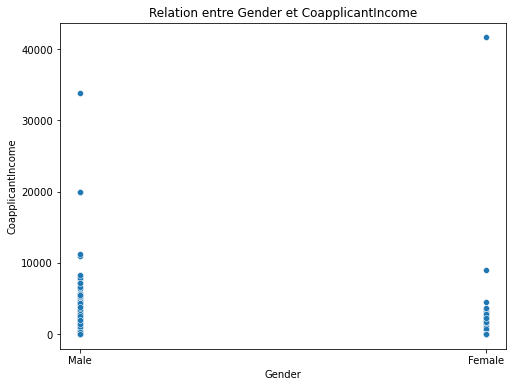

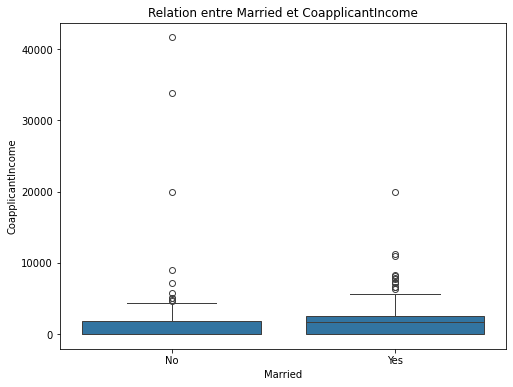

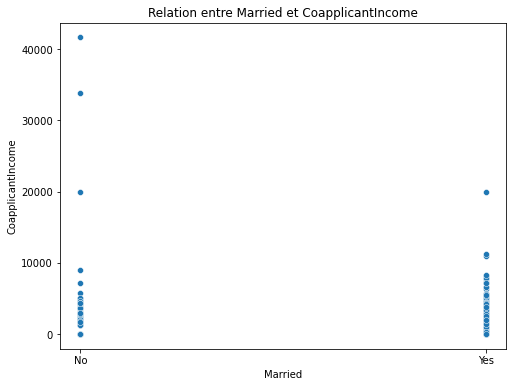

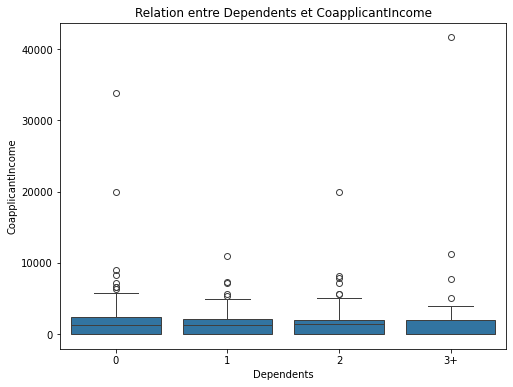

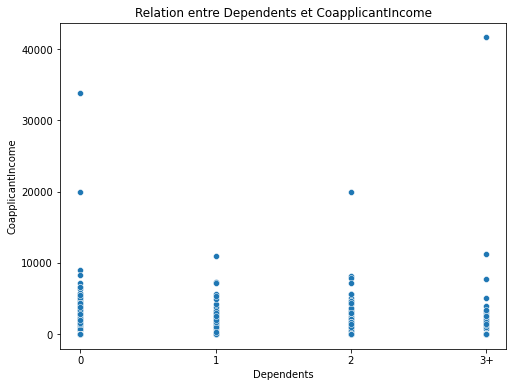

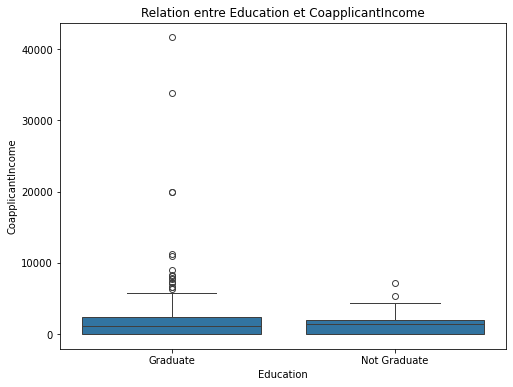

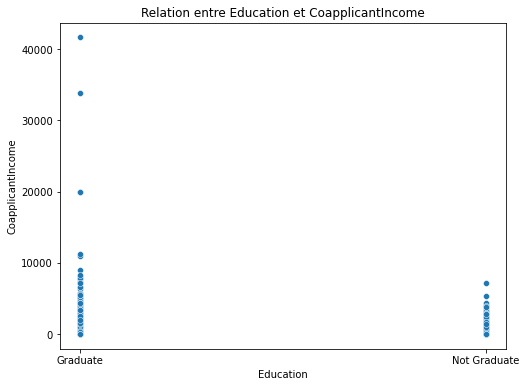

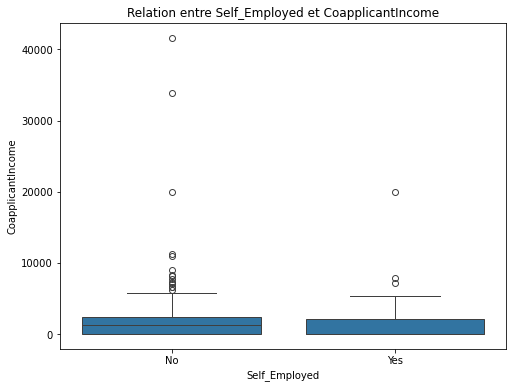

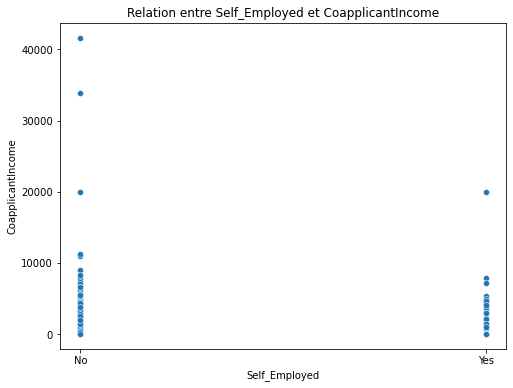

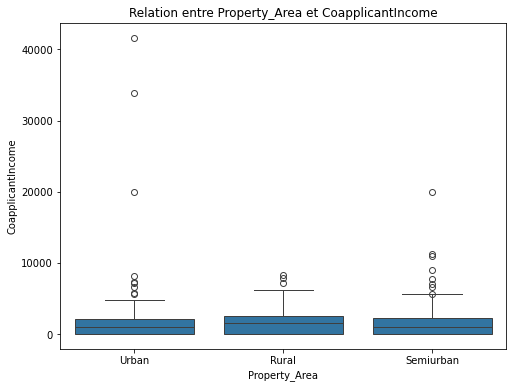

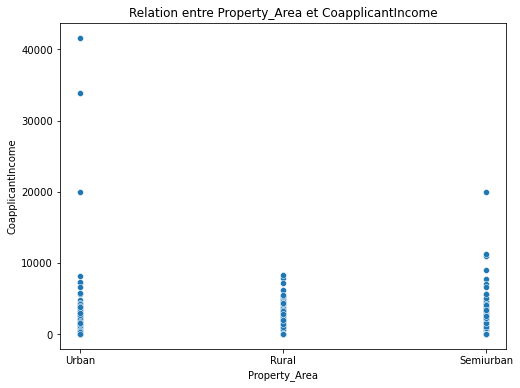

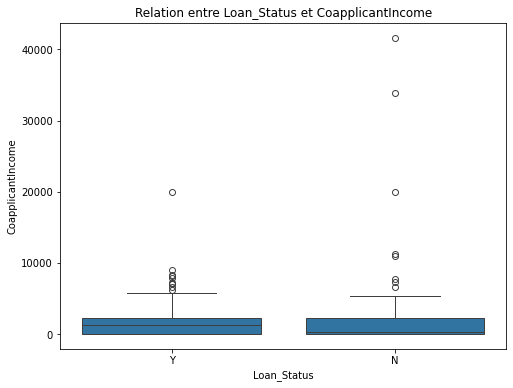

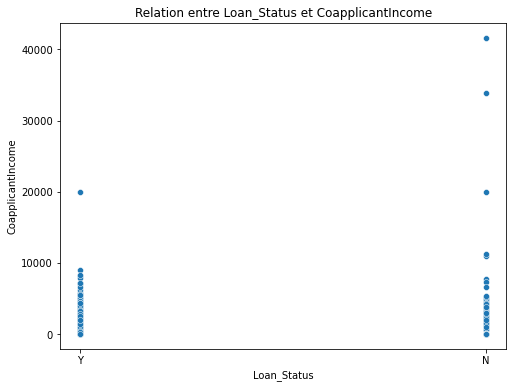

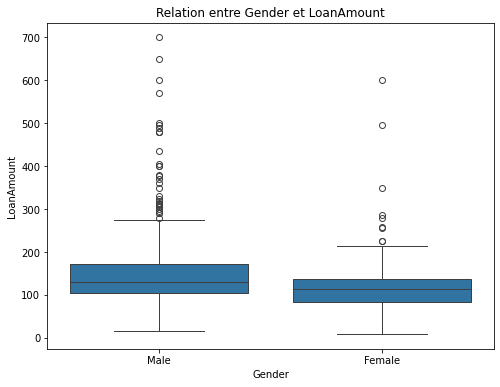

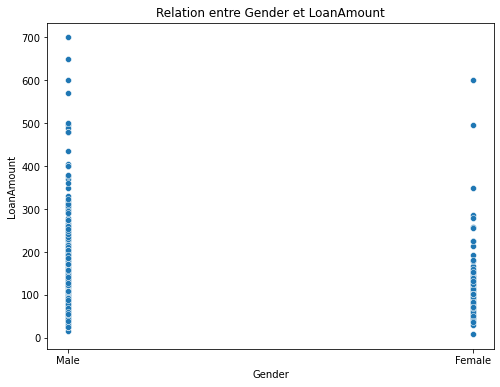

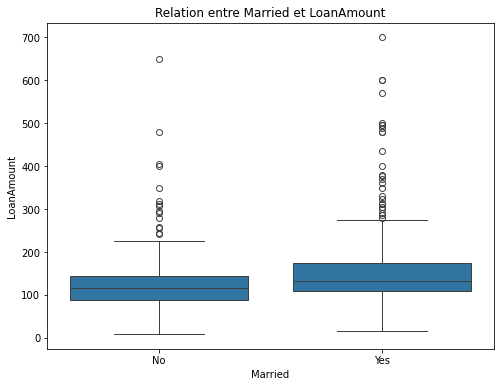

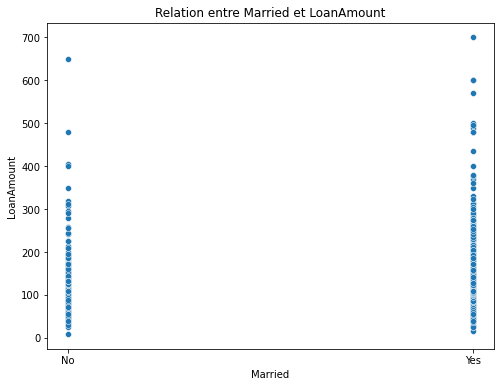

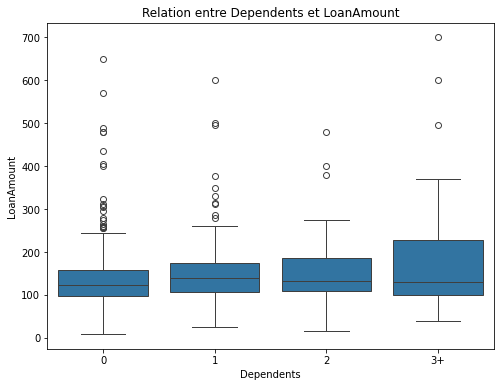

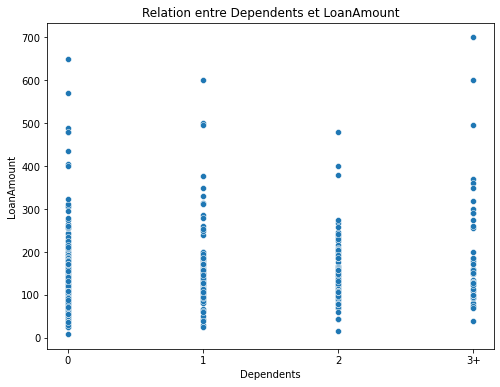

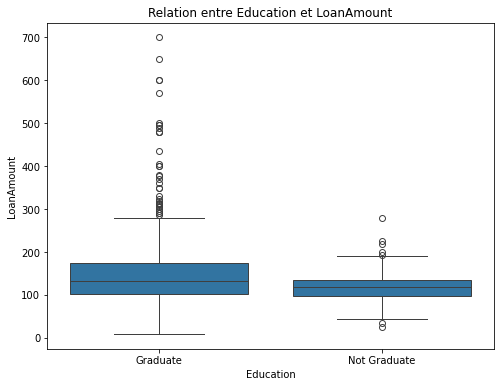

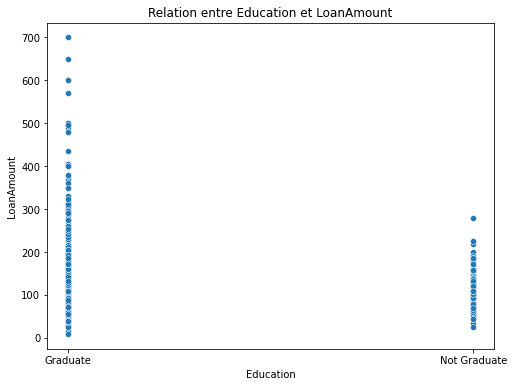

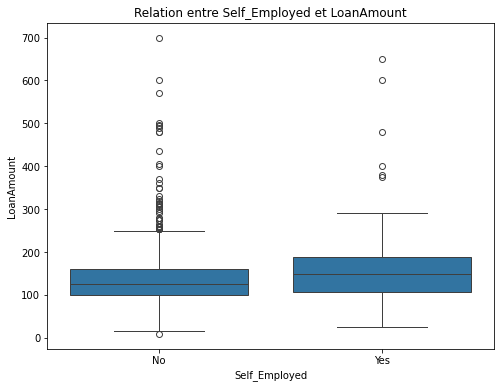

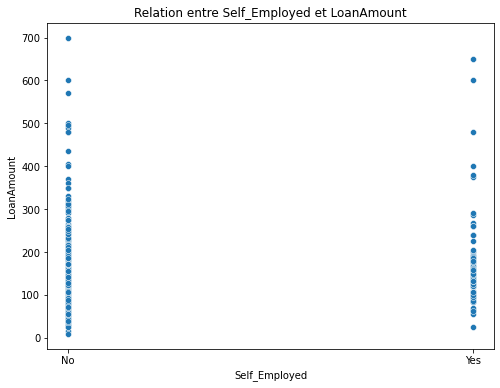

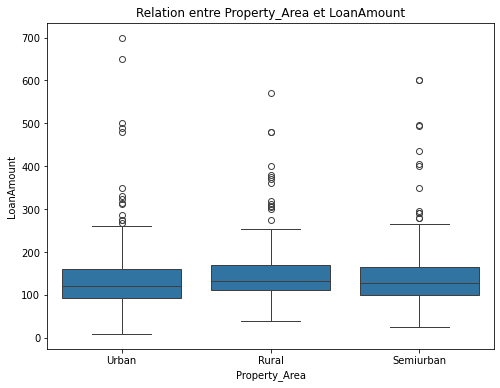

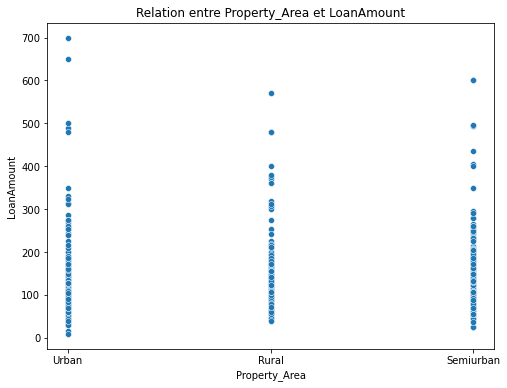

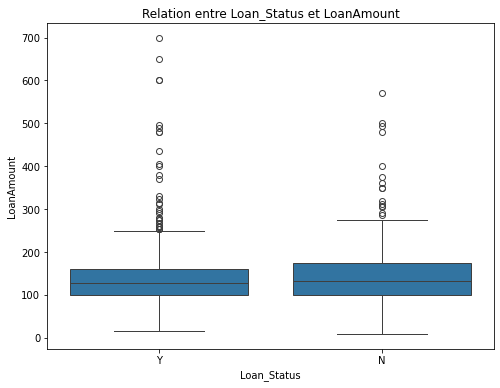

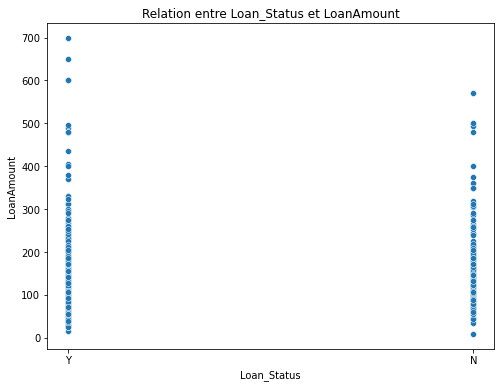

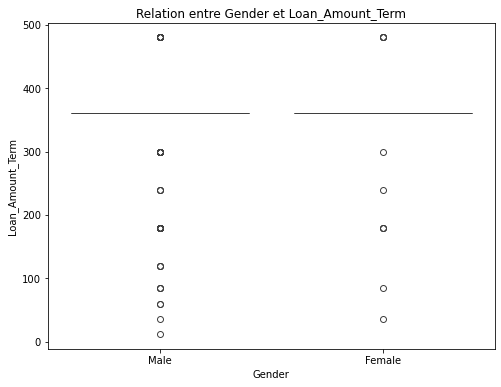

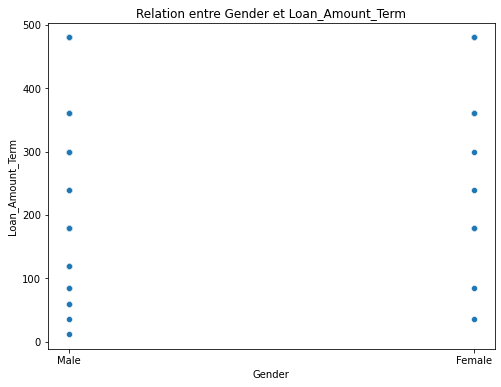

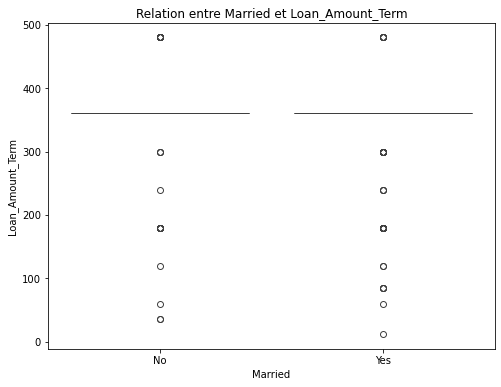

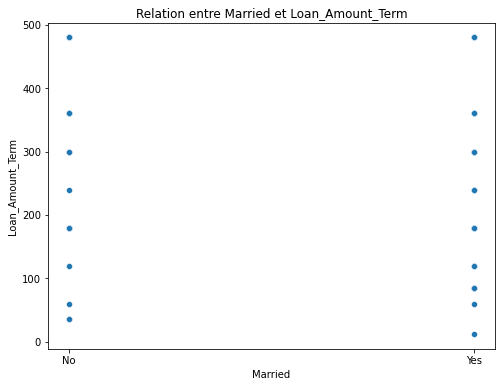

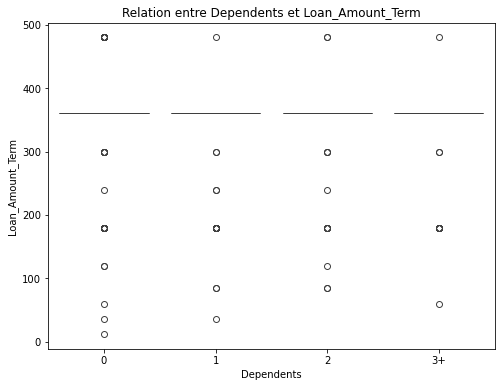

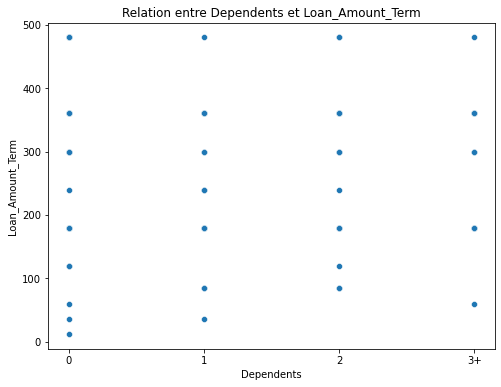

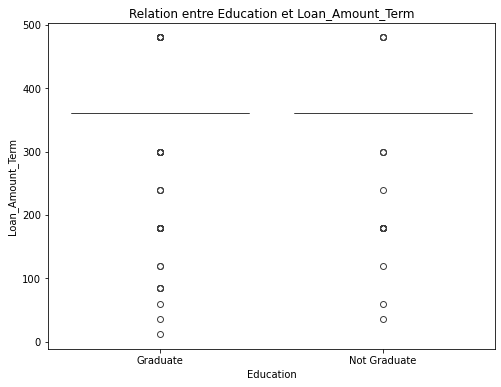

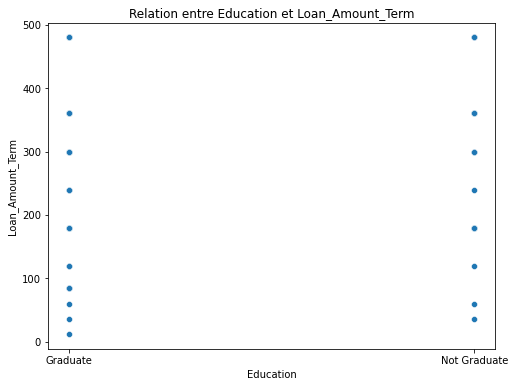

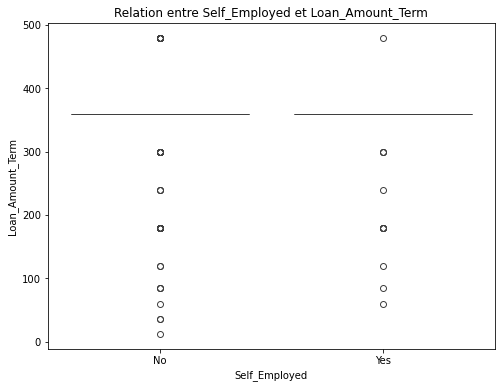

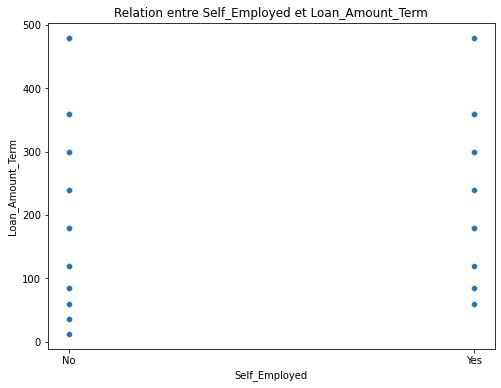

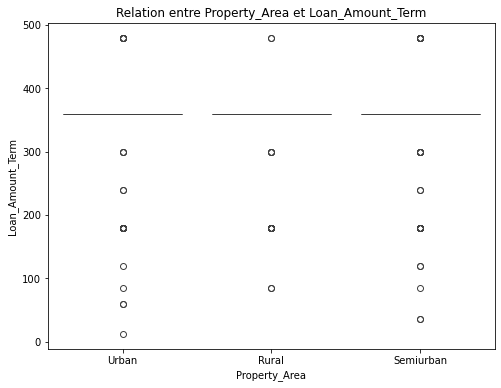

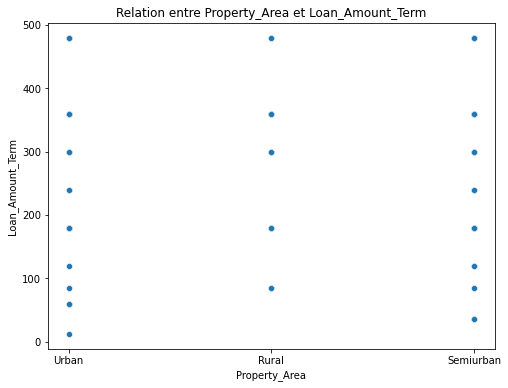

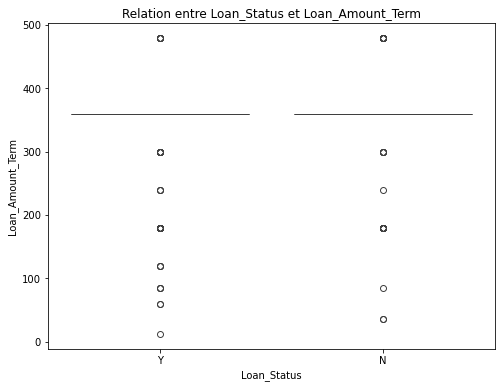

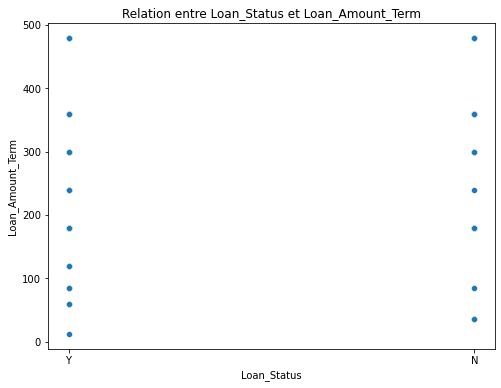

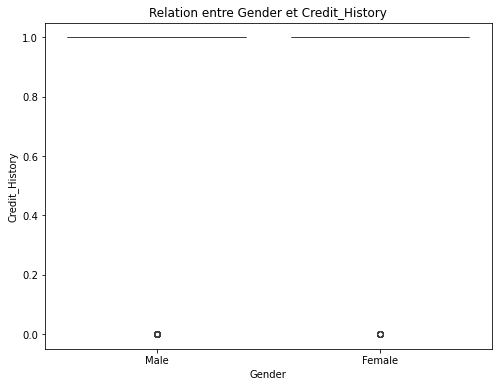

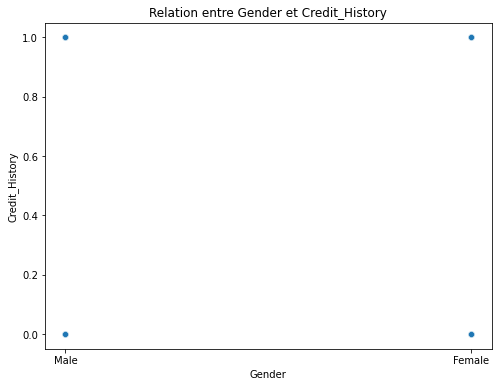

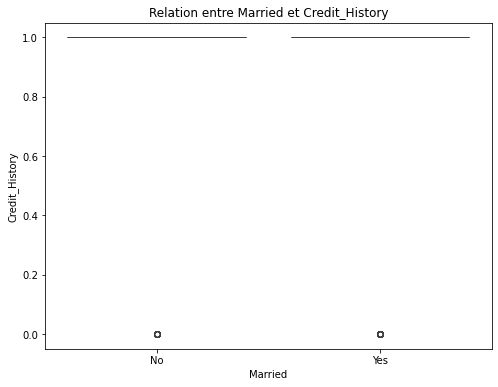

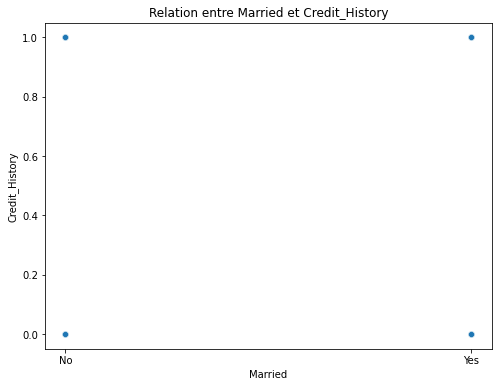

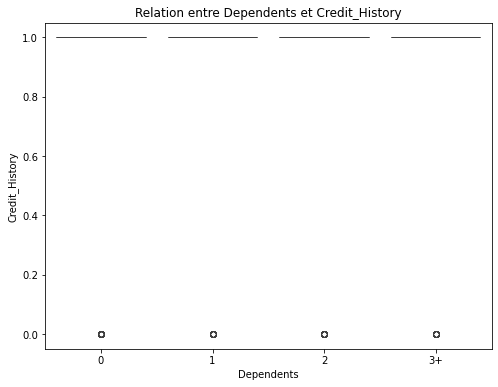

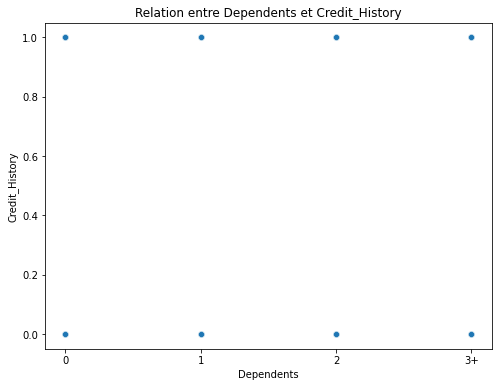

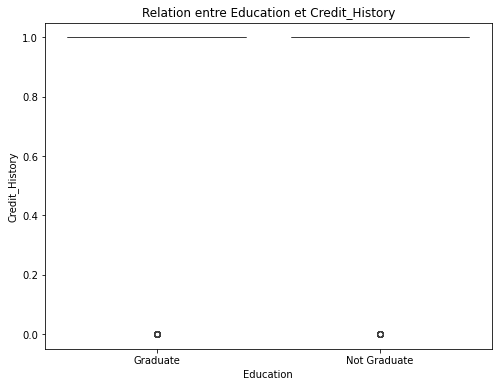

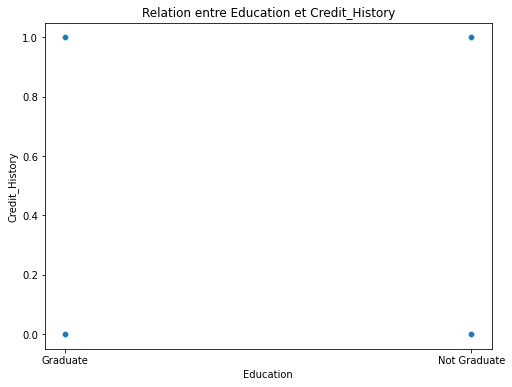

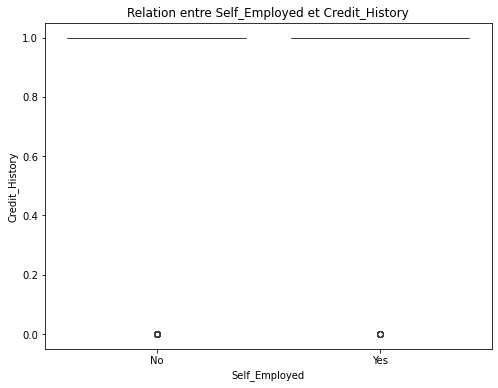

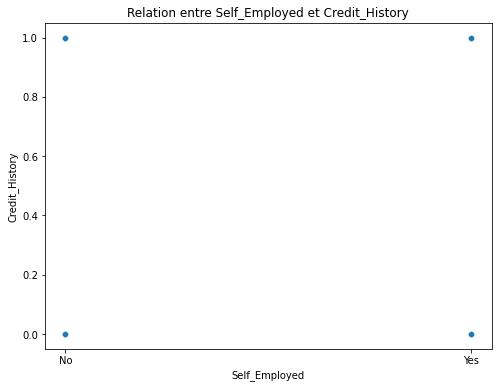

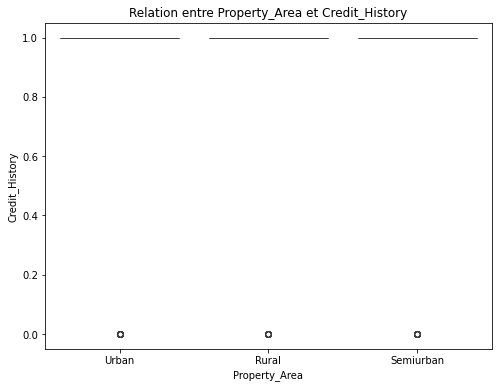

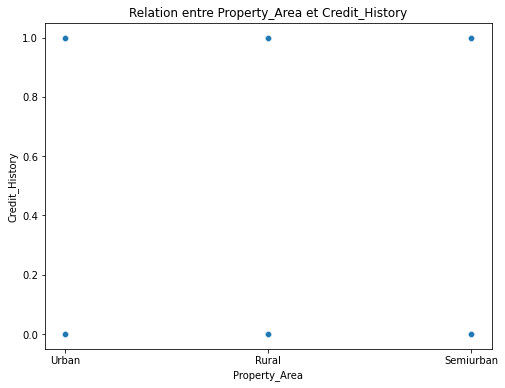

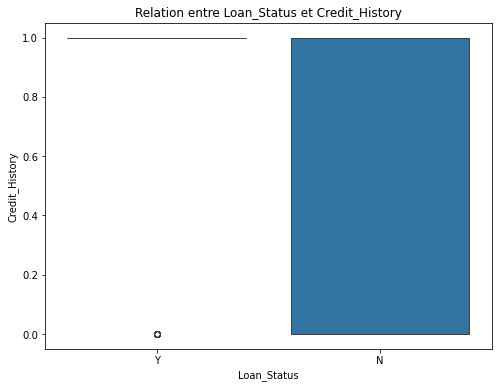

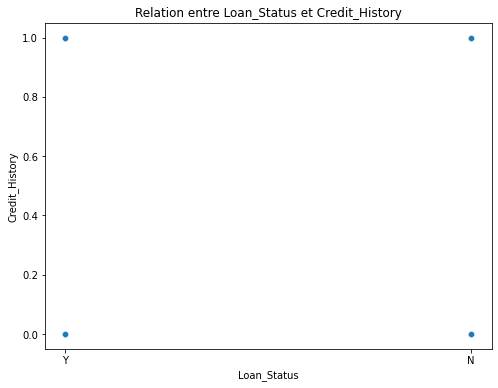

In [26]:

for num_var in num_vars:
    # Boucle sur les variables catégorielles (sans la variable Loan_ID)
    for cat_var in cat_vars_sans_ID:
        # Créer une nouvelle figure
        plt.figure(figsize=(8, 6))
        
        # Afficher un boxplot pour visualiser la relation
        sns.boxplot(x=cat_var, y=num_var, data=df_sans_NA)
        plt.title(f"Relation entre {cat_var} et {num_var}")
        plt.show()
        
        # Créer une nouvelle figure
        plt.figure(figsize=(8, 6))
        
        # Afficher un scatter plot pour visualiser la relation
        sns.scatterplot(x=cat_var, y=num_var, data=df_sans_NA)
        plt.title(f"Relation entre {cat_var} et {num_var}")
        plt.show()

Le but de ce code est d'explorer les relations entre les variables catégorielles et les variables numériques

Tendance centrale : La position de la médiane (barre horizontale à l'intérieur de la boîte) indique la valeur centrale de la variable numérique pour chaque modalité de la variable catégorielle.

Dispersion : La taille de la boîte et la longueur des moustaches donnent une indication de la dispersion des valeurs de la variable numérique pour chaque modalité de la variable catégorielle.

Asymétrie : Si la médiane n'est pas centrée dans la boîte, cela indique une asymétrie dans la distribution des valeurs de la variable numérique.

Outliers : Les points en dehors des moustaches représentent les valeurs extrêmes ou atypiques de la variable numérique pour chaque modalité de la variable catégorielle.

Comparaison entre groupes : En comparant les boxplots des différentes modalités de la variable catégorielle, vous pouvez identifier des différences significatives dans les tendances centrales, les dispersions et les distributions de la variable numérique.

Par exemple, si les boxplots montrent des médianes très différentes entre les modalités de la variable catégorielle, cela peut indiquer une association forte entre les deux variables. De même, des différences importantes dans la dispersion peuvent révéler des hétérogénéités dans la variable numérique selon les groupes définis par la variable catégorielle.

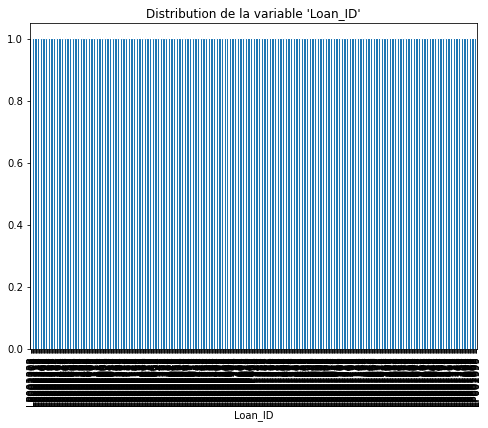

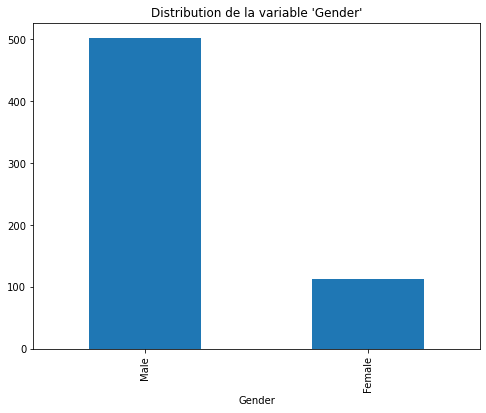

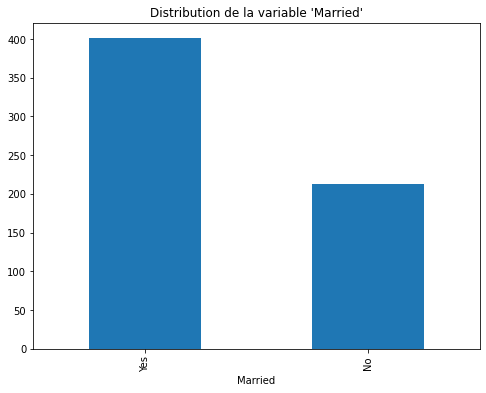

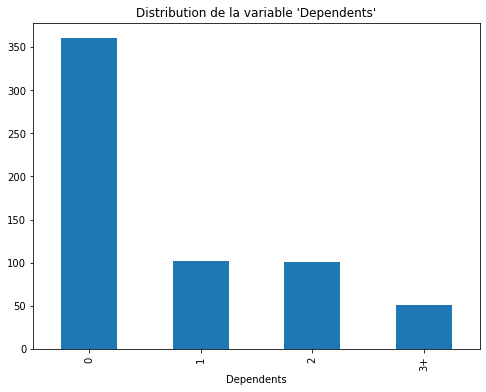

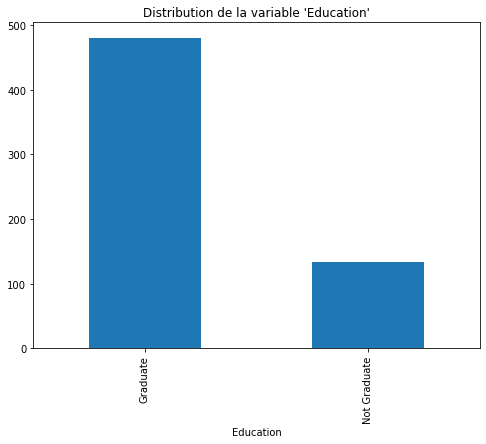

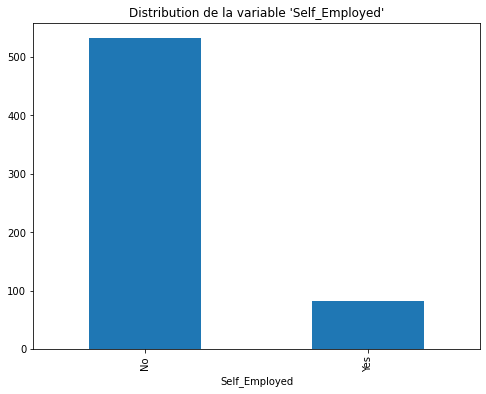

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

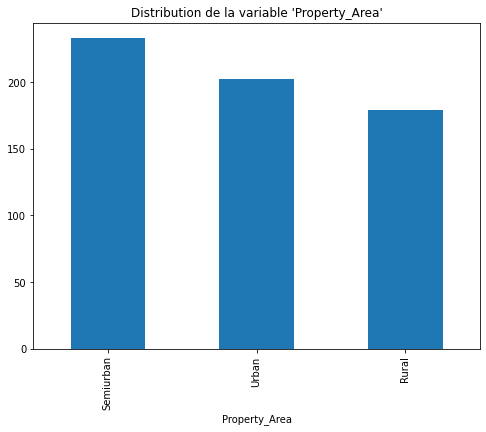

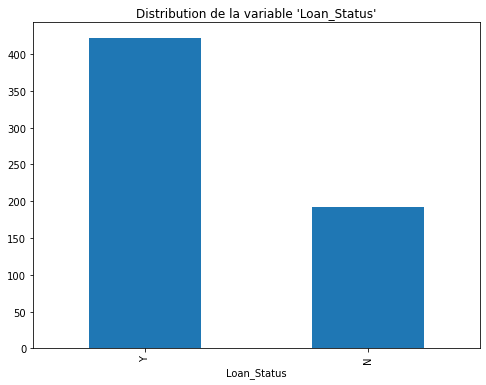

In [27]:
# Tracer des diagrammeen barres pour les variables categorielles

# Parcourir chaque colonne du DataFrame
for i, col in enumerate(df.columns):
    # Créer une nouvelle figure pour chaque variable
    plt.figure(figsize=(8, 6))
    # Si la variable est catégorielle, tracer un diagramme en barres
    if df[col].dtype == 'object':
        # Tracer un graphique en barres
        df[col].value_counts().plot(kind='bar')
        plt.title(f"Distribution de la variable '{col}'")
    # Afficher le graphique
    plt.show()






<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

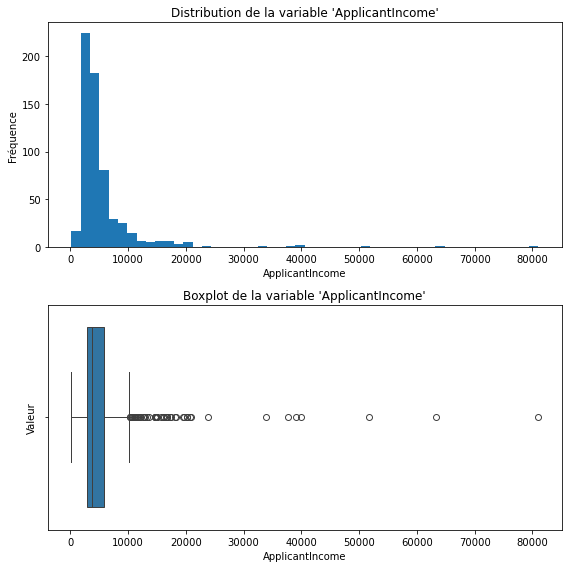

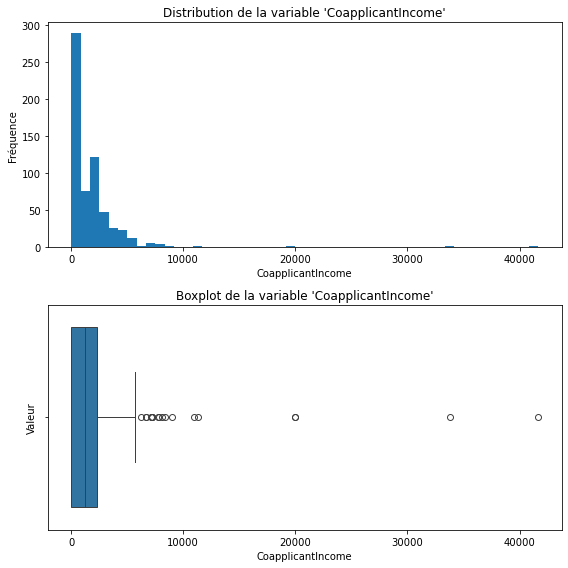

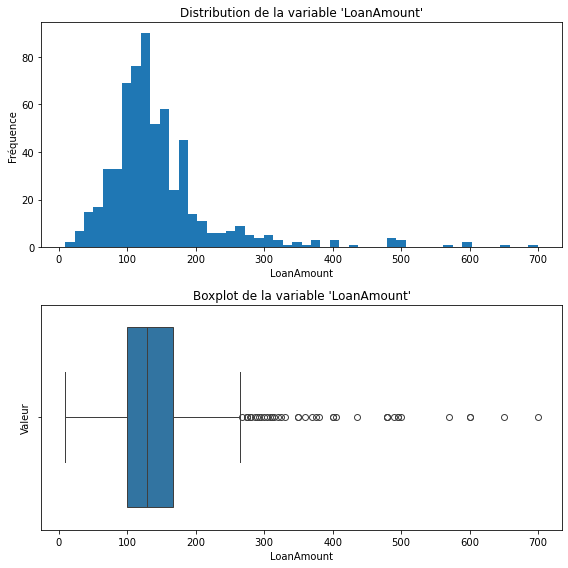

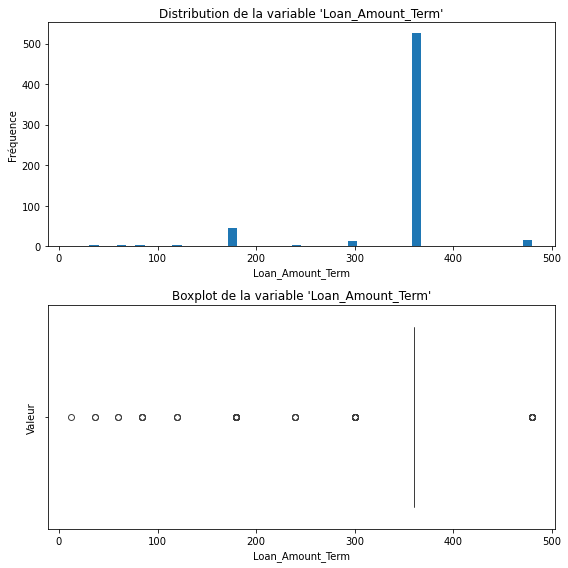

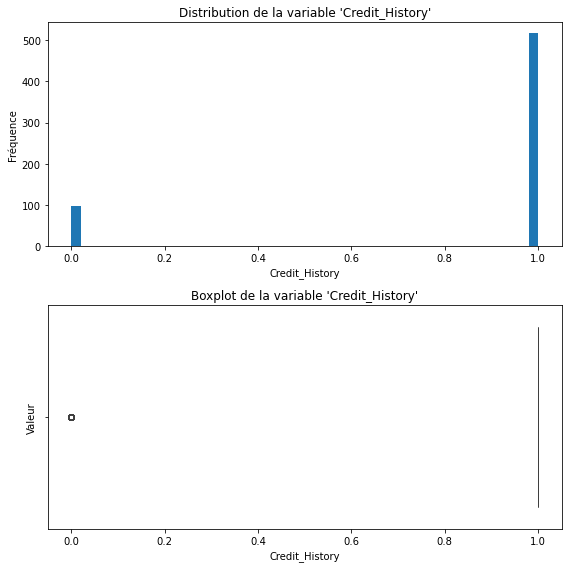

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [28]:
#pour des variables numériques
import matplotlib.pyplot as plt
import seaborn as sns

# Parcourir chaque colonne du DataFrame
for i, col in enumerate(df.columns):
    # Créer une nouvelle figure pour chaque variable
    plt.figure(figsize=(8, 8))
    
    # Si la variable est numérique, tracer un histogramme et un boxplot
    if df[col].dtype in ['int64', 'float64']:
        # Tracer un histogramme
        plt.subplot(2, 1, 1)
        plt.hist(df[col], bins=50)
        plt.title(f"Distribution de la variable '{col}'")
        plt.xlabel(col)
        plt.ylabel('Fréquence')
        
        # Tracer un boxplot
        plt.subplot(2, 1, 2)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot de la variable '{col}'")
        plt.xlabel(col)
        plt.ylabel('Valeur')
        
    plt.tight_layout()
        
        
        
        
    plt.show()

En générant automatiquement un graphique pour chaque colonne, on a ici  une vue d'ensemble rapide de la distribution des données dans un DataFrame.

In [29]:
#sns.pairplot(df)

In [30]:
#sns.pairplot(df_sans_NA)

In [31]:
# Identifier les variables avec des distributions anormales

skewness = df[num_vars].skew()
kurtosis = df[num_vars].kurtosis()

print("Variables avec une asymétrie importante (skewness > 1 ou < -1):")
print(skewness[abs(skewness) > 1].index.tolist())
print(f"---------------------------------------------------------------")

print("Variables avec une multi-modalité potentielle (kurtosis > 3 or < -1):")
print(kurtosis[(kurtosis > 3) | (kurtosis < -1)].index.tolist())



Variables avec une asymétrie importante (skewness > 1 ou < -1):
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
---------------------------------------------------------------
Variables avec une multi-modalité potentielle (kurtosis > 3 or < -1):
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [32]:
# Identifier les variables avec des distributions anormales

skewness1 = df_sans_NA[num_vars].skew()
kurtosis1 = df_sans_NA[num_vars].kurtosis()

print("Variables avec une asymétrie importante (skewness > 1 ou < -1):")
print(skewness1[abs(skewness1) > 1].index.tolist())
print(f"---------------------------------------------------------------")

print("Variables avec une multi-modalité potentielle (kurtosis > 3 or < -1):")
print(kurtosis1[(kurtosis1 > 3) | (kurtosis1 < -1)].index.tolist())



Variables avec une asymétrie importante (skewness > 1 ou < -1):
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
---------------------------------------------------------------
Variables avec une multi-modalité potentielle (kurtosis > 3 or < -1):
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [33]:
skewness = df[num_vars].skew()
skewness

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.681926
Loan_Amount_Term    -2.402112
Credit_History      -1.880101
dtype: float64

##### Commentaires

ApplicantIncome, CoapplicantIncome, LoanAmount :

Ces variables présentent une forte asymétrie (skewness > 1) et une multi-modalité potentielle (kurtosis > 3).
Cela indique que ces variables ont des distributions qui s'écartent significativement de la normale, avec probablement des valeurs extrêmes ou une répartition inégale des observations.
Il sera important d'explorer plus en détail ces variables, par exemple en traçant leurs histogrammes, pour mieux comprendre leurs distributions.


Loan_Amount_Term :

Cette variable présente également une forte asymétrie (skewness > 1) et une multi-modalité potentielle (kurtosis > 3).
Cela peut s'expliquer par le fait que les durées de prêt sont probablement concentrées sur certaines valeurs standard (par exemple, 12, 24, 36 mois).
Là aussi, une visualisation de la distribution serait utile pour mieux comprendre cette variable.


Credit_History :

Cette variable présente une forte asymétrie (skewness < -1).
Cela indique probablement que cette variable est concentrée sur certaines valeurs (par exemple, 0 ou 1), reflétant des catégories de crédit.
Une analyse plus approfondie de la distribution et des catégories de cette variable sera nécessaire.

In [34]:
#confirmation de l'assymetrie des distribution 

# Calculer les coefficients d'asymétrie (skewness) pour chaque colonne
skewness_trie = skewness.sort_values()
skewness_trie_sans_NA = skewness1.sort_values()

# Afficher les résultats
print(f"dataframe avec NA")
print(skewness_trie)
print()
print(f"dataframe sans NA")
print(skewness_trie_sans_NA)





dataframe avec NA
Loan_Amount_Term    -2.402112
Credit_History      -1.880101
LoanAmount           2.681926
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
dtype: float64

dataframe sans NA
Loan_Amount_Term    -2.402112
Credit_History      -1.880101
LoanAmount           2.681926
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
dtype: float64


In [35]:
# Interpréter les résultats
print("\nInterprétation des coefficients de skewness pour la dataframe avec NA :")
for column, value in skewness_trie.items():
    print(f"La variable '{column}' a un coefficient de skewness de {value:.2f}")
    
    if value < -1:
        print(" => \033[1;31mForte asymétrie vers la gauche\033[0m")
    elif value < -0.5:
        print(" => \033[1;33mAsymétrie modérée vers la gauche\033[0m")
    elif value < 0.5:
        print(" => \033[1;32mDistribution relativement symétrique\033[0m")
    elif value < 1:
        print(" => \033[1;33mAsymétrie modérée vers la droite\033[0m")
    else:
        print(" => \033[1;31mForte asymétrie vers la droite\033[0m")
print()
print("\nInterprétation des coefficients de skewness pour la dataframe sans NA :")
for column, value in skewness_trie_sans_NA.items():
    print(f"La variable '{column}' a un coefficient de skewness de {value:.2f}")
    
    if value < -1:
        print(" => \033[1;31mForte asymétrie vers la gauche\033[0m")
    elif value < -0.5:
        print(" => \033[1;33mAsymétrie modérée vers la gauche\033[0m")
    elif value < 0.5:
        print(" => \033[1;32mDistribution relativement symétrique\033[0m")
    elif value < 1:
        print(" => \033[1;33mAsymétrie modérée vers la droite\033[0m")
    else:
        print(" => \033[1;31mForte asymétrie vers la droite\033[0m")


Interprétation des coefficients de skewness pour la dataframe avec NA :
La variable 'Loan_Amount_Term' a un coefficient de skewness de -2.40
 => Forte asymétrie vers la gauche
La variable 'Credit_History' a un coefficient de skewness de -1.88
 => Forte asymétrie vers la gauche
La variable 'LoanAmount' a un coefficient de skewness de 2.68
 => Forte asymétrie vers la droite
La variable 'ApplicantIncome' a un coefficient de skewness de 6.54
 => Forte asymétrie vers la droite
La variable 'CoapplicantIncome' a un coefficient de skewness de 7.49
 => Forte asymétrie vers la droite


Interprétation des coefficients de skewness pour la dataframe sans NA :
La variable 'Loan_Amount_Term' a un coefficient de skewness de -2.40
 => Forte asymétrie vers la gauche
La variable 'Credit_History' a un coefficient de skewness de -1.88
 => Forte asymétrie vers la gauche
La variable 'LoanAmount' a un coefficient de skewness de 2.68
 => Forte asymétrie vers la droite
La variable 'ApplicantIncome' a un coeffi

##### Étudier les corrélations ( generale et var_inte)

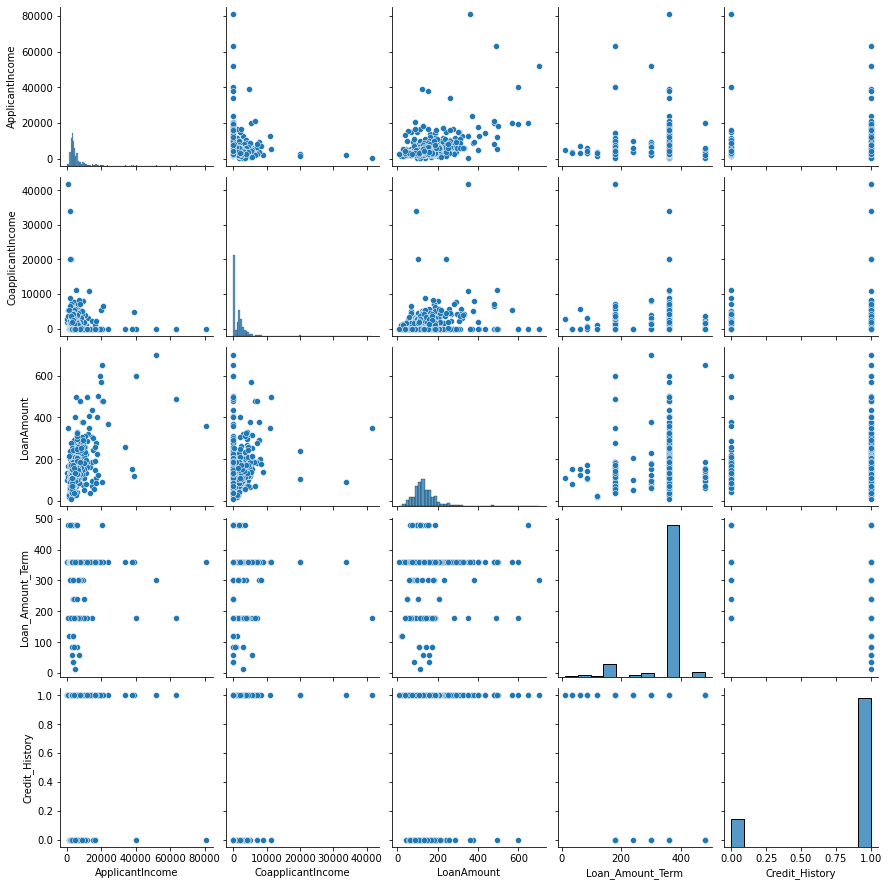

In [36]:
#grille de graphiques de dispersion (scatter plots)
# pour toutes les paires de variables numériques
sns.pairplot(df_sans_NA)

In [37]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
num_vars

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

Heatmap avec dataframe avec NA


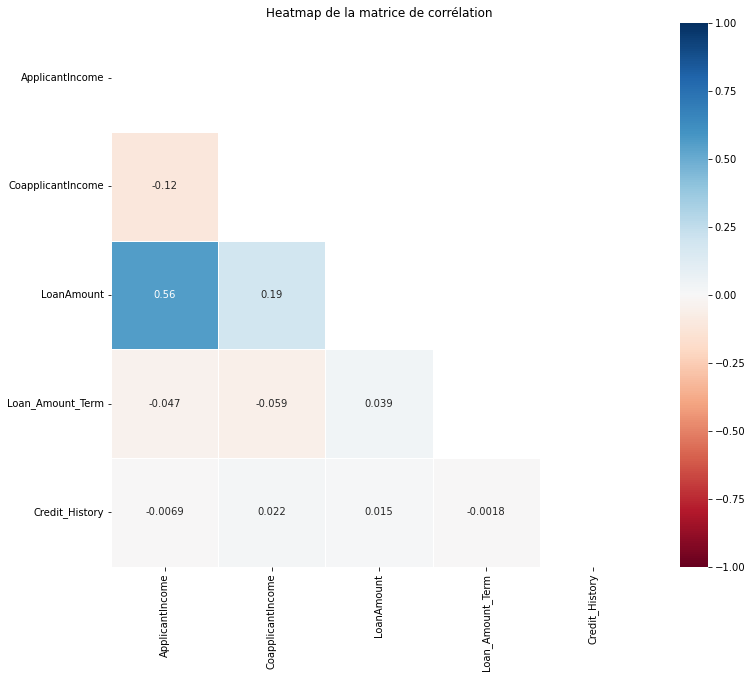

In [39]:


# Heatmap

# Calculer la matrice de corrélation
corr = df[num_vars].corr()


# Créer un masque pour masquer les valeurs en double
mask = np.triu(np.ones_like(corr, dtype=bool))

print(f"Heatmap avec dataframe avec NA")
# Créer la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, 
            mask=mask,
            cmap='RdBu',
            annot=True,
            linewidths=0.5,
            vmin=-1, vmax=1)

# Ajouter un titre et des étiquettes
plt.title('Heatmap de la matrice de corrélation')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


Heatmap avec dataframe sans NA


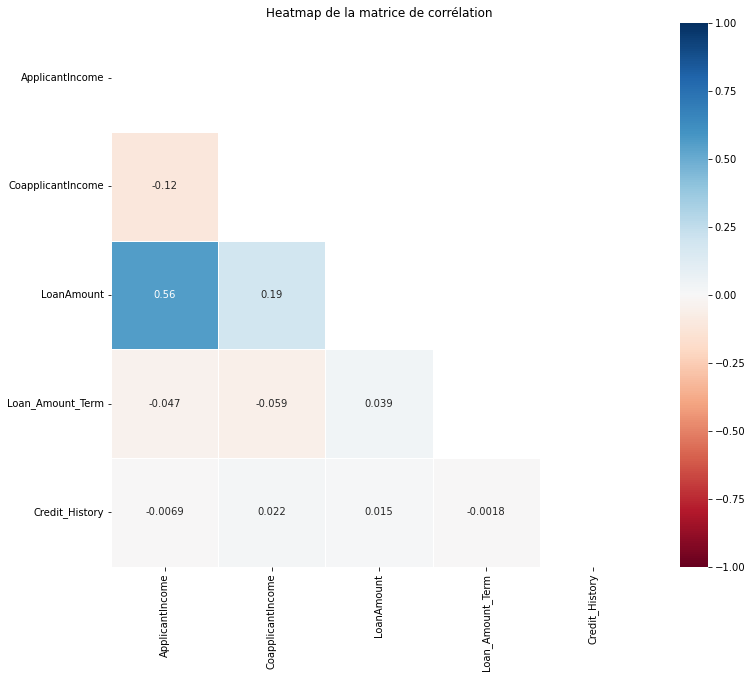

In [40]:
# Heatmap

# Calculer la matrice de corrélation

corr_sans_NA = df_sans_NA[num_vars].corr()

# Créer un masque pour masquer les valeurs en double
mask = np.triu(np.ones_like(corr_sans_NA, dtype=bool))

print(f"Heatmap avec dataframe sans NA")
# Créer la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_sans_NA, 
            mask=mask,
            cmap='RdBu',
            annot=True,
            linewidths=0.5,
            vmin=-1, vmax=1)

# Ajouter un titre et des étiquettes
plt.title('Heatmap de la matrice de corrélation')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [41]:

# Extraction des couples de variables ayant une corrélation supérieure à 0.8
corr_threshold = 0.5
corr_pairs = {}

for col in corr_sans_NA.columns:
    corr_pairs[col] = []
    corr_values = corr_sans_NA[abs(corr_sans_NA[col]) > corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation supérieure à 0.8
print(f"Couples de variables ayant une corrélation supérieure à {corr_threshold} :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation supérieure à 0.5 :

ApplicantIncome - LoanAmount
LoanAmount - ApplicantIncome


In [42]:

# Extraction des couples de variables ayant une corrélation inf à 0.8
corr_threshold = -0.8
corr_pairs = {}

for col in corr_sans_NA.columns:
    corr_pairs[col] = []
    corr_values = corr_sans_NA[abs(corr_sans_NA[col]) < corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation inf à 0.8
print(f"Couples de variables ayant une corrélation inferirieure à {corr_threshold} :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation inferirieure à -0.8 :



In [43]:
# Identifier les variables redondantes ou colinéaires
eigen_values, eigen_vectors = np.linalg.eig(corr_sans_NA)
condition_number = max(eigen_values) / min(eigen_values)

if condition_number > 30:
    print("Attention, les variables semblent colinéaires.")
else:
    print("Les variables ne semblent pas présenter de problème de colinéarité.")

Les variables ne semblent pas présenter de problème de colinéarité.


##### Analyse de la vaiable d'intérêt 

In [44]:
var_inte = 'Loan_Status' 



In [45]:
# Analyse univariée de Loan_Status
print(f"Nombre total d'observations :" ,len(df[var_inte]))
print(f"------------------------------------")
print(f"Nombre d'observations par modalité  :", df_sans_NA[var_inte].value_counts())
print(f"-------------------------------------------------")
print(f"Proportion d'observations par modalité  :",df_sans_NA[var_inte].value_counts(normalize=True))

Nombre total d'observations : 614
------------------------------------
Nombre d'observations par modalité  : Loan_Status
Y    422
N    192
Name: count, dtype: int64
-------------------------------------------------
Proportion d'observations par modalité  : Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


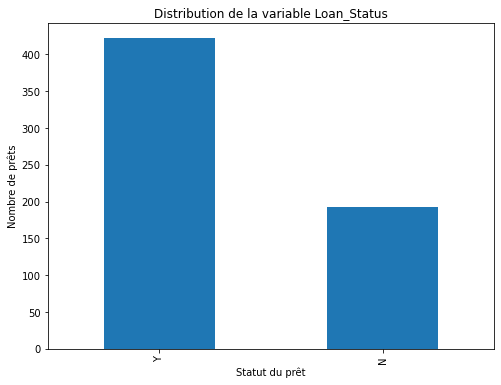

In [46]:
# comme on a une variable categorielle 
#on fait unDiagramme en barres de la répartition des valeurs

plt.figure(figsize=(8, 6))
df_sans_NA[var_inte].value_counts().plot(kind='bar')
plt.title('Distribution de la variable Loan_Status')
plt.xlabel('Statut du prêt')
plt.ylabel('Nombre de prêts')
plt.show()

In [47]:
#Tests statistiques:
#Test du chi-carré pour vérifier l'hypothèse d'égalité des proportions entre les deux modalités
from scipy.stats import chi2_contingency
obs = df_sans_NA[var_inte].value_counts().tolist()
chi2, p_value, dof, expected = chi2_contingency(obs)
print(f"Valeur du chi-carré : {chi2:.2f}")
print(f"p-value : {p_value:.4f}")
print(f"-----------------------")

# Interpréter les résultats
alpha = 0.05

if p_value < alpha:
    print(f"Il y a une différence statistiquement significative entre les proportions des deux modalités de la variable '{var_inte}' (p-value < {alpha}).")
    print(f"On peut donc rejeter l'hypothèse nulle d'égalité des proportions.")
else:
    print(f"Il n'y a pas de différence statistiquement significative entre les proportions des deux modalités de la variable '{var_inte}' (p-value >= {alpha}).")
    print(f"On ne peut pas rejeter l'hypothèse nulle d'égalité des proportions.")

Valeur du chi-carré : 0.00
p-value : 1.0000
-----------------------
Il n'y a pas de différence statistiquement significative entre les proportions des deux modalités de la variable 'Loan_Status' (p-value >= 0.05).
On ne peut pas rejeter l'hypothèse nulle d'égalité des proportions.


/home/ensai/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


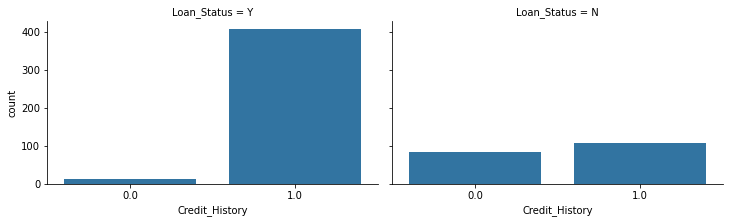

In [48]:
# Credit history
grid = sns.FacetGrid(df_sans_NA, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')



On remarque qu'on a une forte proportion de credit accepeté (Y) pour des personnes qui ont deja un historique de credit 

et pour les credit refusé on a un equilibre 

Les emprunteurs ayant un bon historique de crédit (valeur 1) ont beaucoup plus de chances d'obtenir leur prêt que ceux avec un mauvais historique de crédit (valeur 0).


/home/ensai/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ensai/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ensai/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


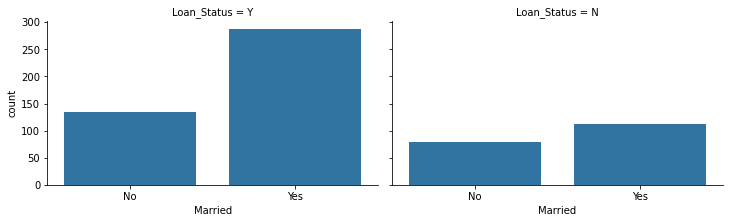

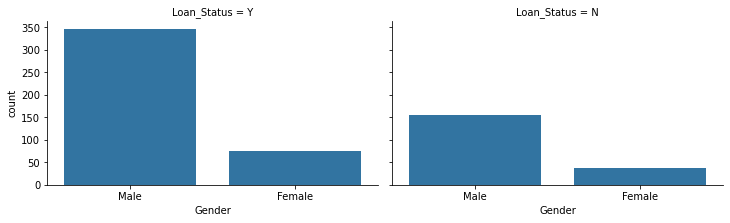

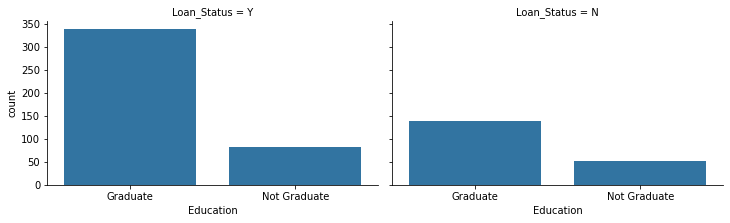

In [49]:
# Statut marital
grid = sns.FacetGrid(df_sans_NA, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Married')

# Genre
grid = sns.FacetGrid(df_sans_NA, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')

# Niveau d'éducation
grid = sns.FacetGrid(df_sans_NA, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education')


Text(0, 0.5, 'Statut du prêt')

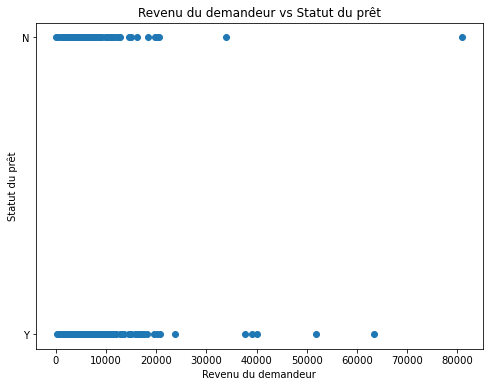

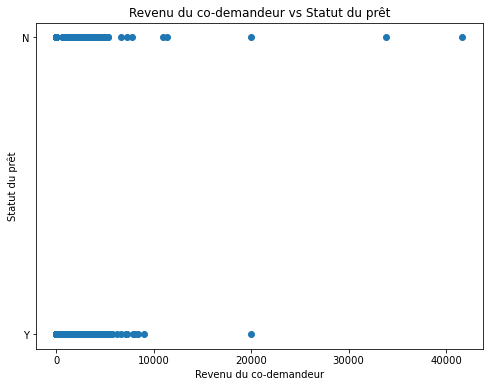

In [50]:
# Revenu du demandeur
plt.figure(figsize=(8, 6))
plt.scatter(df_sans_NA['ApplicantIncome'], df_sans_NA['Loan_Status'])
plt.title('Revenu du demandeur vs Statut du prêt')
plt.xlabel('Revenu du demandeur')
plt.ylabel('Statut du prêt')

# Revenu du co-demandeur
plt.figure(figsize=(8, 6))
plt.scatter(df_sans_NA['CoapplicantIncome'], df_sans_NA['Loan_Status'])
plt.title('Revenu du co-demandeur vs Statut du prêt')
plt.xlabel('Revenu du co-demandeur')
plt.ylabel('Statut du prêt')

# Statistiques descriptives par statut du prêt
#print(df_sans_NA.groupby('Loan_Status').median())

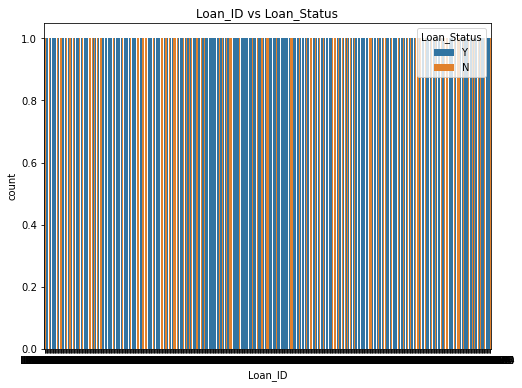

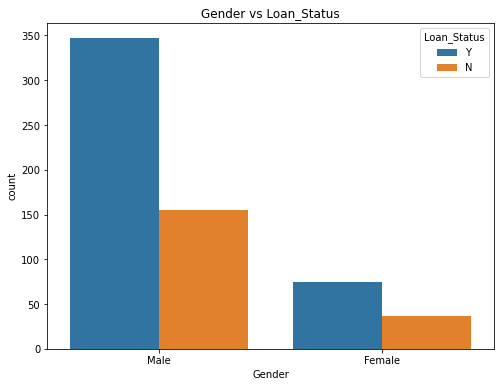

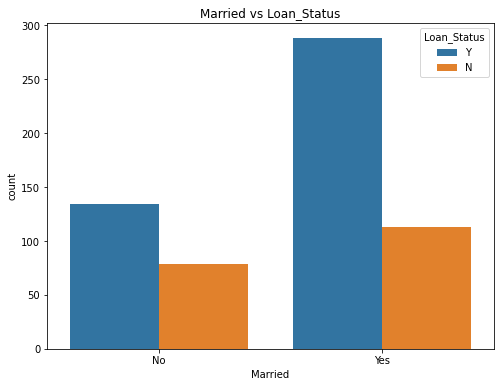

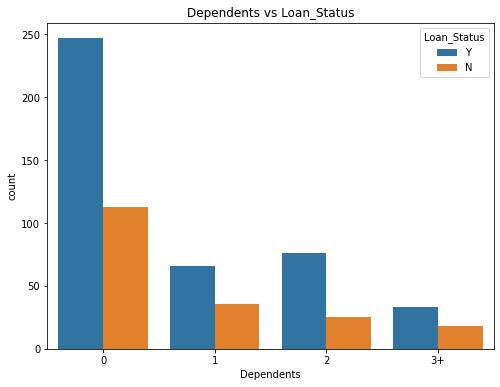

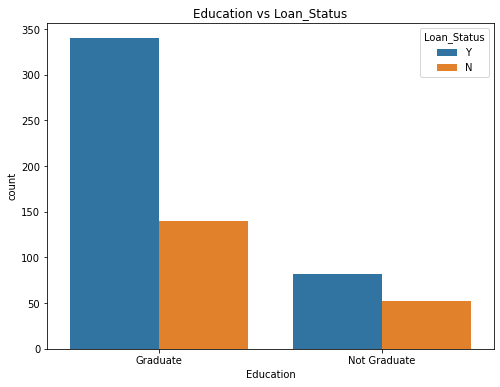

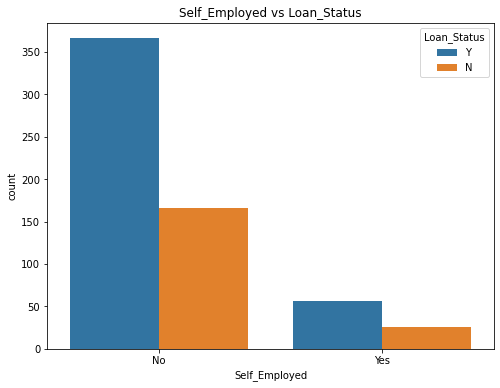

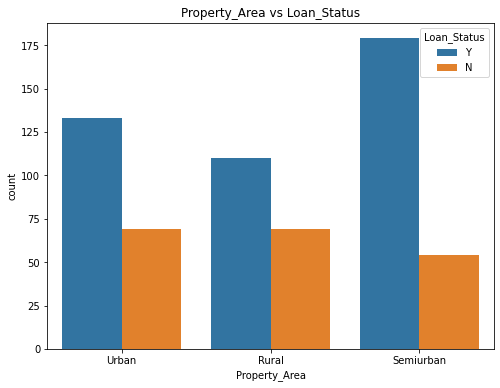

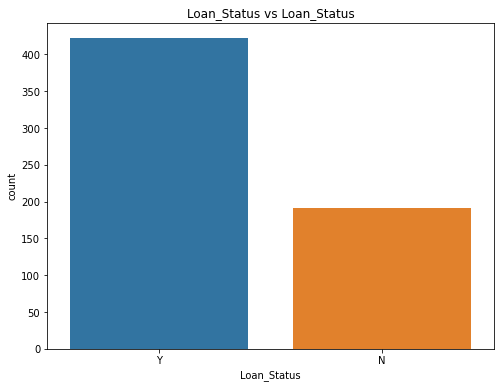

In [51]:
# Analyse bivariée
# Analyse bivariée avec variables catégorielles
for col in cat_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue=var_inte, data=df)
    plt.title(f"{col} vs Loan_Status")
    


In [52]:
from scipy.stats import chi2_contingency

# Initialiser les listes pour stocker les résultats
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []

# Parcourir toutes les variables catégorielles
for var in cat_vars:
    # Calculer le tableau de contingence
    contingency_table = pd.crosstab(df_sans_NA[var_inte], df_sans_NA[var])
    # Calculer la statistique de test du Chi-deux et la p-valeur
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculer le coefficient V de Cramer
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r,k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rc = r-((r-1)**2)/(n-1)
    kc = k-((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)
    cramer_vs.append(cramer_v)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs
})

# Trier le DataFrame par ordre croissant de V de Cramer
results_df.sort_values(by='V de Cramer', inplace=True,ascending=False)

# Afficher le tableau des résultats
results_df

/tmp/ipykernel_5336/3427023600.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))


,Variable,Chi2,P-valeur,V de Cramer
0,Loan_ID,614.000000,4.810243e-01,inf
7,Loan_Status,609.355922,1.544676e-134,0.996205
6,Property_Area,12.297623,2.136019e-03,0.129590
2,Married,4.731876,2.960858e-02,0.078008
4,Education,4.091490,4.309962e-02,0.070997
3,Dependents,3.151399,3.688663e-01,0.015460
1,Gender,0.110879,7.391461e-01,0.000000
5,Self_Employed,0.000000,1.000000e+00,0.000000


##### Interprétation :

Loan_Status (variable 7) a une statistique du Chi2 de 609.355922 avec une p-valeur de 1.544676e-134. Cette très faible p-valeur (inférieure au seuil de significativité de 0,05) indique qu'il y a une association significative entre la variable "Loan_Status" et les autres variables.

Le V de Cramer pour "Loan_Status" est de 0.996205, ce qui indique une très forte association.
Property_Area (variable 6) a une p-valeur de 2.136019e-03, ce qui est inférieure au seuil de significativité de 0,05. Cela signifie qu'il y a une association significative entre cette variable et les autres.

Le V de Cramer pour "Property_Area" est de 0.129590, ce qui indique une association modérée.
Married (variable 2) et Education (variable 4) ont également des p-valeurs inférieures à 0,05, indiquant des associations significatives avec les autres variables, bien que plus faibles (V de Cramer < 0,1).
Les autres variables (Loan_ID, Dependents, Gender et Self_Employed) n'ont pas d'associations significatives avec les autres variables (p-valeurs > 0,05).

boxplot entre Loan_Status et ApplicantIncome


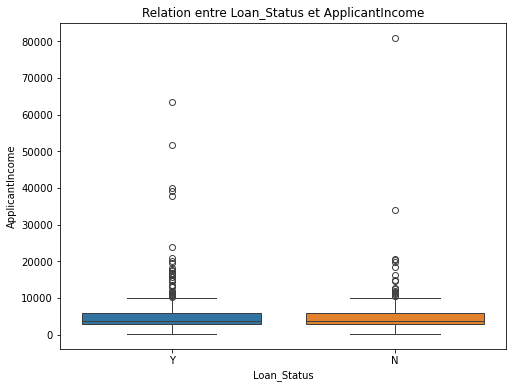

nuage de point entre Loan_Status et ApplicantIncome


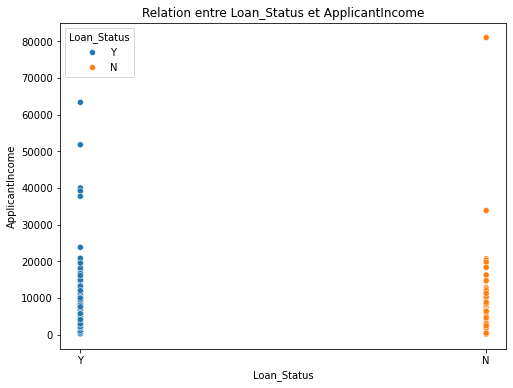

boxplot entre Loan_Status et CoapplicantIncome


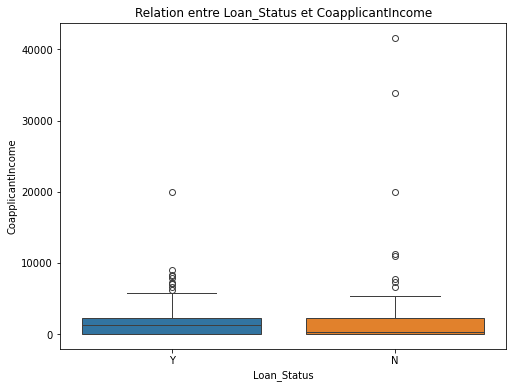

nuage de point entre Loan_Status et CoapplicantIncome


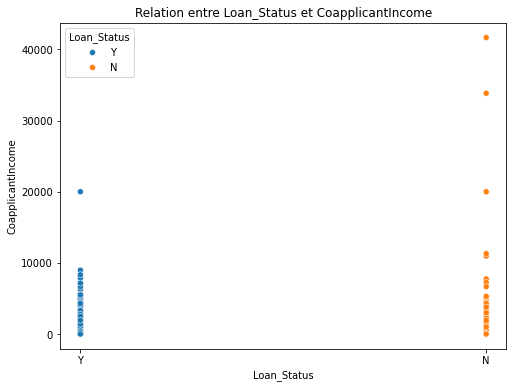

boxplot entre Loan_Status et LoanAmount


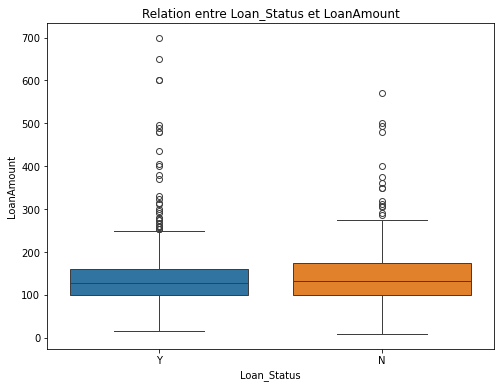

nuage de point entre Loan_Status et LoanAmount


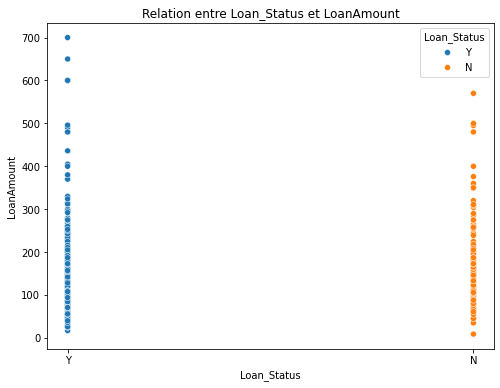

boxplot entre Loan_Status et Loan_Amount_Term


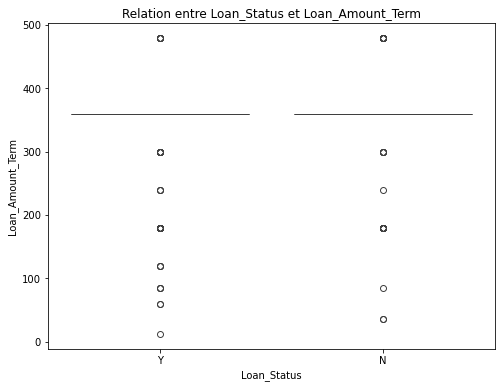

nuage de point entre Loan_Status et Loan_Amount_Term


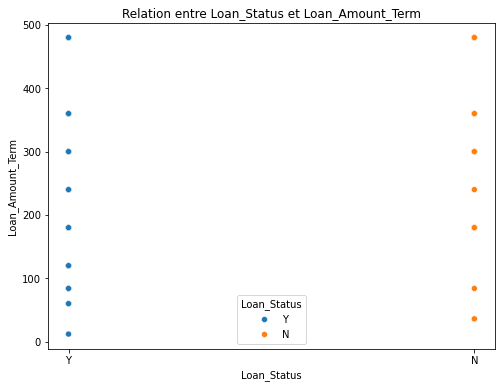

boxplot entre Loan_Status et Credit_History


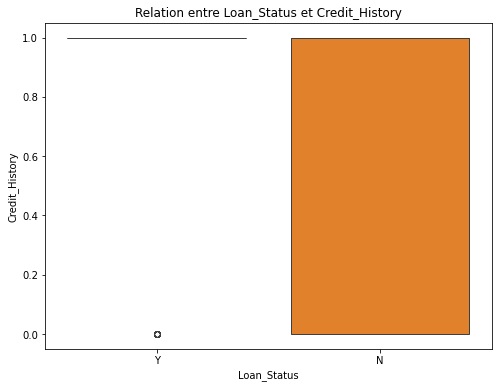

nuage de point entre Loan_Status et Credit_History


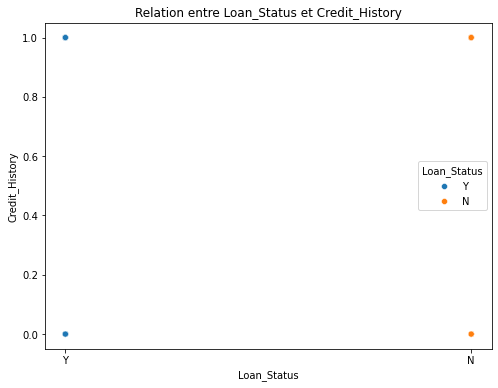

In [53]:
# Analyse bivariée avec variables numériques
for num_var in num_vars:
    print(f"boxplot entre {var_inte} et {num_var}")
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=var_inte, y=num_var, hue=var_inte, data=df)
    plt.title(f"Relation entre {var_inte} et {num_var}")
    plt.show()

    print(f"nuage de point entre {var_inte} et {num_var}")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var_inte, y=num_var, hue=var_inte, data=df)
    plt.title(f"Relation entre {var_inte} et {num_var}")
    plt.show()

Voici un exemple concret à partir d'un jeu de données sur le crédit à la consommation :

Supposons que la variable d'intérêt soit "Défaut de paiement" (0 = pas de défaut, 1 = défaut). Les variables numériques du jeu de données sont "Revenu", "Montant du crédit" et "Durée du crédit".

En analysant les boxplots et les scatter plots, on pourrait observer que :

La variable "Revenu" montre des différences marquées de distribution entre les clients ayant fait défaut et ceux n'ayant pas fait défaut.
La variable "Montant du crédit" présente une relation positive et linéaire avec la probabilité de défaut.
La variable "Durée du crédit" semble avoir une relation non linéaire en U avec la probabilité de défaut.
Ces observations suggèrent que les variables "Revenu" et "Montant du crédit" sont les plus liées à la variable d'intérêt "Défaut de paiement". La variable "Durée du crédit" semble également importante, 


Voici quelques approches pour identifier les variables numériques les plus liées à la variable d'intérêt, en s'appuyant sur l'analyse bivariée :

Comparaison des distributions des variables numériques:
Examinez attentivement les boxplots pour chaque variable numérique en fonction des modalités de la variable d'intérêt.
Identifiez les variables numériques qui présentent les plus grandes différences dans les médianes, les dispersions, la présence de valeurs atypiques, etc. entre les groupes définis par la variable d'intérêt.
Par exemple, si la variable "Revenu" montre des différences marquées de distribution selon les modalités de la variable "Niveau d'études", cela indique une forte relation entre ces deux variables.

Analyse des relations linéaires ou non linéaires:
Examinez les scatter plots entre chaque variable numérique et la variable d'intérêt.
Repérez les variables numériques qui présentent les relations les plus nettes, qu'elles soient linéaires ou non linéaires.
Par exemple, si la variable "Âge" montre une relation curviligne (en U ou en cloche) avec la variable "Satisfaction au travail", cela suggère un lien important entre ces deux variables.

Calcul de mesures de corrélation:
Calculez des mesures de corrélation, comme le coefficient de corrélation de Pearson pour les relations linéaires, ou le coefficient de corrélation de Spearman pour les relations monotones non linéaires.
Identifiez les variables numériques ayant les coefficients de corrélation les plus élevés (en valeur absolue) avec la variable d'intérêt.
Par exemple, si la variable "Chiffre d'affaires" a un coefficient de corrélation de 0.8 avec la variable "Rentabilité", cela indique une forte relation positive entre ces deux variables.

In [54]:

"""
#si var_inte est numerique 
# Extraction des colonnes de variables explicatives
X = df_sans_NA.drop(var_inte, axis=1)

# Affichage des nuages de points entre la variable à expliquer et toutes les variables explicatives avec seaborn
for col in X.columns:
    if df_sans_NA[col].dtype != 'object':
        sns.scatterplot(x=X[col], y=df_sans_NA[var_inte])
        plt.show()
"""



"\n#si var_inte est numerique \n# Extraction des colonnes de variables explicatives\nX = df_sans_NA.drop(var_inte, axis=1)\n\n# Affichage des nuages de points entre la variable à expliquer et toutes les variables explicatives avec seaborn\nfor col in X.columns:\n    if df_sans_NA[col].dtype != 'object':\n        sns.scatterplot(x=X[col], y=df_sans_NA[var_inte])\n        plt.show()\n"

In [55]:
import scipy.stats as stats
# Initialiser les listes pour stocker les résultats
var_names = []
kw_stats = []
p_values = []

# Parcourir toutes les variables numériques
for var in num_vars:
    # Calculer les groupes de valeurs
    groups = [df_sans_NA[df_sans_NA[var_inte] == "N"][var], df_sans_NA[df_sans_NA[var_inte] == "Y"][var]]
    # Appliquer le test de Kruskal-Wallis
    kw_stat, p = stats.kruskal(*groups)
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    kw_stats.append(kw_stat)
    p_values.append(p)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Kruskal-Wallis': kw_stats,
    'P-valeur': p_values
})

# Trier le DataFrame par ordre croissant de p-valeur
results_df.sort_values(by='P-valeur', inplace=True)

# Afficher le tableau des résultats
results_df

,Variable,Kruskal-Wallis,P-valeur
4,Credit_History,163.812891,1.662022e-37
2,LoanAmount,0.831486,3.618431e-01
1,CoapplicantIncome,0.749191,3.867325e-01
3,Loan_Amount_Term,0.469114,4.933950e-01
0,ApplicantIncome,0.010620,9.179195e-01


##### Interprétation :

Credit_History (variable 4) a une statistique de Kruskal-Wallis de 163.812891 avec une p-valeur de 1.662022e-37. Cette très faible p-valeur (inférieure au seuil de significativité de 0,05) indique qu'il y a des différences significatives entre les médianes de cette variable selon les groupes.

LoanAmount (variable 2), CoapplicantIncome (variable 1), Loan_Amount_Term (variable 3) et ApplicantIncome (variable 0) ont des p-valeurs supérieures à 0,05, ce qui signifie qu'on ne peut pas rejeter l'hypothèse nulle de l'égalité des médianes entre les groupes pour ces variables.


 le test de Kruskal-Wallis indique que seule la variable "Credit_History" présente des différences statistiquement significatives entre les groupes, tandis que les autres variables ne montrent pas de différences significatives.

In [56]:
# Test du Chi-carré : Ce test permet de vérifier s'il existe une association statistiquement significative entre deux variables catégorielles.
import scipy.stats as stats
from colorama import Fore, Style

for col in cat_vars_sans_ID:
    contingency_table = pd.crosstab(df[col], df[var_inte])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"La variable '{col}' a un Chi-square statistic de {chi2:.2f} et une P-value de {p_value:.4f}")
   
    if p_value < 0.05:
        print(f"{Fore.GREEN}The variables are significantly associated.{Style.RESET_ALL}")
    else:
        print(f"{Fore.RED}The variables are not significantly associated.{Style.RESET_ALL}")
    print(f"----------------------------------------------------------------------------------------")



La variable 'Gender' a un Chi-square statistic de 0.11 et une P-value de 0.7391
The variables are not significantly associated.
----------------------------------------------------------------------------------------
La variable 'Married' a un Chi-square statistic de 4.73 et une P-value de 0.0296
The variables are significantly associated.
----------------------------------------------------------------------------------------
La variable 'Dependents' a un Chi-square statistic de 3.15 et une P-value de 0.3689
The variables are not significantly associated.
----------------------------------------------------------------------------------------
La variable 'Education' a un Chi-square statistic de 4.09 et une P-value de 0.0431
The variables are significantly associated.
----------------------------------------------------------------------------------------
La variable 'Self_Employed' a un Chi-square statistic de 0.00 et une P-value de 1.0000
The variables are not significantly associate

##### remarques

Les hypothèses du test du Chi-carré sont les suivantes :

Hypothèse nulle (H0) : Les deux variables catégorielles sont indépendantes, c'est-à-dire qu'il n'y a pas de relation statistiquement significative entre elles.

Hypothèse alternative (H1) : Les deux variables catégorielles sont liées, c'est-à-dire qu'il y a une relation statistiquement significative entre elles.

Plus formellement, les hypothèses sont les suivantes :

H0 : Les variables sont indépendantes
H1 : Les variables ne sont pas indépendantes

Les conditions d'application du test du Chi-carré sont les suivantes :

Les variables doivent être catégorielles (nominales ou ordinales).
Les observations doivent être indépendantes les unes des autres.
Les effectifs théoriques (attendus) dans chaque case de la table de contingence doivent être supérieurs ou égaux à 5 (ou à 1 si le nombre de degrés de liberté est supérieur à 1).
Si ces conditions sont remplies, le test du Chi-carré permet de déterminer si la différence observée entre les effectifs réels et les effectifs théoriques est statistiquement significative, c'est-à-dire si elle ne peut pas être attribuée au hasard.

La décision se fait en comparant la p-value obtenue avec un seuil de significativité choisi (généralement 5% ou 1%). Si la p-value est inférieure au seuil, on rejette l'hypothèse nulle et on conclut qu'il y a une relation statistiquement significative entre les deux variables.


In [57]:
# Test de Mann-Whitney U : Ce test non paramétrique peut être utilisé pour comparer 
# les distributions de la variable 'Loan_Status' entre deux catégories d'une variable catégorielle. 
# Cela peut être utile si les hypothèses du test du Chi-carré ne sont pas respectées.
"""
from scipy.stats import mannwhitneyu
from colorama import Fore, Style
import numpy as np

for col in cat_vars:
    unique_values = df_sans_NA[col].unique()
    if len(unique_values) == 2:
        group1 = df_sans_NA[df_sans_NA[col] == unique_values[0]][var_inte]
        group2 = df_sans_NA[df_sans_NA[col] == unique_values[1]][var_inte]
        
        # Supprimer les valeurs NaN
        group1 = group1[~np.isnan(group1)]
        group2 = group2[~np.isnan(group2)]
        
        try:
            statistic, p_value = mannwhitneyu(group1, group2)
            
            print(f"{Fore.BLUE}Variable: {col}{Style.RESET_ALL}")
            print(f"{Fore.BLUE}Mann-Whitney U statistic: {statistic:.2f}{Style.RESET_ALL}")
            print(f"{Fore.BLUE}P-value: {p_value:.4f}{Style.RESET_ALL}")
            
            if p_value < 0.05:
                print(f"{Fore.GREEN}The distributions are significantly different.{Style.RESET_ALL}")
            else:
                print(f"{Fore.RED}The distributions are not significantly different.{Style.RESET_ALL}")
            
            print(f"{Fore.BLUE}----------------------------------------------------------------------------------------{Style.RESET_ALL}")
        except ValueError:
            print(f"{Fore.YELLOW}Unable to perform Mann-Whitney U test for variable {col} due to insufficient data.{Style.RESET_ALL}")
            
            
"""

'\nfrom scipy.stats import mannwhitneyu\nfrom colorama import Fore, Style\nimport numpy as np\n\nfor col in cat_vars:\n    unique_values = df_sans_NA[col].unique()\n    if len(unique_values) == 2:\n        group1 = df_sans_NA[df_sans_NA[col] == unique_values[0]][var_inte]\n        group2 = df_sans_NA[df_sans_NA[col] == unique_values[1]][var_inte]\n        \n        # Supprimer les valeurs NaN\n        group1 = group1[~np.isnan(group1)]\n        group2 = group2[~np.isnan(group2)]\n        \n        try:\n            statistic, p_value = mannwhitneyu(group1, group2)\n            \n            print(f"{Fore.BLUE}Variable: {col}{Style.RESET_ALL}")\n            print(f"{Fore.BLUE}Mann-Whitney U statistic: {statistic:.2f}{Style.RESET_ALL}")\n            print(f"{Fore.BLUE}P-value: {p_value:.4f}{Style.RESET_ALL}")\n            \n            if p_value < 0.05:\n                print(f"{Fore.GREEN}The distributions are significantly different.{Style.RESET_ALL}")\n            else:\n            

Analyse de la variance (ANOVA) : Si vous avez plus de deux catégories dans une variable catégorielle, vous pouvez utiliser l'ANOVA pour comparer les moyennes de la variable 'Loan_Status' entre les différentes catégories.

In [58]:
"""
import statsmodels.api as sm
from statsmodels.formula.api import ols

for col in cat_vars:
    model = ols(f'Loan_Status ~ C({col})', data=df1).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"Variable: {col}")
    print(anova_table)
    if anova_table['PR(>F)'][0] < 0.05:
        print("The means of Loan_Status are significantly different across categories.")
    else:
        print("The means of Loan_Status are not significantly different across categories.")
        
"""

'\nimport statsmodels.api as sm\nfrom statsmodels.formula.api import ols\n\nfor col in cat_vars:\n    model = ols(f\'Loan_Status ~ C({col})\', data=df1).fit()\n    anova_table = sm.stats.anova_lm(model, typ=2)\n    print(f"Variable: {col}")\n    print(anova_table)\n    if anova_table[\'PR(>F)\'][0] < 0.05:\n        print("The means of Loan_Status are significantly different across categories.")\n    else:\n        print("The means of Loan_Status are not significantly different across categories.")\n        \n'

##### REmarques 

Ici notre variable d'interet est categorielle 

Voici quelques tests statistiques que vous pouvez réaliser avec des variables numériques et votre variable d'intérêt  :

1. **Test t de Student** (pour deux groupes) :
   - Permet de comparer les moyennes de la variable numérique entre les deux groupes de la variable d'interêt.
   - Vérifie si la différence observée est statistiquement significative.

2. **Analyse de variance (ANOVA)** (pour plus de deux groupes) :
   - Permet de comparer les moyennes de la variable numérique entre plusieurs groupes de la variable d'interêt..
   - Vérifie si au moins une des moyennes est significativement différente des autres.

3. **Corrélation de Pearson** :
   - Permet d'estimer la force et la direction de la relation linéaire entre la variable numérique et la variable d'interêt (qui peut être codée numériquement, par exemple 0 pour 'No' et 1 pour 'Yes').
   - Fournit un coefficient de corrélation compris entre -1 et 1.

4. **Régression linéaire simple** :
   - Permet de modéliser la relation entre la variable numérique et la variable 'Loan_Status' (codée numériquement).
   - Fournit des coefficients de régression qui indiquent l'effet de la variable numérique sur la variable 'Loan_Status'.

5. **Régression logistique binaire** :
   - Permet de modéliser la probabilité d'appartenance à l'un des deux groupes de la variable 'Loan_Status' en fonction de la variable numérique.
   - Fournit des odds ratios qui indiquent l'effet de la variable numérique sur la probabilité d'appartenir à l'un des groupes.

6. **Test de Mann-Whitney U** (alternative non paramétrique au test t) :
   - Permet de comparer la distribution de la variable numérique entre les deux groupes de la variable 'Loan_Status'.
   - Ne nécessite pas que la variable numérique suive une loi normale.



Tester la normalité des distributions :
Avant d'effectuer le test t de Student, il est important de vérifier que les distributions des variables numériques dans chaque groupe suivent une loi normale.
Vous pouvez utiliser des tests de normalité tels que le test de Shapiro-Wilk pour vérifier cette hypothèse.


In [59]:
#facultative
import pandas as pd
from scipy.stats import shapiro


target_var = var_inte

for num_var in num_vars:
    # Création des deux groupes
    group1 = df[df[target_var] == 'No'][num_var]
    group2 = df[df[target_var] == 'Yes'][num_var]

    # Vérifier la taille des groupes
    if len(group1) < 3 or len(group2) < 3:
        print(f"Attention : le groupe '{num_var}' a moins de 3 observations. Le test de normalité ne peut pas être effectué.")
        continue

    # Remplacement des valeurs manquantes par la médiane
    group1 = group1.fillna(group1.median())
    group2 = group2.fillna(group2.median())

    # Test de normalité de Shapiro-Wilk
    _, p_value_group1 = shapiro(group1)
    _, p_value_group2 = shapiro(group2)

    # Affichage des résultats
    print(f"Test de normalité de Shapiro-Wilk pour la variable '{num_var}' :")
    print(f"Groupe 'No' (p-value) : {p_value_group1:.4f}")
    print(f"Groupe 'Yes' (p-value) : {p_value_group2:.4f}")

    if p_value_group1 >= 0.05 and p_value_group2 >= 0.05:
        print("Les distributions suivent une loi normale.")
    else:
        print("Les distributions ne suivent pas une loi normale.")
    print()

Attention : le groupe 'ApplicantIncome' a moins de 3 observations. Le test de normalité ne peut pas être effectué.
Attention : le groupe 'CoapplicantIncome' a moins de 3 observations. Le test de normalité ne peut pas être effectué.
Attention : le groupe 'LoanAmount' a moins de 3 observations. Le test de normalité ne peut pas être effectué.
Attention : le groupe 'Loan_Amount_Term' a moins de 3 observations. Le test de normalité ne peut pas être effectué.
Attention : le groupe 'Credit_History' a moins de 3 observations. Le test de normalité ne peut pas être effectué.


<!--
 Copyright 2024 ensai
 
 Licensed under the Apache License, Version 2.0 (the "License");
 you may not use this file except in compliance with the License.
 You may obtain a copy of the License at
 
     https://www.apache.org/licenses/LICENSE-2.0
 
 Unless required by applicable law or agreed to in writing, software
 distributed under the License is distributed on an "AS IS" BASIS,
 WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 See the License for the specific language governing permissions and
 limitations under the License.
-->



In [60]:
#facultaif
#sous reserve de l'hypothese de normalité
import pandas as pd
from scipy.stats import ttest_ind

target_var = var_inte

for num_var in num_vars:
    # Création des deux groupes
    group1 = df[df[target_var] == 'No'][num_var]
    group2 = df[df[target_var] == 'Yes'][num_var]

    # Remplacement des valeurs manquantes par la médiane
    group1 = group1.fillna(group1.median())
    group2 = group2.fillna(group2.median())
    
    # Réalisation du test t de Student
    t_statistic, p_value = ttest_ind(group1, group2)

    # Affichage des résultats
    print(f"Test t de Student pour la variable '{num_var}' :")
    print(f"Statistique de test t : {t_statistic:.2f}")
    print(f"P-value : {p_value:.4f}")

    if p_value < 0.05:
        print("La différence entre les moyennes est statistiquement significative.")
    else:
        print("La différence entre les moyennes n'est pas statistiquement significative.")
    print()

Test t de Student pour la variable 'ApplicantIncome' :
Statistique de test t : nan
P-value : nan
La différence entre les moyennes n'est pas statistiquement significative.

Test t de Student pour la variable 'CoapplicantIncome' :
Statistique de test t : nan
P-value : nan
La différence entre les moyennes n'est pas statistiquement significative.

Test t de Student pour la variable 'LoanAmount' :
Statistique de test t : nan
P-value : nan
La différence entre les moyennes n'est pas statistiquement significative.

Test t de Student pour la variable 'Loan_Amount_Term' :
Statistique de test t : nan
P-value : nan
La différence entre les moyennes n'est pas statistiquement significative.

Test t de Student pour la variable 'Credit_History' :
Statistique de test t : nan
P-value : nan
La différence entre les moyennes n'est pas statistiquement significative.



In [61]:
import pandas as pd
from scipy.stats import pearsonr
from colorama import Fore, Style

# Convert 'Loan_Status' to numeric (1 for 'Y', 0 for 'N')
df['Loan_Status_Numeric'] = (df['Loan_Status'] == 'Y').astype(int)

for num_var in num_vars:
    # Drop rows with NaN values in the current numeric variable and 'Loan_Status'
    df_clean = df[[num_var, 'Loan_Status_Numeric']].dropna()
    
    # Calculate the Pearson correlation coefficient
    correlation, p_value = pearsonr(df_clean[num_var], df_clean['Loan_Status_Numeric'])
    
    # Determine the correlation strength
    if abs(correlation) < 0.3:
        correlation_strength = "Weak correlation"
    elif abs(correlation) < 0.5:
        correlation_strength = "Moderate correlation"
    elif abs(correlation) < 0.7:
        correlation_strength = "Strong correlation"
    else:
        correlation_strength = "Very strong correlation"
    
    # Determine if the p-value is significant
    if p_value < 0.05:
        p_value_significance = f"{Fore.GREEN}Significant{Style.RESET_ALL}"
    else:
        p_value_significance = f"{Fore.RED}Not significant{Style.RESET_ALL}"
    
    # Print the results
    print(f"Correlation between {Fore.YELLOW}'{num_var}' and 'Loan_Status': {Fore.CYAN}{correlation:.2f}{Style.RESET_ALL} ({correlation_strength})")
    print(f"p-value: {Fore.CYAN}{p_value:.4f}{Style.RESET_ALL} ({p_value_significance})")
    print()

Correlation between 'ApplicantIncome' and 'Loan_Status': -0.00 (Weak correlation)
p-value: 0.9073 (Not significant)

Correlation between 'CoapplicantIncome' and 'Loan_Status': -0.06 (Weak correlation)
p-value: 0.1429 (Not significant)

Correlation between 'LoanAmount' and 'Loan_Status': -0.04 (Weak correlation)
p-value: 0.3240 (Not significant)

Correlation between 'Loan_Amount_Term' and 'Loan_Status': -0.02 (Weak correlation)
p-value: 0.5771 (Not significant)

Correlation between 'Credit_History' and 'Loan_Status': 0.52 (Strong correlation)
p-value: 0.0000 (Significant)



##### Encodage des variables categorielles

In [62]:
df_sans_NA

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_Numeric
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1


In [63]:
"""
import pandas as pd
from scipy.stats import chi2_contingency, spearmanr
from sklearn.preprocessing import LabelEncoder



# Encodage des variables catégorielles
le = LabelEncoder()
df_cor_cat = df_sans_NA
#df_cor_cat[var_inte] = le.fit_transform(df_sans_NA[var_inte])
for col in cat_vars:
    df_cor_cat[col] = le.fit_transform(df_cor_cat[col])

# Calcul des corrélations entre var_inte et les autres variables catégorielles
corr_matrix_cor_cat = pd.DataFrame(index=[var_inte], columns= cat_vars)

for col in cat_vars:

    contingency_table = pd.crosstab(df_cor_cat[var_inte], df_cor_cat[col])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    correlation = (chi2 / (chi2 + df_cor_cat.shape[0])) ** 0.5
    corr_matrix_cor_cat.loc[var_inte, col] = correlation

# Determine the correlation strength
    if abs(correlation) < 0.3:
            correlation_strength = "Weak correlation"
    elif abs(correlation) < 0.5:
            correlation_strength = "Moderate correlation"
    elif abs(correlation) < 0.7:
            correlation_strength = "Strong correlation"
    else:
            correlation_strength = "Very strong correlation"
        
        # Determine if the p-value is significant
    if p_value < 0.05:
            p_value_significance = f"{Fore.GREEN}Significant{Style.RESET_ALL}"
    else:
            p_value_significance = f"{Fore.RED}Not significant{Style.RESET_ALL}"
        
        # Print the results
    print(f"Correlation between {Fore.YELLOW}'{col}' and '{var_inte}': {Fore.CYAN}{correlation:.2f}{Style.RESET_ALL} ({correlation_strength})")
    print(f"p-value: {Fore.CYAN}{p_value:.4f}{Style.RESET_ALL} ({p_value_significance})")
    print()

""" 



'\nimport pandas as pd\nfrom scipy.stats import chi2_contingency, spearmanr\nfrom sklearn.preprocessing import LabelEncoder\n\n\n\n# Encodage des variables catégorielles\nle = LabelEncoder()\ndf_cor_cat = df_sans_NA\n#df_cor_cat[var_inte] = le.fit_transform(df_sans_NA[var_inte])\nfor col in cat_vars:\n    df_cor_cat[col] = le.fit_transform(df_cor_cat[col])\n\n# Calcul des corrélations entre var_inte et les autres variables catégorielles\ncorr_matrix_cor_cat = pd.DataFrame(index=[var_inte], columns= cat_vars)\n\nfor col in cat_vars:\n\n    contingency_table = pd.crosstab(df_cor_cat[var_inte], df_cor_cat[col])\n    chi2, p_value, dof, expected = chi2_contingency(contingency_table)\n    correlation = (chi2 / (chi2 + df_cor_cat.shape[0])) ** 0.5\n    corr_matrix_cor_cat.loc[var_inte, col] = correlation\n\n# Determine the correlation strength\n    if abs(correlation) < 0.3:\n            correlation_strength = "Weak correlation"\n    elif abs(correlation) < 0.5:\n            correlation_stre

Corrélation de Pearson :
Permet d'estimer la force et la direction de la relation linéaire 


le facteur le plus important dans la décision d'accorder un prêt semble être l'historique de crédit du demandeur. Ni le revenu, ni le montant du prêt, ni la durée du prêt ne semblent avoir une influence significative sur le statut du prêt. Ces informations pourraient aider les gestionnaires de prêts à mieux comprendre les principaux critères à prendre en compte dans leur processus décisionnel.

il est généralement judicieux d'encoder les variables catégorielles avant d'effectuer la division train/test dans un projet de machine learning. Cela permet d'obtenir des résultats plus fiables et généralisables.

In [64]:
import pandas as pd
from scipy.stats import spearmanr
from colorama import Fore, Style


for num_var in num_vars:
    # Supprimer les lignes avec des valeurs NaN dans la variable numérique courante et 'Loan_Status_Numeric'
    df_clean = df[[num_var, 'Loan_Status_Numeric']].dropna()
    
    # Calculer le coefficient de corrélation de Spearman
    correlation, p_value = spearmanr(df_clean[num_var], df_clean['Loan_Status_Numeric'])
    
    # Déterminer la force de la corrélation
    if abs(correlation) < 0.3:
        correlation_strength = "Faible corrélation"
    elif abs(correlation) < 0.5:
        correlation_strength = "Corrélation modérée"
    elif abs(correlation) < 0.7:
        correlation_strength = "Forte corrélation"
    else:
        correlation_strength = "Très forte corrélation"
    
    # Déterminer si la valeur p est significative
    if p_value < 0.05:
        p_value_significance = f"{Fore.GREEN}Significative{Style.RESET_ALL}"
    else:
        p_value_significance = f"{Fore.RED}Non significative{Style.RESET_ALL}"
    
    # Afficher les résultats
    print(f"Corrélation entre {Fore.YELLOW}'{num_var}' et 'Loan_Status': {Fore.CYAN}{correlation:.2f}{Style.RESET_ALL} ({correlation_strength})")
    print(f"Valeur p: {Fore.CYAN}{p_value:.4f}{Style.RESET_ALL} ({p_value_significance})")
    print()


Corrélation entre 'ApplicantIncome' et 'Loan_Status': -0.00 (Faible corrélation)
Valeur p: 0.9180 (Non significative)

Corrélation entre 'CoapplicantIncome' et 'Loan_Status': 0.03 (Faible corrélation)
Valeur p: 0.3872 (Non significative)

Corrélation entre 'LoanAmount' et 'Loan_Status': -0.04 (Faible corrélation)
Valeur p: 0.3623 (Non significative)

Corrélation entre 'Loan_Amount_Term' et 'Loan_Status': -0.03 (Faible corrélation)
Valeur p: 0.4938 (Non significative)

Corrélation entre 'Credit_History' et 'Loan_Status': 0.52 (Forte corrélation)
Valeur p: 0.0000 (Significative)



# Modelisation sur la base train


In [65]:
import statsmodels.api as sm
import pandas as pd


# Sélectionner les variables explicatives et la variable d'intérêt
X = df_sans_NA.drop(var_inte, axis=1)
y = df_sans_NA[var_inte]

# Convertir les variables catégorielles en variables indicatrices (dummies)
cat_vars_sans_var_inte = [col for col in cat_vars if col != var_inte]
X = pd.get_dummies(X, columns=cat_vars_sans_var_inte, drop_first=True)

# Ajouter une constante pour l'interception
X = sm.add_constant(X)


In [66]:

from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [67]:
X_train


,const,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_Numeric,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,...,Loan_ID_LP002990,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
83,1.0,6000,2250.0,265.0,360.0,1.0,0,False,False,False,...,False,True,True,False,False,False,False,False,True,False
90,1.0,2958,2900.0,131.0,360.0,1.0,1,False,False,False,...,False,True,True,False,False,False,False,False,True,False
227,1.0,6250,1695.0,210.0,360.0,1.0,1,False,False,False,...,False,True,True,False,True,False,False,False,True,False
482,1.0,2083,3150.0,128.0,360.0,1.0,1,False,False,False,...,False,True,True,False,False,False,False,False,True,False
464,1.0,4166,0.0,98.0,360.0,0.0,0,False,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,1875,1875.0,97.0,360.0,1.0,1,False,False,False,...,False,True,True,False,True,False,True,True,True,False
106,1.0,11417,1126.0,225.0,360.0,1.0,1,False,False,False,...,False,True,True,False,True,False,False,False,False,True
270,1.0,3237,0.0,30.0,360.0,1.0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,True
435,1.0,10047,0.0,50.0,240.0,1.0,1,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [68]:

# Récupérer les noms des variables booléennes
bool_cols = X_train.select_dtypes(include='bool').columns

print(bool_cols)

Index(['Loan_ID_LP001003', 'Loan_ID_LP001005', 'Loan_ID_LP001006',
       'Loan_ID_LP001008', 'Loan_ID_LP001011', 'Loan_ID_LP001013',
       'Loan_ID_LP001014', 'Loan_ID_LP001018', 'Loan_ID_LP001020',
       'Loan_ID_LP001024',
       ...
       'Loan_ID_LP002990', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object', length=622)


In [69]:

# Convertir les variables booléennes en entiers
for bool_col in bool_cols:
    X_train[bool_col] = X_train[bool_col].astype(int)

In [70]:

# Créer le modèle de régression logistique
logit_model = sm.Logit(y_train, X_train)

# Ajuster le modèle aux données d'apprentissage
result = logit_model.fit()

# Afficher le résumé des résultats de la régression
print(result.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
""""import statsmodels.api as sm
from statsmodels.formula.api import logit

# Séparation des variables prédictives et de la variable cible
X_train = train.drop(var_inte, axis=1)
y_train = train[var_inte]

X_test = test.drop(var_inte, axis=1)
y_test = test[var_inte]

# Fit du modèle de régression logistique
logit_model = logit(f"{var_inte} ~ " + " + ".join(X_train.columns), data=train).fit()

# Obtention du tableau de résultats
results_table = logit_model.summary2().tables[1]
results_table""""

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit
from sklearn.metrics import r2_score, mean_squared_error

# Obtention des prédictions et des métriques d'évaluation
y_train_pred = logit_model.predict(X_train)
y_test_pred = logit_model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


# Construction du tableau de résultats
df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
})

print(df_metrics)



# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), color='red')
plt.show()

Probleme de separation parfaite il faut reduire le nombre de variable

In [ ]:


from sklearn.metrics import roc_curve, auc
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()


ValueError: shapes (491,629) and (14,) not aligned: 629 (dim 1) != 14 (dim 0)

In [ ]:


from sklearn.metrics import classification_report

# Prédire les classes sur la base de test
y_pred = result.predict(X_test) > 0.5

# Générer le rapport de classification
report = classification_report(y_test, y_pred)

# Afficher le rapport de classification
print(report)

ValueError: shapes (123,629) and (14,) not aligned: 629 (dim 1) != 14 (dim 0)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.metrics import classification_report

# Prédire les classes sur la base de test
y_pred = result.predict(X_train) > 0.5

# Générer le rapport de classification
report = classification_report(y_train, y_pred)

# Afficher le rapport de classification
print(report)

ValueError: shapes (491,629) and (14,) not aligned: 629 (dim 1) != 14 (dim 0)

In [ ]:



from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred)
print(confusion_matrix)

NameError: name 'y_pred' is not defined

##### deuxieme methode ( pas trop conseillé)



In [ ]:
# Créer un dictionnaire de correspondance pour transformer la colonne 'Loan_Status'
# Les valeurs 'Y' seront remplacées par 1 et les valeurs 'N' par 0
target_value = {'Y': 1, 'N': 0}
# Extraire la colonne 'Loan_Status' du dataframe 'df_sans_NA' et la stocker dans la variable 'target'
target = df[var_inte].map(target_value)





In [ ]:

# Supprimer la colonne 'Loan_Status' du dataframe 'df_sans_NA'
# L'argument 'inplace=True' modifie le dataframe directement, sans créer de nouvelle copie
df_sans_NA_sans_var_inte = df_sans_NA.drop(var_inte, axis=1)


In [ ]:

# Importer le module LabelEncoder de sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
le = LabelEncoder()

# Appliquer la méthode fit_transform() de LabelEncoder sur les variables catégorielles
for column in cat_vars:
    df_sans_NA_sans_var_inte[column] = le.fit_transform(df_sans_NA_sans_var_inte[column])


In [ ]:


# Concaténer les variables catégorielles et numériques
X = pd.concat([df_sans_NA_sans_var_inte[cat_vars], df_sans_NA_sans_var_inte[num_vars]], axis=1)

# Variable cible
y = target

# Ajouter une constante pour l'interception
X = sm.add_constant(X)

In [ ]:
# Analyse exploratoire de la variable cible
print(f'Le pourcentage des crédits accordés est : {target.value_counts()[1] / len(target):.2%}')
print(f'Le pourcentage des crédits non accordés est : {target.value_counts()[0] / len(target):.2%}')



Le pourcentage des crédits accordés est : 68.73%
Le pourcentage des crédits non accordés est : 31.27%


In [ ]:
# Diviser les données en ensembles d'apprentissage et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Créer le modèle de régression logistique
import statsmodels.api as sm
logit_model = sm.Logit(y_train, X_train)

# Ajuster le modèle aux données d'apprentissage
result = logit_model.fit()

# Afficher le résumé des résultats de la régression
print(result.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  491
Model:                          Logit   Df Residuals:                      477
Method:                           MLE   Df Model:                           13
Date:                Mon, 03 Jun 2024   Pseudo R-squ.:                   1.000
Time:                        16:46:38   Log-Likelihood:            -1.4943e-06
converged:                      False   LL-Null:                       -301.36
Covariance Type:            nonrobust   LLR p-value:                2.016e-120
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -21.8828   1.44e+04     -0.002      0.999   -2.83e+04    2.82e+04
Loan_ID               0.0067     11.049     

/home/ensai/.local/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/ensai/.local/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/ensai/.local/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/ensai/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Sélection des features sur la base train

In [75]:
from sklearn.model_selection import train_test_split
# Diviser les données en ensembles d'apprentissage et de test

train1, test1 = train_test_split(df, test_size=0.2, random_state=42)



In [76]:
# Résumé statistique des variables
train1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_Numeric
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,5502.645621,1676.488635,148.712831,340.765784,0.843177,0.696538
std,5932.951396,3177.641499,87.267902,66.944023,0.364004,0.460222
min,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,2918.500000,0.000000,101.000000,360.000000,1.000000,0.000000
50%,3900.000000,1126.000000,130.000000,360.000000,1.000000,1.000000
75%,5938.000000,2333.000000,165.500000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


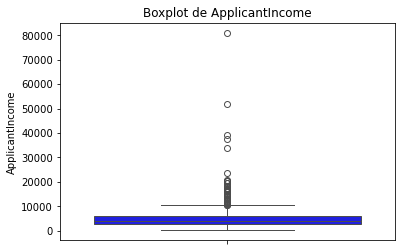

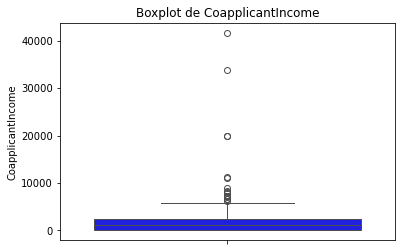

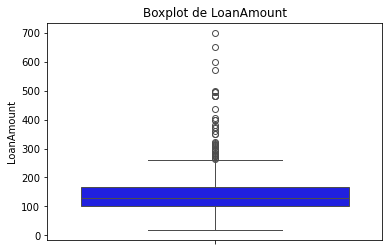

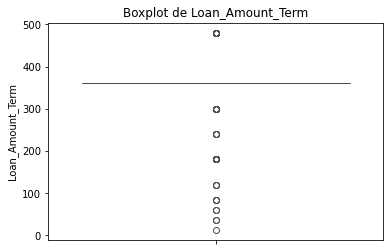

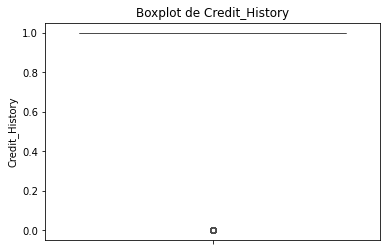

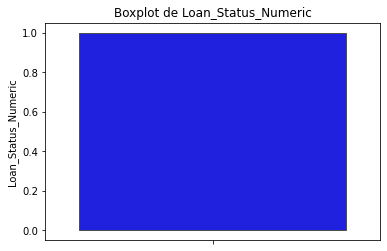

In [77]:
# Affichage des boxplots pour chaque variable numérique
num_cols = list(train1.select_dtypes(include=["float64", "int64"]).columns)

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train1, y=col, color="blue")
    plt.title(f"Boxplot de {col}")
    plt.ylabel(col)
    plt.show()

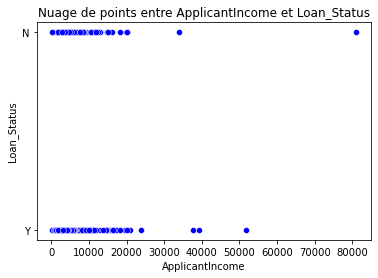

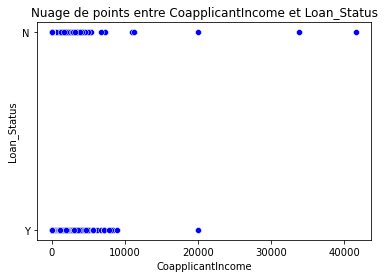

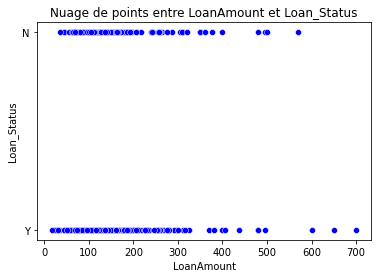

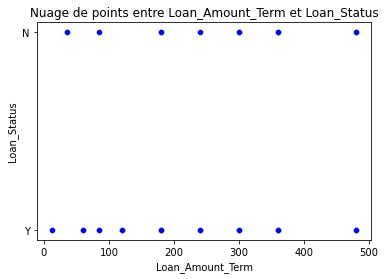

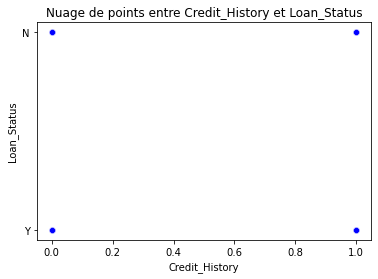

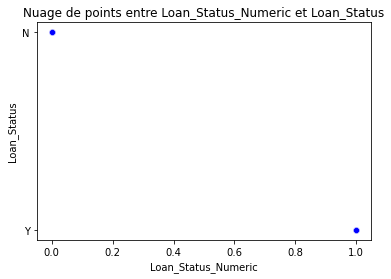

In [79]:
# Affichage des nuages de points entre la variable d'intérêt et toutes les autres variables
target_col = var_inte
num_cols = list(train1.select_dtypes(include=["float64", "int64"]).columns)


for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=train1, x=col, y=target_col, color="blue")
    plt.title(f"Nuage de points entre {col} et {target_col}")
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.show()

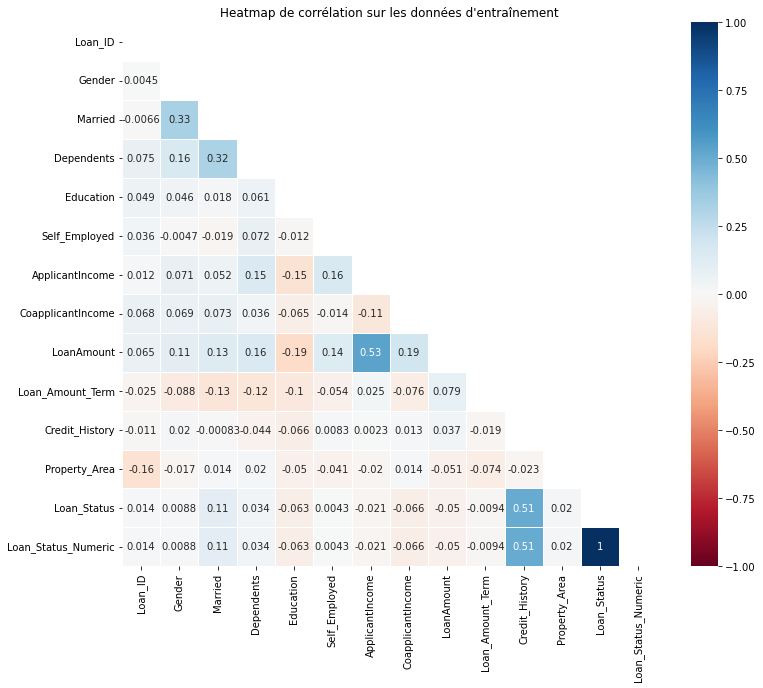

In [83]:
# Calcul de la matrice de corrélation sur les données d'entraînement
train2= train1
# Importer le module LabelEncoder de sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
le = LabelEncoder()

# Appliquer la méthode fit_transform() de LabelEncoder sur les variables catégorielles
for column in cat_vars:
    train2[column] = le.fit_transform(train2[column])
corr_matrix_train2 = train2.corr()



# Créer un masque pour masquer les valeurs en double
mask = np.triu(np.ones_like(corr_matrix_train2, dtype=bool))

# Créer la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_train2, 
            mask=mask,
            cmap='RdBu',
            annot=True,
            linewidths=0.5,
            vmin=-1, vmax=1)


# Ajouter un titre et des étiquettes
plt.title("Heatmap de corrélation sur les données d'entraînement")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()



In [85]:
seuil = 0.5
# Trouver les couples de variables fortement corrélés (|r| > seuil)
strongly_correlated_pairs = []
for i in range(len(corr_matrix_train2.columns)):
    for j in range(i+1, len(corr_matrix_train2.columns)):
        if abs(corr_matrix_train2.iloc[i, j]) > seuil:
            strongly_correlated_pairs.append((corr_matrix_train2.columns[i], corr_matrix_train2.columns[j]))

if strongly_correlated_pairs:
    print(f"Couples de variables :")
    for pair in strongly_correlated_pairs:
        print(f"- {pair[0]} et {pair[1]}")
else:
    print("Aucun couple de variables n'a été trouvé.")

Couples de variables :
- ApplicantIncome et LoanAmount
- Credit_History et Loan_Status
- Credit_History et Loan_Status_Numeric
- Loan_Status et Loan_Status_Numeric


### Selection des variables à partir de la ocrrélation de pearson

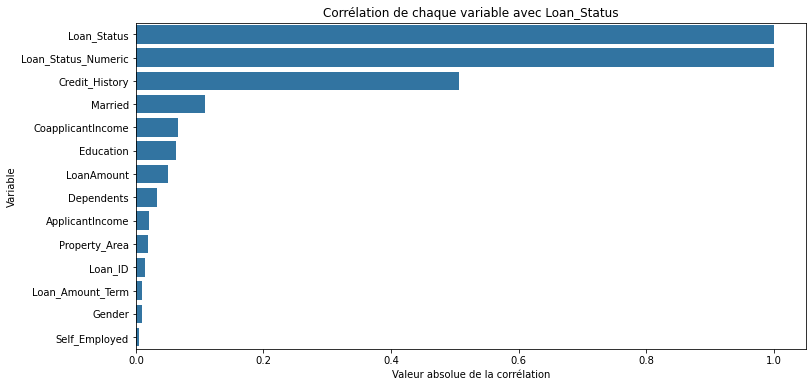

In [84]:

# Calcul de la corrélation entre chaque variable et la variable cible (en valeur absolue)
correlations = abs(train2.corr()[var_inte]).sort_values(ascending=False)

# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title(f"Corrélation de chaque variable avec {var_inte}")
plt.show()

In [115]:
#en prenant en compte les correlation entre les features
features_selected1 = ['Credit_History','Married']
features_selected2 = ['Credit_History','Married','CoapplicantIncome']
features_selected2 = ['Credit_History','Married','CoapplicantIncome',"Education","LoanAmount","Dependents"]



In [116]:

import statsmodels.api as sm
import pandas as pd


# Sélectionner les variables explicatives et la variable d'intérêt
X_selected = df_sans_NA[features_selected1]
y_selected = df_sans_NA[var_inte]

vars_selected =features_selected1


In [117]:
# Convertir les variables catégorielles en variables indicatrices (dummies)
#cat_vars_sans_var_inte_sel = [col for col in vars_selected if col != var_inte]
X_selected = pd.get_dummies(X_selected,drop_first=True)

# Ajouter une constante pour l'interception
X_selected = sm.add_constant(X_selected)

In [118]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'apprentissage et de test
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)





In [119]:

# Récupérer les noms des variables booléennes
bool_cols = X_train_selected.select_dtypes(include='bool').columns

print(bool_cols)




Index(['Married_Yes'], dtype='object')


In [120]:
X_train_selected

,const,Credit_History,Married_Yes
83,1.0,1.0,True
90,1.0,1.0,True
227,1.0,1.0,True
482,1.0,1.0,True
464,1.0,0.0,False
...,...,...,...
71,1.0,1.0,True
106,1.0,1.0,True
270,1.0,1.0,False
435,1.0,1.0,True


In [121]:
# Convertir les variables booléennes en entiers
for bool_col in bool_cols:
    X_train_selected[bool_col] = X_train_selected[bool_col].astype(int)


In [122]:
X_train_selected

,const,Credit_History,Married_Yes
83,1.0,1.0,1
90,1.0,1.0,1
227,1.0,1.0,1
482,1.0,1.0,1
464,1.0,0.0,0
...,...,...,...
71,1.0,1.0,1
106,1.0,1.0,1
270,1.0,1.0,0
435,1.0,1.0,1


In [123]:
#les données doivent etre de type numérique (int, float) et non de type objet
print(y_train_selected.dtype)


object


In [124]:
# Convertir y_train_selected en type bool
y_train_selected = y_train_selected.astype(bool)

In [125]:
print(X_train_selected.dtypes)

const             float64
Credit_History    float64
Married_Yes         int64
dtype: object


In [126]:
X_train_selected.isna().sum()

const             0
Credit_History    0
Married_Yes       0
dtype: int64

In [127]:
# Créer le modèle de régression logistique
logit_model = sm.Logit(y_train_selected, X_train_selected)

# Ajuster le modèle aux données d'apprentissage
result = logit_model.fit()

# Afficher le résumé des résultats de la régression
print(result.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  491
Model:                          Logit   Df Residuals:                      488
Method:                           MLE   Df Model:                            2
Date:                Tue, 04 Jun 2024   Pseudo R-squ.:                     inf
Time:                        08:48:53   Log-Likelihood:            -2.4687e-07
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             20.3246   4121.510      0.005      0.996   -8057.687    8098.336
Credit_History     2.0578   4096.677      0.001      

/home/ensai/.local/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/ensai/.local/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/ensai/.local/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/ensai/.local/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/hom

on a unn probleme de convergence donc je vais Utiliser une méthode de régularisation

In [114]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit
from sklearn.metrics import r2_score, mean_squared_error

# Obtention des prédictions et des métriques d'évaluation
y_train_pred = logit_model.predict(X_train_selected)
y_test_pred = logit_model.predict(X_test_selected)
r2_train = r2_score(y_train_selected, y_train_pred)
r2_test = r2_score(y_test_selected, y_test_pred)
mse_train = mean_squared_error(y_train_selected, y_train_pred)
mse_test = mean_squared_error(y_test_selected, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


# Construction du tableau de résultats
df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
})

print(df_metrics)


ValueError: shapes (491,4) and (491,4) not aligned: 4 (dim 1) != 491 (dim 0)

In [ ]:

# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(y_train_selected, y_train_pred, color='blue')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), color='red')
plt.show()



In [ ]:

from sklearn.metrics import roc_curve, auc
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(X_train_selected)
y_test_pred = result.predict(X_test_selected)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_selected, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test_selected, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)




In [ ]:
# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Prédire les classes sur la base de test
y_pred = result.predict(X_test_selected) > 0.5

# Générer le rapport de classification
report = classification_report(y_test_selected, y_pred)

# Afficher le rapport de classification
print(report)




In [ ]:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train_selected, y_pred)
print(confusion_matrix)

#### Selection des features :  méthodes de régularisation

In [131]:
#variable d'interet recodé
y_selected1 = df_sans_NA[var_inte]

# Créer un dictionnaire de correspondance pour transformer la colonne 'Loan_Status'
# Les valeurs 'Y' seront remplacées par 1 et les valeurs 'N' par 0
target_value = {'Y': 1, 'N': 0}
# Extraire la colonne 'Loan_Status' du dataframe 'df_sans_NA' et la stocker dans la variable 'target'
y_selected1= y_selected1.map(target_value)

y_selected1

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [134]:
# Supprimer la colonne 'Loan_Status' du dataframe 'df_sans_NA'
df_sans_NA_sans_var_inte = df_sans_NA.drop(var_inte, axis=1)



In [136]:
# Importer le module LabelEncoder de sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
le = LabelEncoder()

cat_vars= cat_vars.drop(var_inte)

# Appliquer la méthode fit_transform() de LabelEncoder sur les variables catégorielles
for column in cat_vars:
    df_sans_NA_sans_var_inte[column] = le.fit_transform(df_sans_NA_sans_var_inte[column])



In [138]:
# Séparer les variables catégorielles et numériques
X_cat = df_sans_NA_sans_var_inte[cat_vars]
X_num = df_sans_NA_sans_var_inte[num_vars]



In [140]:
# Créer la matrice X en concaténant les variables catégorielles et numériques
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Encoder les variables catégorielles avec OneHotEncoder
encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cat_vars)], remainder='passthrough')
X_selected1 = encoder.fit_transform(df_sans_NA_sans_var_inte)

In [141]:
X_selected1

<614x635 sparse matrix of type '<class 'numpy.float64'>'
	with 7420 stored elements in Compressed Sparse Row format>

In [142]:
"""
# Importer la classe StratifiedShuffleSplit depuis sklearn.model_selection
from sklearn.model_selection import StratifiedShuffleSplit

# Créer un objet StratifiedShuffleSplit avec 1 seul split, une taille de test de 0.2 et un random_state de 42
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Parcourir les index des ensembles d'entraînement et de test
for train, test in sss.split(X, y):
    # Extraire les données d'entraînement et de test à partir des index
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

"""

#alternative beaucoup utilisée

# Importer la fonction train_test_split depuis sklearn.model_selection
from sklearn.model_selection import train_test_split

# Diviser les données X et y en ensembles d'entraînement et de test
# avec une taille de test de 0.2 et un random_state de 42
X_train_selected1, X_test_selected1, y_train_selected1, y_test_selected1 = train_test_split(X_selected1, y_selected1, test_size=0.2, random_state=42)


In [144]:
print('X_train taille: ', X_train_selected1.shape)
print('X_test taille: ', X_test_selected1.shape)
print('y_train taille: ', y_train_selected1.shape)
print('y_test taille: ', y_test_selected1.shape)

X_train taille:  (491, 635)
X_test taille:  (123, 635)
y_train taille:  (491,)
y_test taille:  (123,)


In [164]:
#RIDGE
from sklearn.linear_model import RidgeCV
import numpy as np

# Créer et ajuster le modèle RidgeCV
alphas = np.linspace(0.01, 1, 100) # Liste des valeurs possibles pour le paramètre alpha
ridge_cv = RidgeCV(alphas=alphas, cv=7) # cv est le nombre de plis (folds) pour la validation croisée
ridge_cv.fit(X_train_selected1, y_train_selected1)

# Obtenir le meilleur paramètre alpha
best_alpha_ridge = ridge_cv.alpha_
print(f"Best alpha: {best_alpha_ridge}")


Best alpha: 0.01


In [165]:
from sklearn.linear_model import Ridge

# Entraîner le modèle Ridge final avec le meilleur alpha
ridge_final = Ridge(alpha=best_alpha_ridge)
ridge_final.fit(X_train_selected1, y_train_selected1)

Ridge(alpha=0.01)

In [159]:
# Faire des prédictions sur les données de test
y_pred_ridge_final = ridge_final.predict(X_test_selected1)

In [161]:

from sklearn.metrics import r2_score

r2_ridge_final = r2_score(y_test_selected1, y_pred_ridge_final)
print(f"R^2 score du modèle final: {r2_ridge_final:.2f}")

R^2 score du modèle final: 1.00


Un score R^2 de 1.00 est assez rare et indique généralement que le modèle a trop bien appris les données d'entraînement, au point de ne plus généraliser correctement sur de nouvelles données. Cela pourrait être un signe de surapprentissage (overfitting).

In [162]:
# Lasso

from sklearn.linear_model import LassoCV, Lasso

# Créer et ajuster le modèle LassoCV
alphas = [0.001, 1.0, 10.0, 100.0]


# Entraîner le modèle Lasso avec validation croisée pour trouver le meilleur alpha
lasso_cv = LassoCV(alphas=alphas, cv=7)
lasso_cv.fit(X_train_selected1, y_train_selected1)

# Récupérer le meilleur alpha
best_alpha_lasso = lasso_cv.alpha_
print(f"Best alpha: {best_alpha_lasso}")




Best alpha: 0.001


In [163]:
# Entraîner le modèle Lasso final avec le meilleur alpha
lasso_final = Lasso(alpha=best_alpha_lasso)
lasso_final.fit(X_train_selected1, y_train_selected1)

Lasso(alpha=0.001)

In [166]:
# Faire des prédictions sur les données de test
y_pred_lasso_final = lasso_final.predict(X_test_selected1)




In [167]:
from sklearn.metrics import r2_score

r2_lasso_final = r2_score(y_test_selected1, y_pred_ridge_final)
print(f"R^2 score du modèle final: {r2_lasso_final:.2f}")

R^2 score du modèle final: 1.00


In [168]:
# ElasticNet
from sklearn.linear_model import Lasso, LassoCV,RidgeCV,Ridge,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split,cross_val_score

# Créer un modèle de régression ElasticNet avec validation croisée de ElasticNetCV
model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=5)

# Ajuster le modèle aux données
model.fit(X_train_selected1, y_train_selected1)

# Trouver le meilleur alpha et le meilleur l1_ratio
best_alpha = model.alpha_
best_l1_ratio = model.l1_ratio_

# Imprimer le meilleur alpha et le meilleur l1_ratio
print("Meilleur alpha:", best_alpha)
print("Meilleur l1_ratio:", best_l1_ratio)


Meilleur alpha: 1e-05
Meilleur l1_ratio: 1.0


In [183]:
# Récupérer les noms des variables sélectionnées
coefs = model.coef_
selected_features = X_.columns[np.where(coefs != 0)[0]]

print("Variables utilisées par le modèle:")
print(selected_features)

IndexError: index 629 is out of bounds for axis 0 with size 629

In [178]:
# Récupérer les noms des features
feature_names = ['feature_' + str(i) for i in range(X_train_selected1.shape[1])]

# Récupérer les coefficients du modèle
coefs = model.coef_

# Trouver les indices des features sélectionnées
selected_idx = np.where(coefs != 0)[0]

# Récupérer les noms des features sélectionnées
selected_features = [feature_names[i] for i in selected_idx]

print("Features sélectionnées :")
print(selected_features)

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_66',
 'fea

# Résumé

In [169]:

# Créer des modèles de régression Ridge, Lasso et ElasticNet avec validation croisée
ridge_model = RidgeCV(alphas=np.logspace(-5, 5, 11), cv=5)
lasso_model = LassoCV(alphas=np.logspace(-5, 5, 11), cv=5)
enet_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=5)

# Ajuster les modèles aux données d'apprentissage
ridge_model.fit(X_train_selected1, y_train_selected1)
lasso_model.fit(X_train_selected1, y_train_selected1)
enet_model.fit(X_train_selected1, y_train_selected1)

# Prédire les valeurs pour les données d'apprentissage et de test
ridge_train_pred = ridge_model.predict(X_train_selected1)
ridge_test_pred = ridge_model.predict(X_test_selected1)
lasso_train_pred = lasso_model.predict(X_train_selected1)
lasso_test_pred = lasso_model.predict(X_test_selected1)
enet_train_pred = enet_model.predict(X_train_selected1)
enet_test_pred = enet_model.predict(X_test_selected1)

# Calculer le R2 et le RMSE pour les données d'apprentissage et de test
ridge_train_r2 = r2_score(y_train_selected1, ridge_train_pred)
ridge_test_r2 = r2_score(y_test_selected1, ridge_test_pred)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train_selected1, ridge_train_pred))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test_selected1, ridge_test_pred))
lasso_train_r2 = r2_score(y_train_selected1, lasso_train_pred)
lasso_test_r2 = r2_score(y_test_selected1, lasso_test_pred)
lasso_train_rmse = np.sqrt(mean_squared_error(y_train_selected1, lasso_train_pred))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test_selected1, lasso_test_pred))
enet_train_r2 = r2_score(y_train_selected1, enet_train_pred)
enet_test_r2 = r2_score(y_test_selected1, enet_test_pred)
enet_train_rmse = np.sqrt(mean_squared_error(y_train_selected1, enet_train_pred))
enet_test_rmse = np.sqrt(mean_squared_error(y_test_selected1, enet_test_pred))

In [171]:
data_metrics = {'Modèle': ['Ridge', 'Lasso', 'ElasticNet'],
        'R2 sur base train': [ridge_train_r2, lasso_train_r2, enet_train_r2],
'R2 sur base test': [ridge_test_r2, lasso_test_r2, enet_test_r2],
'RMSE sur base train': [ridge_train_rmse, lasso_train_rmse, enet_train_rmse],
'RMSE sur base test': [ridge_test_rmse, lasso_test_rmse, enet_test_rmse]}

df_metrics = pd.DataFrame(data_metrics)
df_metrics

,Modèle,R2 sur base train,R2 sur base test,RMSE sur base train,RMSE sur base test
0,Ridge,1.0,0.999867,0.000018,0.005491
1,Lasso,1.0,1.000000,0.000026,0.000025
2,ElasticNet,1.0,1.000000,0.000026,0.000025


In [ ]:
# On va appliquer tois algorithmes Logisitic Regression, KNN, DecisionTree
models={
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
}

# La fonction de précision
def accu(y_true,y_pred,retu=False):
  acc=accuracy_score(y_true,y_pred)
  if retu:
    return acc
  else:
    print(f'la precision du modèle est: {acc}')

#c'est la fonction d'application des modèles
def train_test_eval(models,X_train,y_train,X_test,y_test):
  for name,model in models.items():
    print(name,':')
    model.fit(X_train,y_train)
    accu(y_test,model.predict(X_test))
    print('-'*30)

train_test_eval(models,X_train,y_train,X_test,y_test)


LogisticRegression :
la precision du modèle est: 0.7967479674796748
------------------------------
KNeighborsClassifier :
la precision du modèle est: 0.6178861788617886
------------------------------
DecisionTreeClassifier :
la precision du modèle est: 0.7967479674796748
------------------------------


/home/ensai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Importer les bibliothèques nécessaires
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


seed = 42
# Définir les modèles
models = {
    'LogisticRegression': LogisticRegression(random_state= seed),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=seed),
    'RandomForestClassifier': RandomForestClassifier(random_state=seed)
}


# Fonction d'entraînement et d'évaluation
def entr_eval_model(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(f'{name} :')
        # Entraîner le modèle RandomForestClassifier sur les données d'entraînement
        rf_fitted = model.fit(X_train, y_train)
    
        # Évaluer les performances du modèle Random Forest sur les données de test
        rf_score = rf_fitted.score(X_test, y_test)
        print(f"Précision du modèle Random Forest : {rf_score:.3f}")

        print('-' * 30)





In [ ]:

# Évaluer tous les modèles
entr_eval_model(models, X_train, y_train, X_test, y_test)

LogisticRegression :
Précision du modèle Random Forest : 0.797
------------------------------
KNeighborsClassifier :
Précision du modèle Random Forest : 0.618
------------------------------
DecisionTreeClassifier :
Précision du modèle Random Forest : 0.797
------------------------------
RandomForestClassifier :
Précision du modèle Random Forest : 0.780
------------------------------


/home/ensai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report
# Fonction d'entraînement et d'évaluation
def report_model(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        
        # Entraîner le modèle RandomForestClassifier sur les données d'entraînement
        rf_fitted = model.fit(X_train, y_train)
        # Générer un rapport de classification détaillé
        report = classification_report(y_test, rf_fitted.predict(X_test))
        print(f'Rapport de classification du model {name} :')
        print(report)
        print('-' * 30)





In [ ]:
report_model(models, X_train, y_train, X_test, y_test)

Rapport de classification du model LogisticRegression :
              precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
           1       0.77      0.99      0.86        80

    accuracy                           0.80       123
   macro avg       0.86      0.71      0.73       123
weighted avg       0.83      0.80      0.77       123

------------------------------
Rapport de classification du model KNeighborsClassifier :
              precision    recall  f1-score   support

           0       0.36      0.12      0.18        43
           1       0.65      0.89      0.75        80

    accuracy                           0.62       123
   macro avg       0.50      0.50      0.46       123
weighted avg       0.55      0.62      0.55       123

------------------------------
Rapport de classification du model DecisionTreeClassifier :
              precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
 

/home/ensai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Réalisation de la validation croisée
from sklearn.model_selection import cross_val_score
from colorama import Fore, Style

# Fonction d'entraînement et d'évaluation
def val_cross(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        
        # Entraîner le modèle RandomForestClassifier sur les données d'entraînement
        rf_fitted = model.fit(X_train, y_train)
        
        score = cross_val_score(rf_fitted, X_train, y_train, cv=3)
        print()
        print(f"Validation croisée du model {Fore.YELLOW}{name} :{Style.RESET_ALL}")
        # Affichage des scores individuels de chaque pli
        print(f"Scores de chaque pli : {Fore.GREEN}{score}{Style.RESET_ALL}")
        print()
        # Calcul de la moyenne des scores
        score_moyen = score.mean()
        print(f"Score moyen : {Fore.BLUE}{score_moyen}{Style.RESET_ALL}")
        if score_moyen > 0.8:
            print(f"{Fore.GREEN}Le modèle a de très bonnes performances.{Style.RESET_ALL}")
        elif score_moyen > 0.7:
            print(f"{Fore.GREEN}Le modèle a de bonnes performances.{Style.RESET_ALL}")
        else:
            print(f"{Fore.RED}Les performances du modèle sont moyennes.{Style.RESET_ALL}")
        print()
        
        # Calcul de la médiane des scores
        score_median = np.median(score)
        print(f"Médiane des scores : {Fore.BLUE}{score_median}{Style.RESET_ALL}")
        if score_median< 0.05:
            print(f"{Fore.GREEN}Le modèle a des performances stables d'un pli à l'autre.{Style.RESET_ALL}")
        elif score_median < 0.1:
            print(f"{Fore.GREEN}Le modèle a une variabilité modérée des performances.{Style.RESET_ALL}")
        else:
            print(f"{Fore.RED}Le modèle a une forte variabilité des performances d'un pli à l'autre.{Style.RESET_ALL}")
        
         

        print('-' * 30)



In [ ]:
val_cross(models, X_train, y_train, X_test, y_test)

/home/ensai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ensai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Validation croisée du model LogisticRegression :
Scores de chaque pli : [0.73170732 0.78658537 0.79141104]

Score moyen : 0.7699012419572049
Le modèle a de bonnes performances.

Médiane des scores : 0.7865853658536586
Le modèle a une forte variabilité des performances d'un pli à l'autre.
------------------------------

Validation croisée du model KNeighborsClassifier :
Scores de chaque pli : [0.64634146 0.67682927 0.64417178]

Score moyen : 0.6557808369494738
Les performances du modèle sont moyennes.

Médiane des scores : 0.6463414634146342
Le modèle a une forte variabilité des performances d'un pli à l'autre.
------------------------------

Validation croisée du model DecisionTreeClassifier :
Scores de chaque pli : [0.80487805 0.80487805 0.80368098]

Score moyen : 0.8044790263853558
Le modèle a de très bonnes performances.

Médiane des scores : 0.8048780487804879
Le modèle a une forte variabilité des performances d'un pli à l'autre.
------------------------------

Validation croisée 

### SElection de variables 

##### Traitement pour eviter l'overfitting ou underfitting

In [ ]:
# Copyright 2024 ensai
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     https://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.



#### Ridge , Lasso , ElasticNet ...


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Calcul de la variance de chaque feature
feature_variances = X.var(axis=0)

# Sélection des features avec une variance supérieure à 0.2
selector = VarianceThreshold(threshold=0.2)
X_transformed = selector.fit_transform(X)

# Obtention des noms des features sélectionnées
selected_features = selector.get_feature_names_out()
selected_features



array(['Loan_ID', 'Married', 'Dependents', 'Property_Area',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'], dtype=object)

Le choix du modèle de sélection de variables pertinentes dépend de plusieurs facteurs, notamment la taille de votre jeu de données, le nombre de features, le type de problème (régression, classification, etc.) et vos objectifs spécifiques. Voici quelques lignes directrices pour vous aider à choisir le bon modèle :

1. **Régression linéaire / Logistique** :
   - **RFE (Recursive Feature Elimination)** : Convient bien pour les problèmes de régression linéaire ou de régression logistique, surtout lorsque le nombre de features est élevé. RFE supprime itérativement les features les moins importantes.
   - **RFECV (Recursive Feature Elimination with Cross-Validation)** : Similaire à RFE, mais utilise la validation croisée pour déterminer le bon nombre de features à conserver.

2. **Arbres de décision / Forêts aléatoires** :
   - **Importance des features** : Ces modèles fournissent une mesure de l'importance de chaque feature, ce qui permet de sélectionner les plus pertinentes.
   - **Sélection récursive** : Vous pouvez également utiliser RFE ou RFECV avec ces modèles pour une sélection plus fine.

3. **Problèmes avec peu de données** :
   - **Sélection par test statistique** : Dans le cas où vous avez peu de données, vous pouvez utiliser des tests statistiques comme ANOVA, Pearson, etc. pour évaluer la corrélation entre chaque feature et la variable cible.
   - **Régularisation (Lasso, Ridge)** : Ces méthodes de régularisation peuvent aider à effectuer une sélection de variables lorsque le nombre de features est élevé par rapport au nombre d'observations.

4. **Problèmes avec de nombreuses features** :
   - **Sélection par filtre** : Des méthodes comme la sélection par score de corrélation, le test du Chi2 ou l'information mutuelle peuvent être utiles pour effectuer une première sélection rapide des features les plus pertinentes.
   - **Sélection par enveloppe** : Des méthodes comme RFE ou RFECV sont particulièrement adaptées pour les problèmes avec de nombreuses features, car elles évaluent l'impact de chaque feature sur les performances du modèle.



##### Exemples

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Création du modèle de sélection de features
model = RandomForestClassifier()
selector = SelectFromModel(model, prefit=False)

# Sélection des features
X_transformed = selector.fit_transform(X, y)

# Obtention des noms des features sélectionnées
selected_features = X.columns[selector.get_support()]
selected_features

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import RFE , RFECV
from sklearn.linear_model import LogisticRegression

# Création du modèle de base
model = LogisticRegression()

# Utilisation de RFE avec step=1 et n_features_to_select=2
rfe = RFE(model, n_features_to_select=5, step=1)
rfe.fit(X, y)

# Récupération des features sélectionnées
selected_features_rfe = X.columns[rfe.support_]
print("Features sélectionnées avec RFE :", selected_features_rfe)

# Affichage du classement des features
print("Classement des features :")
for i, rank in enumerate(rfe.ranking_):
    print(f"{X.columns[i]}: Rang {rank}")
'''
# Utilisation de RFECV avec step=1 et n_features_to_select=2
rfecv = RFECV(model, cv=5, scoring='accuracy', step=1, n_features_to_select=2)
rfecv.fit(X, y)
selected_features_rfecv = X.columns[rfecv.support_]
print("Features sélectionnées avec RFECV :", selected_features_rfecv)

'''


Features sélectionnées avec RFE : Index(['Gender', 'Married', 'Education', 'Property_Area', 'Credit_History'], dtype='object')
Classement des features :
Loan_ID: Rang 6
Gender: Rang 1
Married: Rang 1
Dependents: Rang 3
Education: Rang 1
Self_Employed: Rang 2
Property_Area: Rang 1
ApplicantIncome: Rang 7
CoapplicantIncome: Rang 8
LoanAmount: Rang 5
Loan_Amount_Term: Rang 4
Credit_History: Rang 1


/home/ensai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ensai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

'\n# Utilisation de RFECV avec step=1 et n_features_to_select=2\nrfecv = RFECV(model, cv=5, scoring=\'accuracy\', step=1, n_features_to_select=2)\nrfecv.fit(X, y)\nselected_features_rfecv = X.columns[rfecv.support_]\nprint("Features sélectionnées avec RFECV :", selected_features_rfecv)\n\n'

Avec 12 features, on peut considérer avoir un nombre de données relativement restreint, surtout si certaines features sont très corrélées ou ont peu d'impact.

***Sélection de features par test statistique***

Étant donné que vous avez un mélange de variables catégorielles et numériques, vous pouvez utiliser des tests statistiques comme ANOVA, test-t, test du Chi2 pour évaluer la significativité de chaque feature par rapport à la variable cible.
Cela vous permettra d'identifier les features les plus corrélées à la variable de sortie.

    - ANOVA (Analyse de la variance) :
    L'ANOVA est utilisée lorsque la variable cible est numérique.
    Dans votre cas, la variable cible est catégorielle, donc l'ANOVA ne serait pas le test approprié.

    - Test-t :
    Le test-t permet de comparer les moyennes de deux groupes.

    - Test du Chi2 de Pearson :
    Le test du Chi2 de Pearson est spécifiquement conçu pour évaluer l'indépendance entre deux variables catégorielles.
    C'est donc le test le plus adapté pour votre problème, où vous avez une variable cible catégorielle et des features potentiellement catégorielles.

***Sélection de features par modèle***
Vous pouvez ensuite utiliser des méthodes de sélection de features basées sur des modèles, comme la Régression Linéaire avec Régularisation (Lasso, Ridge) ou la Récursive Feature 

***Elimination (RFE).***
Ces méthodes évaluent l'importance relative de chaque feature dans le modèle et permettent de sélectionner les plus pertinentes.

***Validation croisée***
Quel que soit l'approche choisie, n'oubliez pas d'utiliser la validation croisée pour évaluer la performance de vos modèles de sélection de features.
Cela vous aidera à estimer de manière fiable les performances de votre modèle final sur de nouvelles données.


#### Remarques 
 Lasso effectue une sélection de features en forçant certains coefficients à 0, tandis que Ridge réduit l'amplitude des coefficients sans les forcer à 0.

 La différence principale entre les méthodes de régularisation Lasso (Least Absolute Shrinkage and Selection Operator) et Ridge (Tikhonov regularization) réside dans leur manière de pénaliser les coefficients du modèle de régression linéaire.

Voici les principales différences entre Lasso et Ridge :

***Pénalisation des coefficients :***

Lasso utilise une pénalité L1 (valeur absolue des coefficients), ce qui a tendance à forcer certains coefficients à 0, réalisant ainsi une sélection de features.
Ridge utilise une pénalité L2 (carré des coefficients), ce qui a tendance à réduire l'amplitude des coefficients sans pour autant les forcer à 0.


***Sparsité des coefficients :***

Lasso produit un modèle plus parcimonieux (sparse), avec moins de features non nulles.
Ridge produit un modèle avec des coefficients plus petits, mais sans forcer certains à 0.


***Sélection de features :***

Lasso effectue une sélection de features en forçant certains coefficients à 0.
Ridge ne fait pas de sélection de features, mais réduit l'importance relative des features.


***Performances sur des jeux de données de grande dimension :***

Lasso est plus performant que Ridge lorsque le nombre de features est important par rapport au nombre d'observations, car il effectue une sélection de features.
Ridge est plus performant lorsque le nombre de features est faible par rapport au nombre d'observations, car il préserve mieux l'information contenue dans les features.

/home/ensai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ensai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

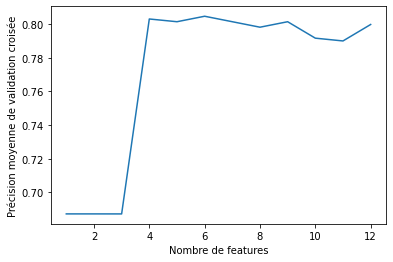

Nombre optimal de features : 6


In [ ]:
# nombre optimal de features

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Définition du modèle de machine learning (ici, Régression logistique car variable cible est categorielle)
model = LogisticRegression()

# Sélection du nombre optimal de features par validation croisée
max_features = X.shape[1]
cv_scores = []

for k in range(1, max_features+1):
    selector = SelectKBest(chi2, k=k)
    X_new = selector.fit_transform(X, y)
    scores = cross_val_score(model, X_new, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Affichage des résultats
import matplotlib.pyplot as plt
plt.plot(range(1, max_features+1), cv_scores)
plt.xlabel('Nombre de features')
plt.ylabel('Précision moyenne de validation croisée')
plt.show()

# Sélection du nombre optimal de features
optimal_num_features = cv_scores.index(max(cv_scores)) + 1
print(f"Nombre optimal de features : {optimal_num_features}")

In [ ]:
k_op =3

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Sélection de features avec SelectKBest
selector = SelectKBest(chi2, k=k_op)
X_new = selector.fit_transform(X, y)

# Récupération des noms des features sélectionnées
selected_features = X.columns[selector.get_support()]

# Affichage des scores de sélection de features
feature_scores = selector.scores_

print("Scores de sélection de features par SelectKBest:")
for i, feature in enumerate(X.columns):
    print(f"Feature {feature}: score = {feature_scores[i]}")

print(f"\nLes 6 meilleures features sont : {', '.join(selected_features)}")

Scores de sélection de features par SelectKBest:
Feature Loan_ID: score = 8.723627293320714
Feature Gender: score = 0.036234308421920616
Feature Married: score = 1.7824249851280132
Feature Dependents: score = 0.08595275873631475
Feature Education: score = 3.540502463983401
Feature Self_Employed: score = 0.007284803298269976
Feature Property_Area: score = 0.37783746382256855
Feature ApplicantIncome: score = 93.90496351303446
Feature CoapplicantIncome: score = 11342.04160335895
Feature LoanAmount: score = 47.992009632104086
Feature Loan_Amount_Term: score = 3.778553724653287
Feature Credit_History: score = 25.92145260205156

Les 6 meilleures features sont : ApplicantIncome, CoapplicantIncome, LoanAmount


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFECV

# Définition du modèle Lasso
lasso = Lasso(alpha=0.1, random_state=42)

# Sélection de features par Recursive Feature Elimination avec Validation Croisée (RFECV)
rfe_lasso = RFECV(estimator=lasso, min_features_to_select=k_op, step=1, cv=5)
rfe_lasso.fit(X, y)

# Affichage des scores de sélection de features
feature_ranks_lasso = rfe_lasso.ranking_
selected_features_lasso = X.columns[rfe_lasso.get_support()]

print("Scores de sélection de features par Lasso + RFECV:")
for i, feature in enumerate(X.columns):
    print(f"Feature {feature}: rank = {feature_ranks_lasso[i]}")

print(f"\nLes 6 meilleures features sont : {', '.join(selected_features_lasso)}")


Scores de sélection de features par Lasso + RFECV:
Feature Loan_ID: rank = 1
Feature Gender: rank = 10
Feature Married: rank = 9
Feature Dependents: rank = 8
Feature Education: rank = 7
Feature Self_Employed: rank = 6
Feature Property_Area: rank = 5
Feature ApplicantIncome: rank = 3
Feature CoapplicantIncome: rank = 2
Feature LoanAmount: rank = 1
Feature Loan_Amount_Term: rank = 1
Feature Credit_History: rank = 4

Les 6 meilleures features sont : Loan_ID, LoanAmount, Loan_Amount_Term


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFECV

# Définition du modèle Ridge
ridge = Ridge(alpha=0.1, random_state=42)

# Sélection de features par Recursive Feature Elimination avec Validation Croisée (RFECV)
rfe_ridge = RFECV(estimator=ridge, min_features_to_select=k_op, step=1, cv=5)
rfe_ridge.fit(X, y)

# Affichage des scores de sélection de features
feature_ranks_ridge = rfe_ridge.ranking_
selected_features_ridge = X.columns[rfe_ridge.get_support()]

print("Scores de sélection de features par Ridge + RFECV:")
for i, feature in enumerate(X.columns):
    print(f"Feature {feature}: rank = {feature_ranks_ridge[i]}")

print(f"\nLes  meilleures features sont : {', '.join(selected_features_ridge)}")


Scores de sélection de features par Ridge + RFECV:
Feature Loan_ID: rank = 7
Feature Gender: rank = 2
Feature Married: rank = 1
Feature Dependents: rank = 5
Feature Education: rank = 1
Feature Self_Employed: rank = 4
Feature Property_Area: rank = 3
Feature ApplicantIncome: rank = 10
Feature CoapplicantIncome: rank = 9
Feature LoanAmount: rank = 6
Feature Loan_Amount_Term: rank = 8
Feature Credit_History: rank = 1

Les  meilleures features sont : Married, Education, Credit_History


##### Remarques 

La validation croisée divise le jeu de données en plusieurs sous-ensembles (folds). Le modèle est entraîné sur tous les folds sauf un, qui est utilisé pour l'évaluation. Ce processus est répété itérativement, en utilisant chaque fold comme ensemble de validation. La performance finale du modèle est la moyenne des performances sur tous les folds.

Cela permet d'obtenir une estimation robuste de la performance du modèle et de détecter le sur-apprentissage.

Ainsi, l'utilisation de la validation croisée dans ce contexte de sélection de features par RFECV avec Lasso ou Ridge permet :

D'obtenir une sélection de features plus robuste et généralisable,

De déterminer de manière plus fiable le nombre optimal de features à conserver,

D'éviter les problèmes de sur-apprentissage liés à la sélection de features.

***Évaluation de la pertinence des features:***

La validation croisée permet d'évaluer de manière robuste la pertinence des features sélectionnées par RFECV.
En utilisant plusieurs folds de validation croisée (ici 5 folds), on peut obtenir une estimation plus fiable de la qualité de la sélection de features, en évitant le biais lié à un seul découpage du jeu de données.

***Réglage du nombre optimal de features:***

La méthode RFECV utilise la validation croisée pour déterminer le nombre optimal de features à conserver.
En spécifiant min_features_to_select=6, on demande à RFECV de sélectionner au minimum 6 features. Mais le nombre final de features sélectionnées peut être supérieur, en fonction de ce que la validation croisée indique comme étant optimal.

après avoir appliqué RFECV avec Lasso et Ridge séparément, on obtient des ensembles de features différents, il y a plusieurs options possibles pour choisir les features finales à utiliser dans votre modèle .



In [ ]:
# Évaluation comparative des modèles

import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


# Évaluation du modèle Ridge avec features sélectionnées par Ridge + RFECV
ridge_ridge = Ridge(alpha=0.1)
ridge_ridge.fit(X_train[selected_features_ridge], y_train)
ridge_ridge_train_score = r2_score(y_train, ridge_ridge.predict(X_train[selected_features_ridge]))
ridge_ridge_test_score = r2_score(y_test, ridge_ridge.predict(X_test[selected_features_ridge]))
ridge_ridge_mse = mean_squared_error(y_test, ridge_ridge.predict(X_test[selected_features_ridge]))
print("Modèle Ridge avec features sélectionnées par Ridge + RFECV:")
print(f"R² d'entraînement: {ridge_ridge_train_score:.2f}")
print(f"R² de test: {ridge_ridge_test_score:.2f}")
print(f"MSE de test: {ridge_ridge_mse:.2f}")

# Évaluation du modèle Lasso avec features sélectionnées par Lasso + RFECV
lasso_lasso = Lasso(alpha=0.1)
lasso_lasso.fit(X_train[selected_features_lasso], y_train)
lasso_lasso_train_score = r2_score(y_train, lasso_lasso.predict(X_train[selected_features_lasso]))
lasso_lasso_test_score = r2_score(y_test, lasso_lasso.predict(X_test[selected_features_lasso]))
lasso_lasso_mse = mean_squared_error(y_test, lasso_lasso.predict(X_test[selected_features_lasso]))
print("\nModèle Lasso avec features sélectionnées par Lasso + RFECV:")
print(f"R² d'entraînement: {lasso_lasso_train_score:.2f}")
print(f"R² de test: {lasso_lasso_test_score:.2f}")
print(f"MSE de test: {lasso_lasso_mse:.2f}")


# Analyse des résultats
if ridge_ridge_test_score > lasso_lasso_test_score:
    print("\nLe modèle Ridge avec les features sélectionnées par Ridge + RFECV a de meilleures performances.")
else:
    print("\nLe modèle Lasso avec les features sélectionnées par Lasso + RFECV a de meilleures performances.")

Modèle Ridge avec features sélectionnées par Ridge + RFECV:
R² d'entraînement: 0.27
R² de test: 0.29
MSE de test: 0.16

Modèle Lasso avec features sélectionnées par Lasso + RFECV:
R² d'entraînement: 0.00
R² de test: -0.01
MSE de test: 0.23

Le modèle Ridge avec les features sélectionnées par Ridge + RFECV a de meilleures performances.


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge, Lasso
import pandas as pd

# Sélection de features par Ridge + RFECV
ridge = Ridge(alpha=0.1, random_state=42)
rfe_ridge = RFECV(estimator=ridge, min_features_to_select=k_op, step=1, cv=5)
rfe_ridge.fit(X_train, y_train)

feature_ranks_ridge = rfe_ridge.ranking_
selected_features_ridge = X.columns[rfe_ridge.get_support()]

# Sélection de features par Lasso + RFECV
lasso = Lasso(alpha=0.1, random_state=42)
rfe_lasso = RFECV(estimator=lasso, min_features_to_select=k_op, step=1, cv=5)
rfe_lasso.fit(X_train, y_train)

feature_ranks_lasso = rfe_lasso.ranking_
selected_features_lasso = X.columns[rfe_lasso.get_support()]


# Calcul du rang moyen pour chaque feature
mean_ranking_lasso_ridge = (pd.Series(feature_ranks_lasso) + pd.Series(feature_ranks_ridge)) / 2
mean_ranking_lasso_ridge_sorted = mean_ranking_lasso_ridge.sort_values()

# Sélection des meilleures features
list_index_rank_features_all_lasso_ridge = mean_ranking_lasso_ridge_sorted.index.tolist()
rank_features_all_lasso_ridge = mean_ranking_lasso_ridge_sorted.tolist()
rank_best_features_lasso_ridge = mean_ranking_lasso_ridge_sorted.head(k_op).index.tolist()



selected_best_features_lasso_ridge = X.columns[rank_best_features_lasso_ridge]
features_sorted_lasso_ridge = X.columns[list_index_rank_features_all_lasso_ridge]


print("rang moyen de sélection de chaque  features:")
for i, feature in enumerate(features_sorted_lasso_ridge):
    print(f"Feature {feature}: rang moyen = {rank_features_all_lasso_ridge[i]}")

print(f"\nLes  meilleures features sont : {', '.join(selected_best_features_lasso_ridge)}")

rang moyen de sélection de chaque  features:
Feature Credit_History: rang moyen = 2.5
Feature LoanAmount: rang moyen = 3.5
Feature Property_Area: rang moyen = 4.0
Feature Loan_Amount_Term: rang moyen = 4.0
Feature Loan_ID: rang moyen = 4.5
Feature Education: rang moyen = 4.5
Feature Married: rang moyen = 5.0
Feature Gender: rang moyen = 5.5
Feature Self_Employed: rang moyen = 5.5
Feature CoapplicantIncome: rang moyen = 5.5
Feature Dependents: rang moyen = 6.0
Feature ApplicantIncome: rang moyen = 6.5

Les  meilleures features sont : Credit_History, LoanAmount, Property_Area


In [ ]:
"""
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge, Lasso

# Sélection de features par Ridge + RFECV
ridge = Ridge(alpha=0.1, random_state=42)
rfe_ridge = RFECV(estimator=ridge, min_features_to_select=6, step=1, cv=5)
rfe_ridge.fit(X_train, y_train)

# Sélection de features par Lasso + RFECV
lasso = Lasso(alpha=0.1, random_state=42)
rfe_lasso = RFECV(estimator=lasso, min_features_to_select=6, step=1, cv=5)
rfe_lasso.fit(X_train, y_train)

# Combinaison des résultats des deux méthodes
ridge_ranking = rfe_ridge.ranking_
lasso_ranking = rfe_lasso.ranking_

# Sélection des meilleures features
best_features = []
for i, (ridge_rank, lasso_rank) in enumerate(zip(ridge_ranking, lasso_ranking)):
    if ridge_rank == 1 and lasso_rank == 1:
        best_features.append(X_train.columns[i])

print("Meilleures features :")
for feature in best_features:
    print(f"- {feature}")
    
"""

Meilleures features :
- Credit_History


si on a  pas de corrélation élevée entre les features sélectionnées, on peut les utiliser pour entraîner votre modèle final.

Examinez la matrice de corrélation entre les features pour identifier celles qui sont fortement corrélées entre elles. Cela vous aidera à éliminer les features redondantes.

Heatmap avec dataframe 


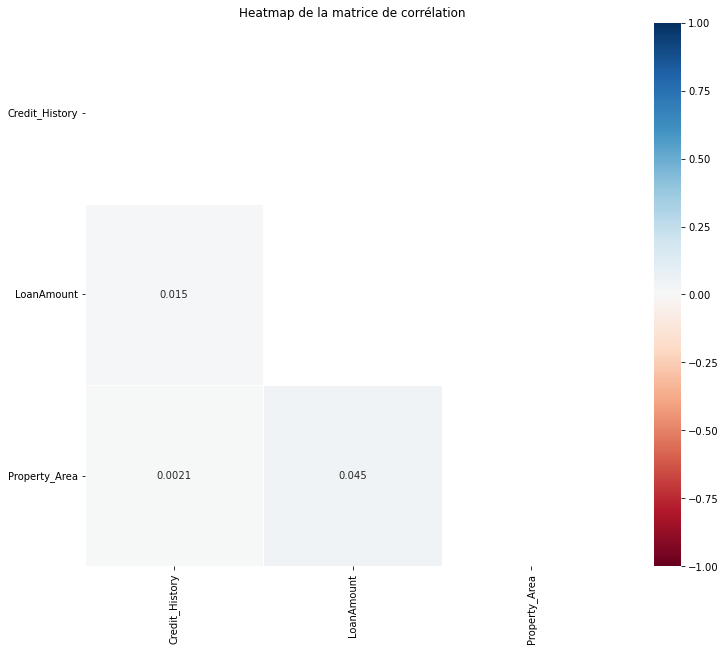

In [ ]:
# Vérification de la corrélation entre les features sélectionnées
corr_matrix = X[selected_best_features_lasso_ridge].corr().abs()

# Créer un masque pour masquer les valeurs en double
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

print(f"Heatmap avec dataframe ")
# Créer la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            mask=mask,
            cmap='RdBu',
            annot=True,
            linewidths=0.5,
            vmin=-1, vmax=1)

# Ajouter un titre et des étiquettes
plt.title('Heatmap de la matrice de corrélation')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()



In [ ]:

# Identifier les features fortement corrélées (seuil à 0.7)
high_corr_matrix = corr_matrix[corr_matrix > 0.7]

if not high_corr_matrix.empty:
    print("Les features suivantes sont fortement corrélées (|r| > 0.7):")
    print(high_corr_matrix)

    # Éliminer les features redondantes
    features_to_keep = []
    for feature in selected_best_features_lasso_ridge:
        if feature not in high_corr_matrix.index.tolist() and feature not in high_corr_matrix.columns.tolist():
            features_to_keep.append(feature)

    print(f"Les features sélectionnées après élimination des redondances : {', '.join(features_to_keep)}")
else:
    print("Les features sélectionnées ne sont pas fortement corrélées entre elles.")
    print("Vous pouvez utiliser ces features pour entraîner votre modèle final.")





Les features suivantes sont fortement corrélées (|r| > 0.7):
                  Credit_History  Property_Area  LoanAmount  Self_Employed  \
Credit_History               1.0            NaN         NaN            NaN   
Property_Area                NaN            1.0         NaN            NaN   
LoanAmount                   NaN            NaN         1.0            NaN   
Self_Employed                NaN            NaN         NaN            1.0   
Loan_Amount_Term             NaN            NaN         NaN            NaN   
Loan_ID                      NaN            NaN         NaN            NaN   

                  Loan_Amount_Term  Loan_ID  
Credit_History                 NaN      NaN  
Property_Area                  NaN      NaN  
LoanAmount                     NaN      NaN  
Self_Employed                  NaN      NaN  
Loan_Amount_Term               1.0      NaN  
Loan_ID                        NaN      1.0  
Les features sélectionnées après élimination des redondances : 


In [ ]:
# Copyright 2024 ensai
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     https://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.



##### utilisation des features selectionnées

In [ ]:
#liste_final_feature=selected_best_features_lasso_ridge

liste_final_feature=['Credit_History','Married','CoapplicantIncome']

In [ ]:
liste_final_feature

['Credit_History', 'Married', 'CoapplicantIncome']

In [ ]:
X_with_best_features= X[liste_final_feature]
X_with_best_features


,Credit_History,Married,CoapplicantIncome
0,1.0,0,0.0
1,1.0,1,1508.0
2,1.0,1,0.0
3,1.0,1,2358.0
4,1.0,0,0.0
...,...,...,...
609,1.0,0,0.0
610,1.0,1,0.0
611,1.0,1,240.0
612,1.0,1,0.0


In [ ]:
# Importer la fonction train_test_split depuis sklearn.model_selection
from sklearn.model_selection import train_test_split

# Diviser les données X et y en ensembles d'entraînement et de test
# avec une taille de test de 0.2 et un random_state de 42
X_train_L_R, X_test_L_R, y_train_L_R, y_test_L_R = train_test_split(X_with_best_features, y, test_size=0.2, random_state=42)




In [ ]:
print('X_train taille: ', X_train_L_R.shape)
print('X_test taille: ', X_test_L_R.shape)
print('y_train taille: ', y_train_L_R.shape)
print('y_test taille: ', y_test_L_R.shape)





X_train taille:  (491, 3)
X_test taille:  (123, 3)
y_train taille:  (491,)
y_test taille:  (123,)


In [ ]:
entr_eval_model(models, X_train, y_train, X_test, y_test)



LogisticRegression :
Précision du modèle Random Forest : 0.797
------------------------------
KNeighborsClassifier :
Précision du modèle Random Forest : 0.618
------------------------------
DecisionTreeClassifier :
Précision du modèle Random Forest : 0.797
------------------------------
RandomForestClassifier :
Précision du modèle Random Forest : 0.780
------------------------------


/home/ensai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
report_model(models, X_train, y_train, X_test, y_test)



Rapport de classification du model LogisticRegression :
              precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
           1       0.77      0.99      0.86        80

    accuracy                           0.80       123
   macro avg       0.86      0.71      0.73       123
weighted avg       0.83      0.80      0.77       123

------------------------------
Rapport de classification du model KNeighborsClassifier :
              precision    recall  f1-score   support

           0       0.36      0.12      0.18        43
           1       0.65      0.89      0.75        80

    accuracy                           0.62       123
   macro avg       0.50      0.50      0.46       123
weighted avg       0.55      0.62      0.55       123

------------------------------
Rapport de classification du model DecisionTreeClassifier :
              precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
 

/home/ensai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
val_cross(models, X_train, y_train, X_test, y_test)

/home/ensai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ensai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Validation croisée du model LogisticRegression :
Scores de chaque pli : [0.73170732 0.78658537 0.79141104]

Score moyen : 0.7699012419572049
Le modèle a de bonnes performances.

Médiane des scores : 0.7865853658536586
Le modèle a une forte variabilité des performances d'un pli à l'autre.
------------------------------

Validation croisée du model KNeighborsClassifier :
Scores de chaque pli : [0.64634146 0.67682927 0.64417178]

Score moyen : 0.6557808369494738
Les performances du modèle sont moyennes.

Médiane des scores : 0.6463414634146342
Le modèle a une forte variabilité des performances d'un pli à l'autre.
------------------------------

Validation croisée du model DecisionTreeClassifier :
Scores de chaque pli : [0.80487805 0.80487805 0.80368098]

Score moyen : 0.8044790263853558
Le modèle a de très bonnes performances.

Médiane des scores : 0.8048780487804879
Le modèle a une forte variabilité des performances d'un pli à l'autre.
------------------------------

Validation croisée 

In [ ]:
# Copyright 2024 ensai
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     https://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.



In [ ]:
# Copyright 2024 ensai
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     https://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.



In [ ]:
X_2=X[['Credit_History','Married','CoapplicantIncome']]

In [ ]:
# Diviser la base de données en une base de données test et d'entrainement
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X_2,y):
  X_train,X_test=X_2.iloc[train],X_2.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]

print('X_train taille: ', X_train.shape)
print('X_test taille: ', X_test.shape)
print('y_train taille: ', y_train.shape)
print('y_test taille: ', y_test.shape)

X_train taille:  (491, 3)
X_test taille:  (123, 3)
y_train taille:  (491,)
y_test taille:  (123,)


In [ ]:
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la precision du modèle est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
la precision du modèle est: 0.6991869918699187
------------------------------
DecisionTreeClassifier :
la precision du modèle est: 0.8455284552845529
------------------------------


In [ ]:
# Appliquer la regression logisitique sur notre base de donnée
Classifier=LogisticRegression()
Classifier.fit(X_2,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Enregistrer le modèle
pickle.dump(Classifier,open('model.pkl','wb'))